In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import importlib
from pathlib import Path

MY_SRC = '../src/'
if MY_SRC not in sys.path:
    sys.path.append(MY_SRC)

import text_model
import data

In [2]:
%env AI_RESOURCE_PATH=/home/derick/code/ai-final-project/resources

env: AI_RESOURCE_PATH=/home/derick/code/ai-final-project/resources


In [3]:
importlib.reload(data)
features = {'tokens', 'word_tokens', 'uncased_word_tokens'}
DATA_DIR = Path('../data/tfrecord')
TRAIN_DATA_PATH = DATA_DIR / 'all_training_data.tfrecord'
VALIDATION_DATA_PATH = DATA_DIR / 'all_validation_data.tfrecord'
TEST_DATA_PATH = DATA_DIR / 'all_testing_data.tfrecord'

with tf.Session() as sess:
    training_data = data.preload_dataset(str(TRAIN_DATA_PATH), sess, features=features)
    validation_data = data.preload_dataset(str(VALIDATION_DATA_PATH), sess, features=features)

Counterspell
[0. 1. 0. 0.]


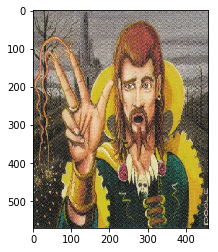

In [8]:
# Sanity check on the data

iterator = data.make_dataset(str(DATA_DIR / 'dev_testing_data.tfrecord')).make_one_shot_iterator()
with tf.Session() as sess:
    batch = sess.run(iterator.get_next())

print("".join(chr(t) for t in batch[0]['tokens'][0] if t))
print(batch[1][0])
plt.imshow(batch[0]['image'][0])

In [9]:
training_names = data.extract_card_names_from_dataset(data.make_dataset(str(TRAIN_DATA_PATH), features=features), sess)
validation_names = data.extract_card_names_from_dataset(data.make_dataset(str(VALIDATION_DATA_PATH), features=features), sess)
test_names = data.extract_card_names_from_dataset(all_test_data, sess)

In [10]:
assert len(set(training_names)) == len(training_names)
assert len(set(validation_names)) == len(validation_names)
assert len(set(test_names)) == len(test_names)
assert len(set(training_names).union(set(validation_names))) == len(set(training_names)) + len(set(validation_names))
assert len(set(training_names).union(set(test_names))) == len(set(training_names)) + len(set(test_names))

In [33]:
legacy_names = data.extract_card_names_from_dataset(legacy_test_data, sess)
modern_names = data.extract_card_names_from_dataset(modern_test_data, sess)
all_names = data.extract_card_names_from_dataset(all_test_data, sess)

In [34]:
assert len(set(legacy_names)) == len(legacy_names)
assert len(set(legacy_names).union(set(modern_names))) == len(set(legacy_names)) + len(set(modern_names))

In [14]:
importlib.reload(text_model)

config = text_model.Config(lstm_size=256,
                           embedding_size=64,
                           dense_dropout=.5,
                           lstm_dropout=.5,
                           attention_num_heads=3,
                           attention_head_size=64,
                           use_word_level_embeddings=True,
                           # use_pretrained_embeddings=True,
                           # embedding_regularization_coef=1e-4,
                           dense_regularization_coef=1e-4,
                           feature_params={'vocab_size': 255},)
model = text_model.Model(config)
model.compile(optimizer=tf.keras.optimizers.Adam(clipnorm=5.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x=model.extract_inputs_from_dict(training_data[0]),
          y=training_data[1],
          validation_data=(model.extract_inputs_from_dict(validation_data[0]), validation_data[1]),
          epochs=10)

/home/derick/.conda/envs/tf-1.12/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 14217 samples, validate on 1753 samples
Epoch 1/10


   32/14217 [..............................] - ETA: 1:29:54 - loss: 1.5286 - acc: 0.1562

   64/14217 [..............................] - ETA: 46:05 - loss: 1.5240 - acc: 0.2812  

   96/14217 [..............................] - ETA: 31:17 - loss: 1.5227 - acc: 0.3333

  128/14217 [..............................] - ETA: 23:56 - loss: 1.5201 - acc: 0.3516

  160/14217 [..............................] - ETA: 19:30 - loss: 1.5160 - acc: 0.3750

  192/14217 [..............................] - ETA: 16:31 - loss: 1.5079 - acc: 0.4010

  224/14217 [..............................] - ETA: 14:26 - loss: 1.5008 - acc: 0.4062

  256/14217 [..............................] - ETA: 12:49 - loss: 1.4887 - acc: 0.4297

  288/14217 [..............................] - ETA: 11:35 - loss: 1.4706 - acc: 0.4444

  320/14217 [..............................] - ETA: 10:35 - loss: 1.4601 - acc: 0.4562

  352/14217 [..............................] - ETA: 9:46 - loss: 1.4393 - acc: 0.4744 

  384/14217 [..............................] - ETA: 9:08 - loss: 1.4484 - acc: 0.4688

  416/14217 [..............................] - ETA: 8:35 - loss: 1.4217 - acc: 0.4808

  448/14217 [..............................] - ETA: 8:05 - loss: 1.4452 - acc: 0.4732

  480/14217 [>.............................] - ETA: 7:39 - loss: 1.4594 - acc: 0.4688

  512/14217 [>.............................] - ETA: 7:17 - loss: 1.4425 - acc: 0.4766

  544/14217 [>.............................] - ETA: 6:56 - loss: 1.4275 - acc: 0.4816

  576/14217 [>.............................] - ETA: 6:39 - loss: 1.4108 - acc: 0.4878

  608/14217 [>.............................] - ETA: 6:22 - loss: 1.4025 - acc: 0.4967

  640/14217 [>.............................] - ETA: 6:08 - loss: 1.3933 - acc: 0.5000

  672/14217 [>.............................] - ETA: 5:55 - loss: 1.3842 - acc: 0.5045

  704/14217 [>.............................] - ETA: 5:43 - loss: 1.3797 - acc: 0.5043

  736/14217 [>.............................] - ETA: 5:32 - loss: 1.3670 - acc: 0.5163

  768/14217 [>.............................] - ETA: 5:22 - loss: 1.3590 - acc: 0.5182

  800/14217 [>.............................] - ETA: 5:13 - loss: 1.3647 - acc: 0.5088

  832/14217 [>.............................] - ETA: 5:05 - loss: 1.3491 - acc: 0.5156

  864/14217 [>.............................] - ETA: 4:57 - loss: 1.3459 - acc: 0.5174

  896/14217 [>.............................] - ETA: 4:49 - loss: 1.3457 - acc: 0.5179

  928/14217 [>.............................] - ETA: 4:42 - loss: 1.3350 - acc: 0.5194

  960/14217 [=>............................] - ETA: 4:37 - loss: 1.3193 - acc: 0.5250

  992/14217 [=>............................] - ETA: 4:30 - loss: 1.3092 - acc: 0.5302

 1024/14217 [=>............................] - ETA: 4:25 - loss: 1.3052 - acc: 0.5361

 1056/14217 [=>............................] - ETA: 4:19 - loss: 1.2969 - acc: 0.5407

 1088/14217 [=>............................] - ETA: 4:14 - loss: 1.2952 - acc: 0.5395

 1120/14217 [=>............................] - ETA: 4:10 - loss: 1.2914 - acc: 0.5393

 1152/14217 [=>............................] - ETA: 4:05 - loss: 1.2863 - acc: 0.5434

 1184/14217 [=>............................] - ETA: 4:01 - loss: 1.2802 - acc: 0.5473

 1216/14217 [=>............................] - ETA: 3:56 - loss: 1.2780 - acc: 0.5469

 1248/14217 [=>............................] - ETA: 3:52 - loss: 1.2782 - acc: 0.5449

 1280/14217 [=>............................] - ETA: 3:48 - loss: 1.2730 - acc: 0.5445

 1312/14217 [=>............................] - ETA: 3:45 - loss: 1.2709 - acc: 0.5442

 1344/14217 [=>............................] - ETA: 3:42 - loss: 1.2671 - acc: 0.5446

 1376/14217 [=>............................] - ETA: 3:38 - loss: 1.2647 - acc: 0.5465

 1408/14217 [=>............................] - ETA: 3:35 - loss: 1.2584 - acc: 0.5504

 1440/14217 [==>...........................] - ETA: 3:33 - loss: 1.2567 - acc: 0.5500

 1472/14217 [==>...........................] - ETA: 3:30 - loss: 1.2546 - acc: 0.5510

 1504/14217 [==>...........................] - ETA: 3:27 - loss: 1.2514 - acc: 0.5519

 1536/14217 [==>...........................] - ETA: 3:25 - loss: 1.2505 - acc: 0.5521

 1568/14217 [==>...........................] - ETA: 3:22 - loss: 1.2420 - acc: 0.5548

 1600/14217 [==>...........................] - ETA: 3:20 - loss: 1.2442 - acc: 0.5531

 1632/14217 [==>...........................] - ETA: 3:17 - loss: 1.2403 - acc: 0.5527

 1664/14217 [==>...........................] - ETA: 3:15 - loss: 1.2326 - acc: 0.5553

 1696/14217 [==>...........................] - ETA: 3:13 - loss: 1.2281 - acc: 0.5560

 1728/14217 [==>...........................] - ETA: 3:10 - loss: 1.2229 - acc: 0.5584

 1760/14217 [==>...........................] - ETA: 3:08 - loss: 1.2216 - acc: 0.5597

 1792/14217 [==>...........................] - ETA: 3:06 - loss: 1.2140 - acc: 0.5625

 1824/14217 [==>...........................] - ETA: 3:04 - loss: 1.2139 - acc: 0.5630

 1856/14217 [==>...........................] - ETA: 3:03 - loss: 1.2144 - acc: 0.5625

 1888/14217 [==>...........................] - ETA: 3:01 - loss: 1.2098 - acc: 0.5641

 1920/14217 [===>..........................] - ETA: 2:59 - loss: 1.2097 - acc: 0.5651

 1952/14217 [===>..........................] - ETA: 2:57 - loss: 1.2090 - acc: 0.5661

 1984/14217 [===>..........................] - ETA: 2:56 - loss: 1.2070 - acc: 0.5675

 2016/14217 [===>..........................] - ETA: 2:55 - loss: 1.2090 - acc: 0.5675

 2048/14217 [===>..........................] - ETA: 2:54 - loss: 1.2096 - acc: 0.5664

 2080/14217 [===>..........................] - ETA: 2:52 - loss: 1.2062 - acc: 0.5687

 2112/14217 [===>..........................] - ETA: 2:52 - loss: 1.2057 - acc: 0.5710

 2144/14217 [===>..........................] - ETA: 2:51 - loss: 1.2051 - acc: 0.5718

 2176/14217 [===>..........................] - ETA: 2:51 - loss: 1.2017 - acc: 0.5731

 2208/14217 [===>..........................] - ETA: 2:51 - loss: 1.1974 - acc: 0.5761

 2240/14217 [===>..........................] - ETA: 2:51 - loss: 1.1901 - acc: 0.5790

 2272/14217 [===>..........................] - ETA: 2:51 - loss: 1.1878 - acc: 0.5810

 2304/14217 [===>..........................] - ETA: 2:49 - loss: 1.1924 - acc: 0.5799

 2336/14217 [===>..........................] - ETA: 2:48 - loss: 1.1973 - acc: 0.5809

 2368/14217 [===>..........................] - ETA: 2:48 - loss: 1.1944 - acc: 0.5823

 2400/14217 [====>.........................] - ETA: 2:48 - loss: 1.1987 - acc: 0.5808

 2432/14217 [====>.........................] - ETA: 2:46 - loss: 1.2000 - acc: 0.5814

 2464/14217 [====>.........................] - ETA: 2:46 - loss: 1.1962 - acc: 0.5832

 2496/14217 [====>.........................] - ETA: 2:45 - loss: 1.1925 - acc: 0.5849

 2528/14217 [====>.........................] - ETA: 2:43 - loss: 1.1895 - acc: 0.5866

 2560/14217 [====>.........................] - ETA: 2:42 - loss: 1.1896 - acc: 0.5875

 2592/14217 [====>.........................] - ETA: 2:41 - loss: 1.1878 - acc: 0.5880

 2624/14217 [====>.........................] - ETA: 2:39 - loss: 1.1845 - acc: 0.5899

 2656/14217 [====>.........................] - ETA: 2:39 - loss: 1.1841 - acc: 0.5907

 2688/14217 [====>.........................] - ETA: 2:38 - loss: 1.1810 - acc: 0.5926

 2720/14217 [====>.........................] - ETA: 2:38 - loss: 1.1809 - acc: 0.5934

 2752/14217 [====>.........................] - ETA: 2:37 - loss: 1.1788 - acc: 0.5941

 2784/14217 [====>.........................] - ETA: 2:36 - loss: 1.1764 - acc: 0.5948

 2816/14217 [====>.........................] - ETA: 2:35 - loss: 1.1775 - acc: 0.5948

 2848/14217 [=====>........................] - ETA: 2:34 - loss: 1.1750 - acc: 0.5966

 2880/14217 [=====>........................] - ETA: 2:33 - loss: 1.1725 - acc: 0.5983

 2912/14217 [=====>........................] - ETA: 2:32 - loss: 1.1713 - acc: 0.5989

 2944/14217 [=====>........................] - ETA: 2:31 - loss: 1.1704 - acc: 0.5999

 2976/14217 [=====>........................] - ETA: 2:30 - loss: 1.1709 - acc: 0.6005

 3008/14217 [=====>........................] - ETA: 2:29 - loss: 1.1699 - acc: 0.6011

 3040/14217 [=====>........................] - ETA: 2:28 - loss: 1.1695 - acc: 0.6016

 3072/14217 [=====>........................] - ETA: 2:27 - loss: 1.1700 - acc: 0.6012

 3104/14217 [=====>........................] - ETA: 2:26 - loss: 1.1666 - acc: 0.6031

 3136/14217 [=====>........................] - ETA: 2:25 - loss: 1.1616 - acc: 0.6059

 3168/14217 [=====>........................] - ETA: 2:24 - loss: 1.1616 - acc: 0.6057

 3200/14217 [=====>........................] - ETA: 2:23 - loss: 1.1599 - acc: 0.6069

 3232/14217 [=====>........................] - ETA: 2:22 - loss: 1.1576 - acc: 0.6083

 3264/14217 [=====>........................] - ETA: 2:22 - loss: 1.1583 - acc: 0.6072

 3296/14217 [=====>........................] - ETA: 2:21 - loss: 1.1569 - acc: 0.6083

 3328/14217 [======>.......................] - ETA: 2:20 - loss: 1.1557 - acc: 0.6091

 3360/14217 [======>.......................] - ETA: 2:19 - loss: 1.1535 - acc: 0.6098

 3392/14217 [======>.......................] - ETA: 2:18 - loss: 1.1508 - acc: 0.6117

 3424/14217 [======>.......................] - ETA: 2:17 - loss: 1.1524 - acc: 0.6110

 3456/14217 [======>.......................] - ETA: 2:17 - loss: 1.1514 - acc: 0.6111

 3488/14217 [======>.......................] - ETA: 2:16 - loss: 1.1499 - acc: 0.6112

 3520/14217 [======>.......................] - ETA: 2:15 - loss: 1.1488 - acc: 0.6119

 3552/14217 [======>.......................] - ETA: 2:14 - loss: 1.1483 - acc: 0.6123

 3584/14217 [======>.......................] - ETA: 2:14 - loss: 1.1473 - acc: 0.6130

 3616/14217 [======>.......................] - ETA: 2:13 - loss: 1.1460 - acc: 0.6139

 3648/14217 [======>.......................] - ETA: 2:12 - loss: 1.1475 - acc: 0.6135

 3680/14217 [======>.......................] - ETA: 2:11 - loss: 1.1460 - acc: 0.6139

 3712/14217 [======>.......................] - ETA: 2:11 - loss: 1.1448 - acc: 0.6145

 3744/14217 [======>.......................] - ETA: 2:10 - loss: 1.1442 - acc: 0.6146

 3776/14217 [======>.......................] - ETA: 2:09 - loss: 1.1432 - acc: 0.6147

 3808/14217 [=======>......................] - ETA: 2:09 - loss: 1.1405 - acc: 0.6163

 3840/14217 [=======>......................] - ETA: 2:09 - loss: 1.1406 - acc: 0.6161

 3872/14217 [=======>......................] - ETA: 2:09 - loss: 1.1387 - acc: 0.6165

 3904/14217 [=======>......................] - ETA: 2:08 - loss: 1.1368 - acc: 0.6171

 3936/14217 [=======>......................] - ETA: 2:08 - loss: 1.1355 - acc: 0.6179

 3968/14217 [=======>......................] - ETA: 2:07 - loss: 1.1344 - acc: 0.6184

 4000/14217 [=======>......................] - ETA: 2:07 - loss: 1.1331 - acc: 0.6192

 4032/14217 [=======>......................] - ETA: 2:06 - loss: 1.1297 - acc: 0.6205

 4064/14217 [=======>......................] - ETA: 2:05 - loss: 1.1284 - acc: 0.6213

 4096/14217 [=======>......................] - ETA: 2:04 - loss: 1.1290 - acc: 0.6211

 4128/14217 [=======>......................] - ETA: 2:04 - loss: 1.1289 - acc: 0.6209

 4160/14217 [=======>......................] - ETA: 2:03 - loss: 1.1278 - acc: 0.6214

 4192/14217 [=======>......................] - ETA: 2:02 - loss: 1.1281 - acc: 0.6212

 4224/14217 [=======>......................] - ETA: 2:02 - loss: 1.1275 - acc: 0.6214

 4256/14217 [=======>......................] - ETA: 2:01 - loss: 1.1252 - acc: 0.6224

 4288/14217 [========>.....................] - ETA: 2:00 - loss: 1.1249 - acc: 0.6224

 4320/14217 [========>.....................] - ETA: 2:00 - loss: 1.1238 - acc: 0.6225

 4352/14217 [========>.....................] - ETA: 1:59 - loss: 1.1241 - acc: 0.6220

 4384/14217 [========>.....................] - ETA: 1:58 - loss: 1.1231 - acc: 0.6229

 4416/14217 [========>.....................] - ETA: 1:58 - loss: 1.1235 - acc: 0.6230

 4448/14217 [========>.....................] - ETA: 1:57 - loss: 1.1215 - acc: 0.6239

 4480/14217 [========>.....................] - ETA: 1:56 - loss: 1.1209 - acc: 0.6248

 4512/14217 [========>.....................] - ETA: 1:56 - loss: 1.1198 - acc: 0.6254

 4544/14217 [========>.....................] - ETA: 1:55 - loss: 1.1182 - acc: 0.6265

 4576/14217 [========>.....................] - ETA: 1:54 - loss: 1.1171 - acc: 0.6272

 4608/14217 [========>.....................] - ETA: 1:54 - loss: 1.1153 - acc: 0.6280

 4640/14217 [========>.....................] - ETA: 1:53 - loss: 1.1153 - acc: 0.6280

 4672/14217 [========>.....................] - ETA: 1:53 - loss: 1.1148 - acc: 0.6282

 4704/14217 [========>.....................] - ETA: 1:52 - loss: 1.1144 - acc: 0.6280

 4736/14217 [========>.....................] - ETA: 1:52 - loss: 1.1127 - acc: 0.6292

 4768/14217 [=========>....................] - ETA: 1:51 - loss: 1.1118 - acc: 0.6298

 4800/14217 [=========>....................] - ETA: 1:50 - loss: 1.1104 - acc: 0.6306

 4832/14217 [=========>....................] - ETA: 1:50 - loss: 1.1097 - acc: 0.6306

 4864/14217 [=========>....................] - ETA: 1:49 - loss: 1.1089 - acc: 0.6314

 4896/14217 [=========>....................] - ETA: 1:49 - loss: 1.1095 - acc: 0.6311

 4928/14217 [=========>....................] - ETA: 1:48 - loss: 1.1103 - acc: 0.6311

 4960/14217 [=========>....................] - ETA: 1:47 - loss: 1.1105 - acc: 0.6310

 4992/14217 [=========>....................] - ETA: 1:47 - loss: 1.1102 - acc: 0.6310

 5024/14217 [=========>....................] - ETA: 1:46 - loss: 1.1107 - acc: 0.6306

 5056/14217 [=========>....................] - ETA: 1:46 - loss: 1.1101 - acc: 0.6309

 5088/14217 [=========>....................] - ETA: 1:45 - loss: 1.1076 - acc: 0.6321

 5120/14217 [=========>....................] - ETA: 1:45 - loss: 1.1069 - acc: 0.6322

 5152/14217 [=========>....................] - ETA: 1:44 - loss: 1.1057 - acc: 0.6326

 5184/14217 [=========>....................] - ETA: 1:44 - loss: 1.1056 - acc: 0.6321

 5216/14217 [==========>...................] - ETA: 1:43 - loss: 1.1048 - acc: 0.6321

 5248/14217 [==========>...................] - ETA: 1:42 - loss: 1.1033 - acc: 0.6324

 5280/14217 [==========>...................] - ETA: 1:42 - loss: 1.1036 - acc: 0.6320

 5312/14217 [==========>...................] - ETA: 1:41 - loss: 1.1040 - acc: 0.6322

 5344/14217 [==========>...................] - ETA: 1:41 - loss: 1.1026 - acc: 0.6329

 5376/14217 [==========>...................] - ETA: 1:40 - loss: 1.1022 - acc: 0.6324

 5408/14217 [==========>...................] - ETA: 1:40 - loss: 1.1022 - acc: 0.6322

 5440/14217 [==========>...................] - ETA: 1:39 - loss: 1.1028 - acc: 0.6320

 5472/14217 [==========>...................] - ETA: 1:39 - loss: 1.1014 - acc: 0.6321

 5504/14217 [==========>...................] - ETA: 1:38 - loss: 1.1001 - acc: 0.6330

 5536/14217 [==========>...................] - ETA: 1:38 - loss: 1.0985 - acc: 0.6340

 5568/14217 [==========>...................] - ETA: 1:37 - loss: 1.0980 - acc: 0.6349

 5600/14217 [==========>...................] - ETA: 1:37 - loss: 1.0973 - acc: 0.6355

 5632/14217 [==========>...................] - ETA: 1:36 - loss: 1.0962 - acc: 0.6360

 5664/14217 [==========>...................] - ETA: 1:36 - loss: 1.0960 - acc: 0.6359

 5696/14217 [===========>..................] - ETA: 1:35 - loss: 1.0947 - acc: 0.6368

 5728/14217 [===========>..................] - ETA: 1:35 - loss: 1.0923 - acc: 0.6377

 5760/14217 [===========>..................] - ETA: 1:34 - loss: 1.0914 - acc: 0.6382

 5792/14217 [===========>..................] - ETA: 1:34 - loss: 1.0909 - acc: 0.6381

 5824/14217 [===========>..................] - ETA: 1:33 - loss: 1.0904 - acc: 0.6382

 5856/14217 [===========>..................] - ETA: 1:33 - loss: 1.0882 - acc: 0.6392

 5888/14217 [===========>..................] - ETA: 1:32 - loss: 1.0871 - acc: 0.6393

 5920/14217 [===========>..................] - ETA: 1:32 - loss: 1.0877 - acc: 0.6385

 5952/14217 [===========>..................] - ETA: 1:31 - loss: 1.0858 - acc: 0.6391

 5984/14217 [===========>..................] - ETA: 1:31 - loss: 1.0843 - acc: 0.6400

 6016/14217 [===========>..................] - ETA: 1:30 - loss: 1.0828 - acc: 0.6406

 6048/14217 [===========>..................] - ETA: 1:30 - loss: 1.0804 - acc: 0.6415

 6080/14217 [===========>..................] - ETA: 1:29 - loss: 1.0791 - acc: 0.6419

 6112/14217 [===========>..................] - ETA: 1:29 - loss: 1.0786 - acc: 0.6422

 6144/14217 [===========>..................] - ETA: 1:29 - loss: 1.0774 - acc: 0.6429

 6176/14217 [============>.................] - ETA: 1:28 - loss: 1.0765 - acc: 0.6435

 6208/14217 [============>.................] - ETA: 1:28 - loss: 1.0763 - acc: 0.6442

 6240/14217 [============>.................] - ETA: 1:27 - loss: 1.0762 - acc: 0.6444

 6272/14217 [============>.................] - ETA: 1:27 - loss: 1.0766 - acc: 0.6445

 6304/14217 [============>.................] - ETA: 1:26 - loss: 1.0763 - acc: 0.6444

 6336/14217 [============>.................] - ETA: 1:26 - loss: 1.0751 - acc: 0.6450

 6368/14217 [============>.................] - ETA: 1:25 - loss: 1.0746 - acc: 0.6456

 6400/14217 [============>.................] - ETA: 1:25 - loss: 1.0742 - acc: 0.6459

 6432/14217 [============>.................] - ETA: 1:24 - loss: 1.0741 - acc: 0.6461

 6464/14217 [============>.................] - ETA: 1:24 - loss: 1.0742 - acc: 0.6463

 6496/14217 [============>.................] - ETA: 1:23 - loss: 1.0739 - acc: 0.6464

 6528/14217 [============>.................] - ETA: 1:23 - loss: 1.0730 - acc: 0.6468

 6560/14217 [============>.................] - ETA: 1:23 - loss: 1.0737 - acc: 0.6466

 6592/14217 [============>.................] - ETA: 1:22 - loss: 1.0718 - acc: 0.6478

 6624/14217 [============>.................] - ETA: 1:22 - loss: 1.0729 - acc: 0.6472

 6656/14217 [=============>................] - ETA: 1:21 - loss: 1.0717 - acc: 0.6478

 6688/14217 [=============>................] - ETA: 1:21 - loss: 1.0706 - acc: 0.6486

 6720/14217 [=============>................] - ETA: 1:20 - loss: 1.0698 - acc: 0.6490

 6752/14217 [=============>................] - ETA: 1:20 - loss: 1.0697 - acc: 0.6491

 6784/14217 [=============>................] - ETA: 1:20 - loss: 1.0693 - acc: 0.6492

 6816/14217 [=============>................] - ETA: 1:19 - loss: 1.0685 - acc: 0.6496

 6848/14217 [=============>................] - ETA: 1:19 - loss: 1.0677 - acc: 0.6500

 6880/14217 [=============>................] - ETA: 1:18 - loss: 1.0671 - acc: 0.6501

 6912/14217 [=============>................] - ETA: 1:18 - loss: 1.0669 - acc: 0.6497

 6944/14217 [=============>................] - ETA: 1:17 - loss: 1.0658 - acc: 0.6501

 6976/14217 [=============>................] - ETA: 1:17 - loss: 1.0654 - acc: 0.6499

 7008/14217 [=============>................] - ETA: 1:17 - loss: 1.0668 - acc: 0.6494

 7040/14217 [=============>................] - ETA: 1:16 - loss: 1.0673 - acc: 0.6493

 7072/14217 [=============>................] - ETA: 1:16 - loss: 1.0661 - acc: 0.6496

 7104/14217 [=============>................] - ETA: 1:15 - loss: 1.0647 - acc: 0.6503

 7136/14217 [==============>...............] - ETA: 1:15 - loss: 1.0632 - acc: 0.6511

 7168/14217 [==============>...............] - ETA: 1:15 - loss: 1.0614 - acc: 0.6518

 7200/14217 [==============>...............] - ETA: 1:14 - loss: 1.0601 - acc: 0.6522

 7232/14217 [==============>...............] - ETA: 1:14 - loss: 1.0588 - acc: 0.6529

 7264/14217 [==============>...............] - ETA: 1:13 - loss: 1.0580 - acc: 0.6529

 7296/14217 [==============>...............] - ETA: 1:13 - loss: 1.0577 - acc: 0.6530

 7328/14217 [==============>...............] - ETA: 1:13 - loss: 1.0558 - acc: 0.6539

 7360/14217 [==============>...............] - ETA: 1:12 - loss: 1.0548 - acc: 0.6541

 7392/14217 [==============>...............] - ETA: 1:12 - loss: 1.0541 - acc: 0.6538

 7424/14217 [==============>...............] - ETA: 1:11 - loss: 1.0536 - acc: 0.6536

 7456/14217 [==============>...............] - ETA: 1:11 - loss: 1.0524 - acc: 0.6541

 7488/14217 [==============>...............] - ETA: 1:11 - loss: 1.0521 - acc: 0.6548

 7520/14217 [==============>...............] - ETA: 1:10 - loss: 1.0500 - acc: 0.6555

 7552/14217 [==============>...............] - ETA: 1:10 - loss: 1.0499 - acc: 0.6552

 7584/14217 [===============>..............] - ETA: 1:09 - loss: 1.0491 - acc: 0.6553

 7616/14217 [===============>..............] - ETA: 1:09 - loss: 1.0501 - acc: 0.6549

 7648/14217 [===============>..............] - ETA: 1:09 - loss: 1.0498 - acc: 0.6549

 7680/14217 [===============>..............] - ETA: 1:08 - loss: 1.0490 - acc: 0.6551

 7712/14217 [===============>..............] - ETA: 1:08 - loss: 1.0486 - acc: 0.6551

 7744/14217 [===============>..............] - ETA: 1:07 - loss: 1.0478 - acc: 0.6553

 7776/14217 [===============>..............] - ETA: 1:07 - loss: 1.0480 - acc: 0.6553

 7808/14217 [===============>..............] - ETA: 1:07 - loss: 1.0469 - acc: 0.6559

 7840/14217 [===============>..............] - ETA: 1:06 - loss: 1.0459 - acc: 0.6568

 7872/14217 [===============>..............] - ETA: 1:06 - loss: 1.0461 - acc: 0.6562

 7904/14217 [===============>..............] - ETA: 1:05 - loss: 1.0452 - acc: 0.6565

 7936/14217 [===============>..............] - ETA: 1:05 - loss: 1.0451 - acc: 0.6564

 7968/14217 [===============>..............] - ETA: 1:05 - loss: 1.0451 - acc: 0.6562

 8000/14217 [===============>..............] - ETA: 1:04 - loss: 1.0438 - acc: 0.6570

 8032/14217 [===============>..............] - ETA: 1:04 - loss: 1.0430 - acc: 0.6571

 8064/14217 [================>.............] - ETA: 1:03 - loss: 1.0433 - acc: 0.6574

 8096/14217 [================>.............] - ETA: 1:03 - loss: 1.0426 - acc: 0.6577

 8128/14217 [================>.............] - ETA: 1:03 - loss: 1.0414 - acc: 0.6582

 8160/14217 [================>.............] - ETA: 1:02 - loss: 1.0395 - acc: 0.6591

 8192/14217 [================>.............] - ETA: 1:02 - loss: 1.0384 - acc: 0.6593

 8224/14217 [================>.............] - ETA: 1:02 - loss: 1.0384 - acc: 0.6593

 8256/14217 [================>.............] - ETA: 1:01 - loss: 1.0374 - acc: 0.6594

 8288/14217 [================>.............] - ETA: 1:01 - loss: 1.0384 - acc: 0.6589

 8320/14217 [================>.............] - ETA: 1:00 - loss: 1.0370 - acc: 0.6595

 8352/14217 [================>.............] - ETA: 1:00 - loss: 1.0369 - acc: 0.6592

 8384/14217 [================>.............] - ETA: 1:00 - loss: 1.0357 - acc: 0.6597

 8416/14217 [================>.............] - ETA: 59s - loss: 1.0350 - acc: 0.6602 

 8448/14217 [================>.............] - ETA: 59s - loss: 1.0345 - acc: 0.6604

 8480/14217 [================>.............] - ETA: 59s - loss: 1.0336 - acc: 0.6608

 8512/14217 [================>.............] - ETA: 58s - loss: 1.0325 - acc: 0.6611

 8544/14217 [=================>............] - ETA: 58s - loss: 1.0316 - acc: 0.6613

 8576/14217 [=================>............] - ETA: 57s - loss: 1.0302 - acc: 0.6620

 8608/14217 [=================>............] - ETA: 57s - loss: 1.0284 - acc: 0.6630

 8640/14217 [=================>............] - ETA: 57s - loss: 1.0275 - acc: 0.6633

 8672/14217 [=================>............] - ETA: 57s - loss: 1.0277 - acc: 0.6632

 8704/14217 [=================>............] - ETA: 56s - loss: 1.0266 - acc: 0.6636

 8736/14217 [=================>............] - ETA: 56s - loss: 1.0254 - acc: 0.6641

 8768/14217 [=================>............] - ETA: 55s - loss: 1.0247 - acc: 0.6643

 8800/14217 [=================>............] - ETA: 55s - loss: 1.0241 - acc: 0.6645

 8832/14217 [=================>............] - ETA: 55s - loss: 1.0247 - acc: 0.6644

 8864/14217 [=================>............] - ETA: 54s - loss: 1.0244 - acc: 0.6643

 8896/14217 [=================>............] - ETA: 54s - loss: 1.0242 - acc: 0.6643

 8928/14217 [=================>............] - ETA: 54s - loss: 1.0237 - acc: 0.6647

 8960/14217 [=================>............] - ETA: 53s - loss: 1.0227 - acc: 0.6651

 8992/14217 [=================>............] - ETA: 53s - loss: 1.0225 - acc: 0.6653

 9024/14217 [==================>...........] - ETA: 53s - loss: 1.0225 - acc: 0.6652

 9056/14217 [==================>...........] - ETA: 52s - loss: 1.0219 - acc: 0.6654

 9088/14217 [==================>...........] - ETA: 52s - loss: 1.0220 - acc: 0.6654

 9120/14217 [==================>...........] - ETA: 52s - loss: 1.0223 - acc: 0.6654

 9152/14217 [==================>...........] - ETA: 51s - loss: 1.0217 - acc: 0.6655

 9184/14217 [==================>...........] - ETA: 51s - loss: 1.0214 - acc: 0.6658

 9216/14217 [==================>...........] - ETA: 50s - loss: 1.0207 - acc: 0.6663

 9248/14217 [==================>...........] - ETA: 50s - loss: 1.0197 - acc: 0.6666

 9280/14217 [==================>...........] - ETA: 50s - loss: 1.0196 - acc: 0.6666

 9312/14217 [==================>...........] - ETA: 49s - loss: 1.0194 - acc: 0.6667

 9344/14217 [==================>...........] - ETA: 49s - loss: 1.0192 - acc: 0.6667

 9376/14217 [==================>...........] - ETA: 49s - loss: 1.0189 - acc: 0.6669

 9408/14217 [==================>...........] - ETA: 48s - loss: 1.0185 - acc: 0.6668

 9440/14217 [==================>...........] - ETA: 48s - loss: 1.0185 - acc: 0.6669

 9472/14217 [==================>...........] - ETA: 48s - loss: 1.0176 - acc: 0.6673

 9504/14217 [===================>..........] - ETA: 47s - loss: 1.0173 - acc: 0.6676

 9536/14217 [===================>..........] - ETA: 47s - loss: 1.0162 - acc: 0.6679

 9568/14217 [===================>..........] - ETA: 47s - loss: 1.0159 - acc: 0.6681

 9600/14217 [===================>..........] - ETA: 46s - loss: 1.0171 - acc: 0.6676

 9632/14217 [===================>..........] - ETA: 46s - loss: 1.0163 - acc: 0.6680

 9664/14217 [===================>..........] - ETA: 46s - loss: 1.0158 - acc: 0.6684

 9696/14217 [===================>..........] - ETA: 45s - loss: 1.0152 - acc: 0.6686

 9728/14217 [===================>..........] - ETA: 45s - loss: 1.0144 - acc: 0.6689

 9760/14217 [===================>..........] - ETA: 45s - loss: 1.0148 - acc: 0.6687

 9792/14217 [===================>..........] - ETA: 44s - loss: 1.0138 - acc: 0.6691

 9824/14217 [===================>..........] - ETA: 44s - loss: 1.0135 - acc: 0.6693

 9856/14217 [===================>..........] - ETA: 43s - loss: 1.0133 - acc: 0.6693

 9888/14217 [===================>..........] - ETA: 43s - loss: 1.0129 - acc: 0.6694

 9920/14217 [===================>..........] - ETA: 43s - loss: 1.0124 - acc: 0.6693

 9952/14217 [====================>.........] - ETA: 42s - loss: 1.0120 - acc: 0.6694

 9984/14217 [====================>.........] - ETA: 42s - loss: 1.0121 - acc: 0.6693

10016/14217 [====================>.........] - ETA: 42s - loss: 1.0121 - acc: 0.6692

10048/14217 [====================>.........] - ETA: 41s - loss: 1.0120 - acc: 0.6692

10080/14217 [====================>.........] - ETA: 41s - loss: 1.0116 - acc: 0.6691

10112/14217 [====================>.........] - ETA: 41s - loss: 1.0114 - acc: 0.6694

10144/14217 [====================>.........] - ETA: 40s - loss: 1.0104 - acc: 0.6699

10176/14217 [====================>.........] - ETA: 40s - loss: 1.0099 - acc: 0.6702

10208/14217 [====================>.........] - ETA: 40s - loss: 1.0091 - acc: 0.6707

10240/14217 [====================>.........] - ETA: 39s - loss: 1.0095 - acc: 0.6703

10272/14217 [====================>.........] - ETA: 39s - loss: 1.0084 - acc: 0.6708

10304/14217 [====================>.........] - ETA: 39s - loss: 1.0085 - acc: 0.6708

10336/14217 [====================>.........] - ETA: 38s - loss: 1.0081 - acc: 0.6709

10368/14217 [====================>.........] - ETA: 38s - loss: 1.0074 - acc: 0.6710

10400/14217 [====================>.........] - ETA: 38s - loss: 1.0078 - acc: 0.6710

10432/14217 [=====================>........] - ETA: 37s - loss: 1.0082 - acc: 0.6707

10464/14217 [=====================>........] - ETA: 37s - loss: 1.0078 - acc: 0.6708

10496/14217 [=====================>........] - ETA: 37s - loss: 1.0078 - acc: 0.6707

10528/14217 [=====================>........] - ETA: 36s - loss: 1.0067 - acc: 0.6713

10560/14217 [=====================>........] - ETA: 36s - loss: 1.0068 - acc: 0.6710

10592/14217 [=====================>........] - ETA: 36s - loss: 1.0070 - acc: 0.6709

10624/14217 [=====================>........] - ETA: 35s - loss: 1.0068 - acc: 0.6708

10656/14217 [=====================>........] - ETA: 35s - loss: 1.0064 - acc: 0.6710

10688/14217 [=====================>........] - ETA: 35s - loss: 1.0061 - acc: 0.6711

10720/14217 [=====================>........] - ETA: 34s - loss: 1.0056 - acc: 0.6713

10752/14217 [=====================>........] - ETA: 34s - loss: 1.0052 - acc: 0.6712

10784/14217 [=====================>........] - ETA: 34s - loss: 1.0059 - acc: 0.6706

10816/14217 [=====================>........] - ETA: 33s - loss: 1.0055 - acc: 0.6710

10848/14217 [=====================>........] - ETA: 33s - loss: 1.0056 - acc: 0.6710

10880/14217 [=====================>........] - ETA: 33s - loss: 1.0055 - acc: 0.6707

10912/14217 [======================>.......] - ETA: 32s - loss: 1.0052 - acc: 0.6707

10944/14217 [======================>.......] - ETA: 32s - loss: 1.0048 - acc: 0.6708

10976/14217 [======================>.......] - ETA: 32s - loss: 1.0040 - acc: 0.6711

11008/14217 [======================>.......] - ETA: 31s - loss: 1.0041 - acc: 0.6710

11040/14217 [======================>.......] - ETA: 31s - loss: 1.0038 - acc: 0.6709

11072/14217 [======================>.......] - ETA: 31s - loss: 1.0034 - acc: 0.6711

11104/14217 [======================>.......] - ETA: 30s - loss: 1.0032 - acc: 0.6710

11136/14217 [======================>.......] - ETA: 30s - loss: 1.0034 - acc: 0.6710

11168/14217 [======================>.......] - ETA: 30s - loss: 1.0021 - acc: 0.6714

11200/14217 [======================>.......] - ETA: 29s - loss: 1.0019 - acc: 0.6711

11232/14217 [======================>.......] - ETA: 29s - loss: 1.0016 - acc: 0.6711

11264/14217 [======================>.......] - ETA: 29s - loss: 1.0022 - acc: 0.6712

11296/14217 [======================>.......] - ETA: 28s - loss: 1.0019 - acc: 0.6712

11328/14217 [======================>.......] - ETA: 28s - loss: 1.0011 - acc: 0.6716

11360/14217 [======================>.......] - ETA: 28s - loss: 1.0015 - acc: 0.6714

11392/14217 [=======================>......] - ETA: 27s - loss: 1.0016 - acc: 0.6713

11424/14217 [=======================>......] - ETA: 27s - loss: 1.0007 - acc: 0.6717

11456/14217 [=======================>......] - ETA: 27s - loss: 1.0003 - acc: 0.6718

11488/14217 [=======================>......] - ETA: 26s - loss: 1.0001 - acc: 0.6718

11520/14217 [=======================>......] - ETA: 26s - loss: 0.9999 - acc: 0.6720

11552/14217 [=======================>......] - ETA: 26s - loss: 0.9992 - acc: 0.6723

11584/14217 [=======================>......] - ETA: 26s - loss: 0.9994 - acc: 0.6722

11616/14217 [=======================>......] - ETA: 25s - loss: 0.9992 - acc: 0.6725

11648/14217 [=======================>......] - ETA: 25s - loss: 0.9986 - acc: 0.6726

11680/14217 [=======================>......] - ETA: 25s - loss: 0.9984 - acc: 0.6726

11712/14217 [=======================>......] - ETA: 24s - loss: 0.9976 - acc: 0.6729

11744/14217 [=======================>......] - ETA: 24s - loss: 0.9965 - acc: 0.6734

11776/14217 [=======================>......] - ETA: 24s - loss: 0.9961 - acc: 0.6736

11808/14217 [=======================>......] - ETA: 23s - loss: 0.9959 - acc: 0.6735

11840/14217 [=======================>......] - ETA: 23s - loss: 0.9953 - acc: 0.6738

11872/14217 [========================>.....] - ETA: 23s - loss: 0.9942 - acc: 0.6744

11904/14217 [========================>.....] - ETA: 22s - loss: 0.9936 - acc: 0.6744

11936/14217 [========================>.....] - ETA: 22s - loss: 0.9935 - acc: 0.6744

11968/14217 [========================>.....] - ETA: 22s - loss: 0.9934 - acc: 0.6745

12000/14217 [========================>.....] - ETA: 21s - loss: 0.9940 - acc: 0.6740

12032/14217 [========================>.....] - ETA: 21s - loss: 0.9933 - acc: 0.6745

12064/14217 [========================>.....] - ETA: 21s - loss: 0.9928 - acc: 0.6746

12096/14217 [========================>.....] - ETA: 20s - loss: 0.9929 - acc: 0.6744

12128/14217 [========================>.....] - ETA: 20s - loss: 0.9925 - acc: 0.6743

12160/14217 [========================>.....] - ETA: 20s - loss: 0.9928 - acc: 0.6744

12192/14217 [========================>.....] - ETA: 19s - loss: 0.9923 - acc: 0.6747

12224/14217 [========================>.....] - ETA: 19s - loss: 0.9921 - acc: 0.6746

12256/14217 [========================>.....] - ETA: 19s - loss: 0.9912 - acc: 0.6750

12288/14217 [========================>.....] - ETA: 18s - loss: 0.9905 - acc: 0.6753

12320/14217 [========================>.....] - ETA: 18s - loss: 0.9900 - acc: 0.6754

12352/14217 [=========================>....] - ETA: 18s - loss: 0.9892 - acc: 0.6756

12384/14217 [=========================>....] - ETA: 17s - loss: 0.9889 - acc: 0.6760

12416/14217 [=========================>....] - ETA: 17s - loss: 0.9884 - acc: 0.6761

12448/14217 [=========================>....] - ETA: 17s - loss: 0.9885 - acc: 0.6763

12480/14217 [=========================>....] - ETA: 17s - loss: 0.9880 - acc: 0.6763

12512/14217 [=========================>....] - ETA: 16s - loss: 0.9880 - acc: 0.6762

12544/14217 [=========================>....] - ETA: 16s - loss: 0.9877 - acc: 0.6765

12576/14217 [=========================>....] - ETA: 16s - loss: 0.9875 - acc: 0.6765

12608/14217 [=========================>....] - ETA: 15s - loss: 0.9871 - acc: 0.6766

12640/14217 [=========================>....] - ETA: 15s - loss: 0.9863 - acc: 0.6771

12672/14217 [=========================>....] - ETA: 15s - loss: 0.9860 - acc: 0.6774

12704/14217 [=========================>....] - ETA: 14s - loss: 0.9859 - acc: 0.6773

12736/14217 [=========================>....] - ETA: 14s - loss: 0.9853 - acc: 0.6773

12768/14217 [=========================>....] - ETA: 14s - loss: 0.9850 - acc: 0.6771

12800/14217 [==========================>...] - ETA: 13s - loss: 0.9845 - acc: 0.6775

12832/14217 [==========================>...] - ETA: 13s - loss: 0.9841 - acc: 0.6777

12864/14217 [==========================>...] - ETA: 13s - loss: 0.9835 - acc: 0.6779

12896/14217 [==========================>...] - ETA: 12s - loss: 0.9830 - acc: 0.6783

12928/14217 [==========================>...] - ETA: 12s - loss: 0.9825 - acc: 0.6784

12960/14217 [==========================>...] - ETA: 12s - loss: 0.9822 - acc: 0.6785

12992/14217 [==========================>...] - ETA: 11s - loss: 0.9814 - acc: 0.6788

13024/14217 [==========================>...] - ETA: 11s - loss: 0.9813 - acc: 0.6788

13056/14217 [==========================>...] - ETA: 11s - loss: 0.9815 - acc: 0.6785

13088/14217 [==========================>...] - ETA: 11s - loss: 0.9807 - acc: 0.6789

13120/14217 [==========================>...] - ETA: 10s - loss: 0.9799 - acc: 0.6791

13152/14217 [==========================>...] - ETA: 10s - loss: 0.9798 - acc: 0.6791

13184/14217 [==========================>...] - ETA: 10s - loss: 0.9795 - acc: 0.6792

13216/14217 [==========================>...] - ETA: 9s - loss: 0.9786 - acc: 0.6798 

13248/14217 [==========================>...] - ETA: 9s - loss: 0.9779 - acc: 0.6801

13280/14217 [===========================>..] - ETA: 9s - loss: 0.9766 - acc: 0.6806

13312/14217 [===========================>..] - ETA: 8s - loss: 0.9764 - acc: 0.6807

13344/14217 [===========================>..] - ETA: 8s - loss: 0.9767 - acc: 0.6805

13376/14217 [===========================>..] - ETA: 8s - loss: 0.9767 - acc: 0.6803

13408/14217 [===========================>..] - ETA: 7s - loss: 0.9762 - acc: 0.6806

13440/14217 [===========================>..] - ETA: 7s - loss: 0.9752 - acc: 0.6810

13472/14217 [===========================>..] - ETA: 7s - loss: 0.9759 - acc: 0.6807

13504/14217 [===========================>..] - ETA: 6s - loss: 0.9760 - acc: 0.6807

13536/14217 [===========================>..] - ETA: 6s - loss: 0.9763 - acc: 0.6806

13568/14217 [===========================>..] - ETA: 6s - loss: 0.9763 - acc: 0.6804

13600/14217 [===========================>..] - ETA: 6s - loss: 0.9760 - acc: 0.6806

13632/14217 [===========================>..] - ETA: 5s - loss: 0.9756 - acc: 0.6808

13664/14217 [===========================>..] - ETA: 5s - loss: 0.9753 - acc: 0.6808

13696/14217 [===========================>..] - ETA: 5s - loss: 0.9751 - acc: 0.6810

13728/14217 [===========================>..] - ETA: 4s - loss: 0.9748 - acc: 0.6812

13760/14217 [============================>.] - ETA: 4s - loss: 0.9748 - acc: 0.6813

13792/14217 [============================>.] - ETA: 4s - loss: 0.9748 - acc: 0.6811

13824/14217 [============================>.] - ETA: 3s - loss: 0.9744 - acc: 0.6814

13856/14217 [============================>.] - ETA: 3s - loss: 0.9740 - acc: 0.6812

13888/14217 [============================>.] - ETA: 3s - loss: 0.9736 - acc: 0.6813

13920/14217 [============================>.] - ETA: 2s - loss: 0.9734 - acc: 0.6815

13952/14217 [============================>.] - ETA: 2s - loss: 0.9737 - acc: 0.6815

13984/14217 [============================>.] - ETA: 2s - loss: 0.9740 - acc: 0.6812

14016/14217 [============================>.] - ETA: 1s - loss: 0.9733 - acc: 0.6816

14048/14217 [============================>.] - ETA: 1s - loss: 0.9734 - acc: 0.6816

14080/14217 [============================>.] - ETA: 1s - loss: 0.9731 - acc: 0.6817

14112/14217 [============================>.] - ETA: 1s - loss: 0.9729 - acc: 0.6816

14144/14217 [============================>.] - ETA: 0s - loss: 0.9726 - acc: 0.6816

14176/14217 [============================>.] - ETA: 0s - loss: 0.9724 - acc: 0.6817

14208/14217 [============================>.] - ETA: 0s - loss: 0.9726 - acc: 0.6815

14217/14217 [==============================] - 142s 10ms/step - loss: 0.9726 - acc: 0.6815 - val_loss: 0.8024 - val_acc: 0.7610


Epoch 2/10


   32/14217 [..............................] - ETA: 2:06 - loss: 0.8636 - acc: 0.6875

   64/14217 [..............................] - ETA: 1:59 - loss: 0.9072 - acc: 0.6562

   96/14217 [..............................] - ETA: 1:58 - loss: 0.8545 - acc: 0.7188

  128/14217 [..............................] - ETA: 2:01 - loss: 0.9784 - acc: 0.6719

  160/14217 [..............................] - ETA: 1:58 - loss: 0.9525 - acc: 0.6937

  192/14217 [..............................] - ETA: 1:57 - loss: 0.9206 - acc: 0.7083

  224/14217 [..............................] - ETA: 1:57 - loss: 0.9332 - acc: 0.6964

  256/14217 [..............................] - ETA: 1:55 - loss: 0.9250 - acc: 0.7031

  288/14217 [..............................] - ETA: 1:57 - loss: 0.8895 - acc: 0.7188

  320/14217 [..............................] - ETA: 1:57 - loss: 0.8638 - acc: 0.7219

  352/14217 [..............................] - ETA: 1:59 - loss: 0.8402 - acc: 0.7273

  384/14217 [..............................] - ETA: 1:59 - loss: 0.8161 - acc: 0.7344

  416/14217 [..............................] - ETA: 1:58 - loss: 0.8292 - acc: 0.7380

  448/14217 [..............................] - ETA: 1:57 - loss: 0.8222 - acc: 0.7411

  480/14217 [>.............................] - ETA: 1:58 - loss: 0.8340 - acc: 0.7354

  512/14217 [>.............................] - ETA: 1:57 - loss: 0.8556 - acc: 0.7266

  544/14217 [>.............................] - ETA: 1:57 - loss: 0.8387 - acc: 0.7279

  576/14217 [>.............................] - ETA: 1:56 - loss: 0.8485 - acc: 0.7205

  608/14217 [>.............................] - ETA: 1:56 - loss: 0.8400 - acc: 0.7286

  640/14217 [>.............................] - ETA: 1:57 - loss: 0.8399 - acc: 0.7312

  672/14217 [>.............................] - ETA: 1:56 - loss: 0.8332 - acc: 0.7307

  704/14217 [>.............................] - ETA: 1:56 - loss: 0.8233 - acc: 0.7330

  736/14217 [>.............................] - ETA: 1:56 - loss: 0.8199 - acc: 0.7323

  768/14217 [>.............................] - ETA: 1:55 - loss: 0.8157 - acc: 0.7344

  800/14217 [>.............................] - ETA: 1:54 - loss: 0.8137 - acc: 0.7350

  832/14217 [>.............................] - ETA: 1:54 - loss: 0.8176 - acc: 0.7308

  864/14217 [>.............................] - ETA: 1:54 - loss: 0.8184 - acc: 0.7338

  896/14217 [>.............................] - ETA: 1:53 - loss: 0.8180 - acc: 0.7344

  928/14217 [>.............................] - ETA: 1:54 - loss: 0.8215 - acc: 0.7317

  960/14217 [=>............................] - ETA: 1:53 - loss: 0.8093 - acc: 0.7375

  992/14217 [=>............................] - ETA: 1:53 - loss: 0.8167 - acc: 0.7349

 1024/14217 [=>............................] - ETA: 1:53 - loss: 0.8160 - acc: 0.7344

 1056/14217 [=>............................] - ETA: 1:52 - loss: 0.8066 - acc: 0.7396

 1088/14217 [=>............................] - ETA: 1:52 - loss: 0.8015 - acc: 0.7436

 1120/14217 [=>............................] - ETA: 1:51 - loss: 0.7972 - acc: 0.7446

 1152/14217 [=>............................] - ETA: 1:51 - loss: 0.7986 - acc: 0.7448

 1184/14217 [=>............................] - ETA: 1:51 - loss: 0.8037 - acc: 0.7441

 1216/14217 [=>............................] - ETA: 1:50 - loss: 0.8035 - acc: 0.7426

 1248/14217 [=>............................] - ETA: 1:50 - loss: 0.8034 - acc: 0.7404

 1280/14217 [=>............................] - ETA: 1:50 - loss: 0.8015 - acc: 0.7391

 1312/14217 [=>............................] - ETA: 1:49 - loss: 0.8024 - acc: 0.7393

 1344/14217 [=>............................] - ETA: 1:49 - loss: 0.8030 - acc: 0.7388

 1376/14217 [=>............................] - ETA: 1:49 - loss: 0.8035 - acc: 0.7391

 1408/14217 [=>............................] - ETA: 1:48 - loss: 0.8073 - acc: 0.7379

 1440/14217 [==>...........................] - ETA: 1:49 - loss: 0.8041 - acc: 0.7396

 1472/14217 [==>...........................] - ETA: 1:48 - loss: 0.8052 - acc: 0.7398

 1504/14217 [==>...........................] - ETA: 1:48 - loss: 0.8002 - acc: 0.7427

 1536/14217 [==>...........................] - ETA: 1:48 - loss: 0.7950 - acc: 0.7454

 1568/14217 [==>...........................] - ETA: 1:47 - loss: 0.7978 - acc: 0.7436

 1600/14217 [==>...........................] - ETA: 1:47 - loss: 0.7975 - acc: 0.7425

 1632/14217 [==>...........................] - ETA: 1:47 - loss: 0.7965 - acc: 0.7439

 1664/14217 [==>...........................] - ETA: 1:47 - loss: 0.7914 - acc: 0.7464

 1696/14217 [==>...........................] - ETA: 1:47 - loss: 0.7918 - acc: 0.7459

 1728/14217 [==>...........................] - ETA: 1:47 - loss: 0.7910 - acc: 0.7459

 1760/14217 [==>...........................] - ETA: 1:46 - loss: 0.7894 - acc: 0.7466

 1792/14217 [==>...........................] - ETA: 1:46 - loss: 0.7876 - acc: 0.7483

 1824/14217 [==>...........................] - ETA: 1:46 - loss: 0.7949 - acc: 0.7445

 1856/14217 [==>...........................] - ETA: 1:45 - loss: 0.7939 - acc: 0.7446

 1888/14217 [==>...........................] - ETA: 1:45 - loss: 0.7928 - acc: 0.7442

 1920/14217 [===>..........................] - ETA: 1:45 - loss: 0.7952 - acc: 0.7427

 1952/14217 [===>..........................] - ETA: 1:44 - loss: 0.7953 - acc: 0.7423

 1984/14217 [===>..........................] - ETA: 1:44 - loss: 0.7953 - acc: 0.7434

 2016/14217 [===>..........................] - ETA: 1:44 - loss: 0.7982 - acc: 0.7421

 2048/14217 [===>..........................] - ETA: 1:43 - loss: 0.7994 - acc: 0.7417

 2080/14217 [===>..........................] - ETA: 1:43 - loss: 0.7994 - acc: 0.7413

 2112/14217 [===>..........................] - ETA: 1:43 - loss: 0.7990 - acc: 0.7410

 2144/14217 [===>..........................] - ETA: 1:43 - loss: 0.8038 - acc: 0.7374

 2176/14217 [===>..........................] - ETA: 1:42 - loss: 0.8033 - acc: 0.7371

 2208/14217 [===>..........................] - ETA: 1:42 - loss: 0.8046 - acc: 0.7378

 2240/14217 [===>..........................] - ETA: 1:42 - loss: 0.8059 - acc: 0.7384

 2272/14217 [===>..........................] - ETA: 1:42 - loss: 0.8063 - acc: 0.7381

 2304/14217 [===>..........................] - ETA: 1:41 - loss: 0.8086 - acc: 0.7374

 2336/14217 [===>..........................] - ETA: 1:41 - loss: 0.8062 - acc: 0.7393

 2368/14217 [===>..........................] - ETA: 1:41 - loss: 0.8041 - acc: 0.7403

 2400/14217 [====>.........................] - ETA: 1:41 - loss: 0.8022 - acc: 0.7421

 2432/14217 [====>.........................] - ETA: 1:41 - loss: 0.8005 - acc: 0.7430

 2464/14217 [====>.........................] - ETA: 1:41 - loss: 0.7990 - acc: 0.7435

 2496/14217 [====>.........................] - ETA: 1:41 - loss: 0.7968 - acc: 0.7448

 2528/14217 [====>.........................] - ETA: 1:40 - loss: 0.7980 - acc: 0.7437

 2560/14217 [====>.........................] - ETA: 1:40 - loss: 0.8019 - acc: 0.7422

 2592/14217 [====>.........................] - ETA: 1:40 - loss: 0.8014 - acc: 0.7427

 2624/14217 [====>.........................] - ETA: 1:40 - loss: 0.8031 - acc: 0.7420

 2656/14217 [====>.........................] - ETA: 1:39 - loss: 0.8054 - acc: 0.7406

 2688/14217 [====>.........................] - ETA: 1:39 - loss: 0.8061 - acc: 0.7403

 2720/14217 [====>.........................] - ETA: 1:39 - loss: 0.8040 - acc: 0.7412

 2752/14217 [====>.........................] - ETA: 1:38 - loss: 0.8022 - acc: 0.7427

 2784/14217 [====>.........................] - ETA: 1:38 - loss: 0.8056 - acc: 0.7421

 2816/14217 [====>.........................] - ETA: 1:38 - loss: 0.8060 - acc: 0.7411

 2848/14217 [=====>........................] - ETA: 1:37 - loss: 0.8059 - acc: 0.7412

 2880/14217 [=====>........................] - ETA: 1:37 - loss: 0.8065 - acc: 0.7413

 2912/14217 [=====>........................] - ETA: 1:37 - loss: 0.8054 - acc: 0.7418

 2944/14217 [=====>........................] - ETA: 1:37 - loss: 0.8055 - acc: 0.7418

 2976/14217 [=====>........................] - ETA: 1:37 - loss: 0.8066 - acc: 0.7413

 3008/14217 [=====>........................] - ETA: 1:36 - loss: 0.8060 - acc: 0.7414

 3040/14217 [=====>........................] - ETA: 1:36 - loss: 0.8057 - acc: 0.7421

 3072/14217 [=====>........................] - ETA: 1:36 - loss: 0.8058 - acc: 0.7428

 3104/14217 [=====>........................] - ETA: 1:36 - loss: 0.8055 - acc: 0.7432

 3136/14217 [=====>........................] - ETA: 1:35 - loss: 0.8036 - acc: 0.7443

 3168/14217 [=====>........................] - ETA: 1:35 - loss: 0.8045 - acc: 0.7443

 3200/14217 [=====>........................] - ETA: 1:35 - loss: 0.8064 - acc: 0.7438

 3232/14217 [=====>........................] - ETA: 1:34 - loss: 0.8075 - acc: 0.7435

 3264/14217 [=====>........................] - ETA: 1:34 - loss: 0.8049 - acc: 0.7445

 3296/14217 [=====>........................] - ETA: 1:34 - loss: 0.8062 - acc: 0.7448

 3328/14217 [======>.......................] - ETA: 1:33 - loss: 0.8065 - acc: 0.7452

 3360/14217 [======>.......................] - ETA: 1:33 - loss: 0.8044 - acc: 0.7455

 3392/14217 [======>.......................] - ETA: 1:33 - loss: 0.8057 - acc: 0.7450

 3424/14217 [======>.......................] - ETA: 1:33 - loss: 0.8051 - acc: 0.7453

 3456/14217 [======>.......................] - ETA: 1:33 - loss: 0.8092 - acc: 0.7448

 3488/14217 [======>.......................] - ETA: 1:32 - loss: 0.8074 - acc: 0.7454

 3520/14217 [======>.......................] - ETA: 1:32 - loss: 0.8073 - acc: 0.7455

 3552/14217 [======>.......................] - ETA: 1:32 - loss: 0.8084 - acc: 0.7452

 3584/14217 [======>.......................] - ETA: 1:32 - loss: 0.8073 - acc: 0.7455

 3616/14217 [======>.......................] - ETA: 1:31 - loss: 0.8062 - acc: 0.7461

 3648/14217 [======>.......................] - ETA: 1:31 - loss: 0.8054 - acc: 0.7464

 3680/14217 [======>.......................] - ETA: 1:31 - loss: 0.8070 - acc: 0.7451

 3712/14217 [======>.......................] - ETA: 1:30 - loss: 0.8089 - acc: 0.7438

 3744/14217 [======>.......................] - ETA: 1:30 - loss: 0.8080 - acc: 0.7441

 3776/14217 [======>.......................] - ETA: 1:30 - loss: 0.8097 - acc: 0.7431

 3808/14217 [=======>......................] - ETA: 1:30 - loss: 0.8105 - acc: 0.7429

 3840/14217 [=======>......................] - ETA: 1:29 - loss: 0.8106 - acc: 0.7427

 3872/14217 [=======>......................] - ETA: 1:29 - loss: 0.8102 - acc: 0.7428

 3904/14217 [=======>......................] - ETA: 1:29 - loss: 0.8112 - acc: 0.7428

 3936/14217 [=======>......................] - ETA: 1:28 - loss: 0.8134 - acc: 0.7429

 3968/14217 [=======>......................] - ETA: 1:28 - loss: 0.8138 - acc: 0.7424

 4000/14217 [=======>......................] - ETA: 1:28 - loss: 0.8133 - acc: 0.7428

 4032/14217 [=======>......................] - ETA: 1:27 - loss: 0.8131 - acc: 0.7431

 4064/14217 [=======>......................] - ETA: 1:27 - loss: 0.8133 - acc: 0.7434

 4096/14217 [=======>......................] - ETA: 1:27 - loss: 0.8140 - acc: 0.7429

 4128/14217 [=======>......................] - ETA: 1:27 - loss: 0.8147 - acc: 0.7425

 4160/14217 [=======>......................] - ETA: 1:27 - loss: 0.8150 - acc: 0.7425

 4192/14217 [=======>......................] - ETA: 1:26 - loss: 0.8150 - acc: 0.7424

 4224/14217 [=======>......................] - ETA: 1:26 - loss: 0.8148 - acc: 0.7424

 4256/14217 [=======>......................] - ETA: 1:26 - loss: 0.8141 - acc: 0.7420

 4288/14217 [========>.....................] - ETA: 1:25 - loss: 0.8124 - acc: 0.7432

 4320/14217 [========>.....................] - ETA: 1:25 - loss: 0.8146 - acc: 0.7421

 4352/14217 [========>.....................] - ETA: 1:25 - loss: 0.8133 - acc: 0.7429

 4384/14217 [========>.....................] - ETA: 1:25 - loss: 0.8140 - acc: 0.7422

 4416/14217 [========>.....................] - ETA: 1:24 - loss: 0.8150 - acc: 0.7416

 4448/14217 [========>.....................] - ETA: 1:24 - loss: 0.8145 - acc: 0.7419

 4480/14217 [========>.....................] - ETA: 1:24 - loss: 0.8142 - acc: 0.7420

 4512/14217 [========>.....................] - ETA: 1:24 - loss: 0.8144 - acc: 0.7418

 4544/14217 [========>.....................] - ETA: 1:23 - loss: 0.8141 - acc: 0.7421

 4576/14217 [========>.....................] - ETA: 1:23 - loss: 0.8143 - acc: 0.7421

 4608/14217 [========>.....................] - ETA: 1:23 - loss: 0.8161 - acc: 0.7415

 4640/14217 [========>.....................] - ETA: 1:22 - loss: 0.8146 - acc: 0.7422

 4672/14217 [========>.....................] - ETA: 1:22 - loss: 0.8144 - acc: 0.7425

 4704/14217 [========>.....................] - ETA: 1:22 - loss: 0.8136 - acc: 0.7423

 4736/14217 [========>.....................] - ETA: 1:22 - loss: 0.8135 - acc: 0.7422

 4768/14217 [=========>....................] - ETA: 1:21 - loss: 0.8149 - acc: 0.7418

 4800/14217 [=========>....................] - ETA: 1:21 - loss: 0.8141 - acc: 0.7417

 4832/14217 [=========>....................] - ETA: 1:21 - loss: 0.8126 - acc: 0.7423

 4864/14217 [=========>....................] - ETA: 1:20 - loss: 0.8123 - acc: 0.7428

 4896/14217 [=========>....................] - ETA: 1:20 - loss: 0.8130 - acc: 0.7429

 4928/14217 [=========>....................] - ETA: 1:20 - loss: 0.8123 - acc: 0.7427

 4960/14217 [=========>....................] - ETA: 1:20 - loss: 0.8123 - acc: 0.7429

 4992/14217 [=========>....................] - ETA: 1:19 - loss: 0.8136 - acc: 0.7422

 5024/14217 [=========>....................] - ETA: 1:19 - loss: 0.8129 - acc: 0.7426

 5056/14217 [=========>....................] - ETA: 1:19 - loss: 0.8135 - acc: 0.7427

 5088/14217 [=========>....................] - ETA: 1:18 - loss: 0.8134 - acc: 0.7429

 5120/14217 [=========>....................] - ETA: 1:18 - loss: 0.8134 - acc: 0.7426

 5152/14217 [=========>....................] - ETA: 1:18 - loss: 0.8110 - acc: 0.7436

 5184/14217 [=========>....................] - ETA: 1:18 - loss: 0.8099 - acc: 0.7440

 5216/14217 [==========>...................] - ETA: 1:17 - loss: 0.8109 - acc: 0.7437

 5248/14217 [==========>...................] - ETA: 1:17 - loss: 0.8107 - acc: 0.7435

 5280/14217 [==========>...................] - ETA: 1:17 - loss: 0.8128 - acc: 0.7426

 5312/14217 [==========>...................] - ETA: 1:17 - loss: 0.8114 - acc: 0.7434

 5344/14217 [==========>...................] - ETA: 1:16 - loss: 0.8105 - acc: 0.7436

 5376/14217 [==========>...................] - ETA: 1:16 - loss: 0.8107 - acc: 0.7439

 5408/14217 [==========>...................] - ETA: 1:16 - loss: 0.8123 - acc: 0.7428

 5440/14217 [==========>...................] - ETA: 1:15 - loss: 0.8131 - acc: 0.7419

 5472/14217 [==========>...................] - ETA: 1:15 - loss: 0.8130 - acc: 0.7418

 5504/14217 [==========>...................] - ETA: 1:15 - loss: 0.8127 - acc: 0.7418

 5536/14217 [==========>...................] - ETA: 1:15 - loss: 0.8121 - acc: 0.7421

 5568/14217 [==========>...................] - ETA: 1:14 - loss: 0.8130 - acc: 0.7417

 5600/14217 [==========>...................] - ETA: 1:14 - loss: 0.8142 - acc: 0.7416

 5632/14217 [==========>...................] - ETA: 1:14 - loss: 0.8145 - acc: 0.7417

 5664/14217 [==========>...................] - ETA: 1:13 - loss: 0.8140 - acc: 0.7419

 5696/14217 [===========>..................] - ETA: 1:13 - loss: 0.8133 - acc: 0.7421

 5728/14217 [===========>..................] - ETA: 1:13 - loss: 0.8141 - acc: 0.7413

 5760/14217 [===========>..................] - ETA: 1:13 - loss: 0.8151 - acc: 0.7410

 5792/14217 [===========>..................] - ETA: 1:12 - loss: 0.8152 - acc: 0.7408

 5824/14217 [===========>..................] - ETA: 1:12 - loss: 0.8145 - acc: 0.7409

 5856/14217 [===========>..................] - ETA: 1:12 - loss: 0.8152 - acc: 0.7403

 5888/14217 [===========>..................] - ETA: 1:11 - loss: 0.8152 - acc: 0.7398

 5920/14217 [===========>..................] - ETA: 1:11 - loss: 0.8147 - acc: 0.7402

 5952/14217 [===========>..................] - ETA: 1:11 - loss: 0.8159 - acc: 0.7398

 5984/14217 [===========>..................] - ETA: 1:11 - loss: 0.8149 - acc: 0.7403

 6016/14217 [===========>..................] - ETA: 1:10 - loss: 0.8150 - acc: 0.7400

 6048/14217 [===========>..................] - ETA: 1:10 - loss: 0.8153 - acc: 0.7397

 6080/14217 [===========>..................] - ETA: 1:10 - loss: 0.8155 - acc: 0.7398

 6112/14217 [===========>..................] - ETA: 1:09 - loss: 0.8155 - acc: 0.7395

 6144/14217 [===========>..................] - ETA: 1:09 - loss: 0.8149 - acc: 0.7397

 6176/14217 [============>.................] - ETA: 1:09 - loss: 0.8145 - acc: 0.7396

 6208/14217 [============>.................] - ETA: 1:09 - loss: 0.8150 - acc: 0.7399

 6240/14217 [============>.................] - ETA: 1:08 - loss: 0.8154 - acc: 0.7396

 6272/14217 [============>.................] - ETA: 1:08 - loss: 0.8156 - acc: 0.7393

 6304/14217 [============>.................] - ETA: 1:08 - loss: 0.8146 - acc: 0.7397

 6336/14217 [============>.................] - ETA: 1:07 - loss: 0.8134 - acc: 0.7402

 6368/14217 [============>.................] - ETA: 1:07 - loss: 0.8138 - acc: 0.7401

 6400/14217 [============>.................] - ETA: 1:07 - loss: 0.8137 - acc: 0.7405

 6432/14217 [============>.................] - ETA: 1:07 - loss: 0.8144 - acc: 0.7400

 6464/14217 [============>.................] - ETA: 1:06 - loss: 0.8140 - acc: 0.7403

 6496/14217 [============>.................] - ETA: 1:06 - loss: 0.8131 - acc: 0.7408

 6528/14217 [============>.................] - ETA: 1:06 - loss: 0.8141 - acc: 0.7407

 6560/14217 [============>.................] - ETA: 1:05 - loss: 0.8139 - acc: 0.7402

 6592/14217 [============>.................] - ETA: 1:05 - loss: 0.8137 - acc: 0.7401

 6624/14217 [============>.................] - ETA: 1:05 - loss: 0.8143 - acc: 0.7396

 6656/14217 [=============>................] - ETA: 1:05 - loss: 0.8153 - acc: 0.7387

 6688/14217 [=============>................] - ETA: 1:04 - loss: 0.8152 - acc: 0.7385

 6720/14217 [=============>................] - ETA: 1:04 - loss: 0.8173 - acc: 0.7379

 6752/14217 [=============>................] - ETA: 1:04 - loss: 0.8177 - acc: 0.7379

 6784/14217 [=============>................] - ETA: 1:03 - loss: 0.8168 - acc: 0.7382

 6816/14217 [=============>................] - ETA: 1:03 - loss: 0.8164 - acc: 0.7386

 6848/14217 [=============>................] - ETA: 1:03 - loss: 0.8159 - acc: 0.7390

 6880/14217 [=============>................] - ETA: 1:03 - loss: 0.8152 - acc: 0.7394

 6912/14217 [=============>................] - ETA: 1:02 - loss: 0.8147 - acc: 0.7394

 6944/14217 [=============>................] - ETA: 1:02 - loss: 0.8143 - acc: 0.7393

 6976/14217 [=============>................] - ETA: 1:02 - loss: 0.8135 - acc: 0.7400

 7008/14217 [=============>................] - ETA: 1:01 - loss: 0.8134 - acc: 0.7400

 7040/14217 [=============>................] - ETA: 1:01 - loss: 0.8135 - acc: 0.7395

 7072/14217 [=============>................] - ETA: 1:01 - loss: 0.8142 - acc: 0.7390

 7104/14217 [=============>................] - ETA: 1:01 - loss: 0.8150 - acc: 0.7387

 7136/14217 [==============>...............] - ETA: 1:00 - loss: 0.8152 - acc: 0.7388

 7168/14217 [==============>...............] - ETA: 1:00 - loss: 0.8153 - acc: 0.7384

 7200/14217 [==============>...............] - ETA: 1:00 - loss: 0.8149 - acc: 0.7386

 7232/14217 [==============>...............] - ETA: 1:00 - loss: 0.8149 - acc: 0.7384

 7264/14217 [==============>...............] - ETA: 59s - loss: 0.8151 - acc: 0.7382 

 7296/14217 [==============>...............] - ETA: 59s - loss: 0.8146 - acc: 0.7385

 7328/14217 [==============>...............] - ETA: 59s - loss: 0.8131 - acc: 0.7392

 7360/14217 [==============>...............] - ETA: 58s - loss: 0.8134 - acc: 0.7389

 7392/14217 [==============>...............] - ETA: 58s - loss: 0.8123 - acc: 0.7393

 7424/14217 [==============>...............] - ETA: 58s - loss: 0.8118 - acc: 0.7395

 7456/14217 [==============>...............] - ETA: 58s - loss: 0.8116 - acc: 0.7394

 7488/14217 [==============>...............] - ETA: 57s - loss: 0.8119 - acc: 0.7394

 7520/14217 [==============>...............] - ETA: 57s - loss: 0.8116 - acc: 0.7399

 7552/14217 [==============>...............] - ETA: 57s - loss: 0.8124 - acc: 0.7395

 7584/14217 [===============>..............] - ETA: 56s - loss: 0.8141 - acc: 0.7389

 7616/14217 [===============>..............] - ETA: 56s - loss: 0.8148 - acc: 0.7392

 7648/14217 [===============>..............] - ETA: 56s - loss: 0.8150 - acc: 0.7390

 7680/14217 [===============>..............] - ETA: 56s - loss: 0.8147 - acc: 0.7392

 7712/14217 [===============>..............] - ETA: 55s - loss: 0.8148 - acc: 0.7390

 7744/14217 [===============>..............] - ETA: 55s - loss: 0.8146 - acc: 0.7390

 7776/14217 [===============>..............] - ETA: 55s - loss: 0.8158 - acc: 0.7382

 7808/14217 [===============>..............] - ETA: 54s - loss: 0.8152 - acc: 0.7382

 7840/14217 [===============>..............] - ETA: 54s - loss: 0.8146 - acc: 0.7386

 7872/14217 [===============>..............] - ETA: 54s - loss: 0.8142 - acc: 0.7389

 7904/14217 [===============>..............] - ETA: 54s - loss: 0.8131 - acc: 0.7395

 7936/14217 [===============>..............] - ETA: 53s - loss: 0.8145 - acc: 0.7389

 7968/14217 [===============>..............] - ETA: 53s - loss: 0.8143 - acc: 0.7390

 8000/14217 [===============>..............] - ETA: 53s - loss: 0.8138 - acc: 0.7391

 8032/14217 [===============>..............] - ETA: 52s - loss: 0.8144 - acc: 0.7390

 8064/14217 [================>.............] - ETA: 52s - loss: 0.8138 - acc: 0.7391

 8096/14217 [================>.............] - ETA: 52s - loss: 0.8138 - acc: 0.7391

 8128/14217 [================>.............] - ETA: 52s - loss: 0.8136 - acc: 0.7391

 8160/14217 [================>.............] - ETA: 51s - loss: 0.8136 - acc: 0.7390

 8192/14217 [================>.............] - ETA: 51s - loss: 0.8136 - acc: 0.7393

 8224/14217 [================>.............] - ETA: 51s - loss: 0.8129 - acc: 0.7395

 8256/14217 [================>.............] - ETA: 51s - loss: 0.8130 - acc: 0.7395

 8288/14217 [================>.............] - ETA: 50s - loss: 0.8140 - acc: 0.7394

 8320/14217 [================>.............] - ETA: 50s - loss: 0.8135 - acc: 0.7394

 8352/14217 [================>.............] - ETA: 50s - loss: 0.8130 - acc: 0.7398

 8384/14217 [================>.............] - ETA: 49s - loss: 0.8136 - acc: 0.7397

 8416/14217 [================>.............] - ETA: 49s - loss: 0.8133 - acc: 0.7397

 8448/14217 [================>.............] - ETA: 49s - loss: 0.8131 - acc: 0.7395

 8480/14217 [================>.............] - ETA: 49s - loss: 0.8125 - acc: 0.7395

 8512/14217 [================>.............] - ETA: 48s - loss: 0.8123 - acc: 0.7398

 8544/14217 [=================>............] - ETA: 48s - loss: 0.8118 - acc: 0.7397

 8576/14217 [=================>............] - ETA: 48s - loss: 0.8117 - acc: 0.7399

 8608/14217 [=================>............] - ETA: 47s - loss: 0.8118 - acc: 0.7397

 8640/14217 [=================>............] - ETA: 47s - loss: 0.8120 - acc: 0.7394

 8672/14217 [=================>............] - ETA: 47s - loss: 0.8112 - acc: 0.7400

 8704/14217 [=================>............] - ETA: 47s - loss: 0.8120 - acc: 0.7397

 8736/14217 [=================>............] - ETA: 46s - loss: 0.8125 - acc: 0.7395

 8768/14217 [=================>............] - ETA: 46s - loss: 0.8122 - acc: 0.7395

 8800/14217 [=================>............] - ETA: 46s - loss: 0.8113 - acc: 0.7399

 8832/14217 [=================>............] - ETA: 45s - loss: 0.8102 - acc: 0.7406

 8864/14217 [=================>............] - ETA: 45s - loss: 0.8110 - acc: 0.7405

 8896/14217 [=================>............] - ETA: 45s - loss: 0.8116 - acc: 0.7402

 8928/14217 [=================>............] - ETA: 45s - loss: 0.8125 - acc: 0.7399

 8960/14217 [=================>............] - ETA: 44s - loss: 0.8131 - acc: 0.7400

 8992/14217 [=================>............] - ETA: 44s - loss: 0.8133 - acc: 0.7399

 9024/14217 [==================>...........] - ETA: 44s - loss: 0.8128 - acc: 0.7399

 9056/14217 [==================>...........] - ETA: 44s - loss: 0.8127 - acc: 0.7400

 9088/14217 [==================>...........] - ETA: 43s - loss: 0.8121 - acc: 0.7401

 9120/14217 [==================>...........] - ETA: 43s - loss: 0.8123 - acc: 0.7400

 9152/14217 [==================>...........] - ETA: 43s - loss: 0.8118 - acc: 0.7403

 9184/14217 [==================>...........] - ETA: 42s - loss: 0.8125 - acc: 0.7395

 9216/14217 [==================>...........] - ETA: 42s - loss: 0.8121 - acc: 0.7399

 9248/14217 [==================>...........] - ETA: 42s - loss: 0.8121 - acc: 0.7398

 9280/14217 [==================>...........] - ETA: 42s - loss: 0.8125 - acc: 0.7395

 9312/14217 [==================>...........] - ETA: 41s - loss: 0.8121 - acc: 0.7398

 9344/14217 [==================>...........] - ETA: 41s - loss: 0.8122 - acc: 0.7398

 9376/14217 [==================>...........] - ETA: 41s - loss: 0.8128 - acc: 0.7397

 9408/14217 [==================>...........] - ETA: 41s - loss: 0.8133 - acc: 0.7393

 9440/14217 [==================>...........] - ETA: 40s - loss: 0.8129 - acc: 0.7394

 9472/14217 [==================>...........] - ETA: 40s - loss: 0.8136 - acc: 0.7392

 9504/14217 [===================>..........] - ETA: 40s - loss: 0.8128 - acc: 0.7396

 9536/14217 [===================>..........] - ETA: 39s - loss: 0.8134 - acc: 0.7393

 9568/14217 [===================>..........] - ETA: 39s - loss: 0.8131 - acc: 0.7392

 9600/14217 [===================>..........] - ETA: 39s - loss: 0.8131 - acc: 0.7394

 9632/14217 [===================>..........] - ETA: 39s - loss: 0.8138 - acc: 0.7392

 9664/14217 [===================>..........] - ETA: 38s - loss: 0.8134 - acc: 0.7392

 9696/14217 [===================>..........] - ETA: 38s - loss: 0.8134 - acc: 0.7390

 9728/14217 [===================>..........] - ETA: 38s - loss: 0.8135 - acc: 0.7387

 9760/14217 [===================>..........] - ETA: 38s - loss: 0.8134 - acc: 0.7386

 9792/14217 [===================>..........] - ETA: 37s - loss: 0.8138 - acc: 0.7386

 9824/14217 [===================>..........] - ETA: 37s - loss: 0.8141 - acc: 0.7385

 9856/14217 [===================>..........] - ETA: 37s - loss: 0.8135 - acc: 0.7389

 9888/14217 [===================>..........] - ETA: 36s - loss: 0.8130 - acc: 0.7394

 9920/14217 [===================>..........] - ETA: 36s - loss: 0.8137 - acc: 0.7390

 9952/14217 [====================>.........] - ETA: 36s - loss: 0.8132 - acc: 0.7394

 9984/14217 [====================>.........] - ETA: 36s - loss: 0.8126 - acc: 0.7397

10016/14217 [====================>.........] - ETA: 35s - loss: 0.8121 - acc: 0.7400

10048/14217 [====================>.........] - ETA: 35s - loss: 0.8113 - acc: 0.7404

10080/14217 [====================>.........] - ETA: 35s - loss: 0.8109 - acc: 0.7406

10112/14217 [====================>.........] - ETA: 34s - loss: 0.8099 - acc: 0.7409

10144/14217 [====================>.........] - ETA: 34s - loss: 0.8100 - acc: 0.7406

10176/14217 [====================>.........] - ETA: 34s - loss: 0.8093 - acc: 0.7411

10208/14217 [====================>.........] - ETA: 34s - loss: 0.8101 - acc: 0.7408

10240/14217 [====================>.........] - ETA: 33s - loss: 0.8112 - acc: 0.7403

10272/14217 [====================>.........] - ETA: 33s - loss: 0.8106 - acc: 0.7408

10304/14217 [====================>.........] - ETA: 33s - loss: 0.8110 - acc: 0.7407

10336/14217 [====================>.........] - ETA: 33s - loss: 0.8113 - acc: 0.7408

10368/14217 [====================>.........] - ETA: 32s - loss: 0.8113 - acc: 0.7406

10400/14217 [====================>.........] - ETA: 32s - loss: 0.8116 - acc: 0.7402

10432/14217 [=====================>........] - ETA: 32s - loss: 0.8116 - acc: 0.7402

10464/14217 [=====================>........] - ETA: 31s - loss: 0.8113 - acc: 0.7404

10496/14217 [=====================>........] - ETA: 31s - loss: 0.8107 - acc: 0.7406

10528/14217 [=====================>........] - ETA: 31s - loss: 0.8113 - acc: 0.7405

10560/14217 [=====================>........] - ETA: 31s - loss: 0.8115 - acc: 0.7404

10592/14217 [=====================>........] - ETA: 30s - loss: 0.8113 - acc: 0.7406

10624/14217 [=====================>........] - ETA: 30s - loss: 0.8110 - acc: 0.7408

10656/14217 [=====================>........] - ETA: 30s - loss: 0.8114 - acc: 0.7406

10688/14217 [=====================>........] - ETA: 30s - loss: 0.8106 - acc: 0.7410

10720/14217 [=====================>........] - ETA: 29s - loss: 0.8108 - acc: 0.7409

10752/14217 [=====================>........] - ETA: 29s - loss: 0.8110 - acc: 0.7409

10784/14217 [=====================>........] - ETA: 29s - loss: 0.8119 - acc: 0.7404

10816/14217 [=====================>........] - ETA: 28s - loss: 0.8120 - acc: 0.7402

10848/14217 [=====================>........] - ETA: 28s - loss: 0.8115 - acc: 0.7404

10880/14217 [=====================>........] - ETA: 28s - loss: 0.8120 - acc: 0.7404

10912/14217 [======================>.......] - ETA: 28s - loss: 0.8119 - acc: 0.7404

10944/14217 [======================>.......] - ETA: 27s - loss: 0.8127 - acc: 0.7399

10976/14217 [======================>.......] - ETA: 27s - loss: 0.8125 - acc: 0.7399

11008/14217 [======================>.......] - ETA: 27s - loss: 0.8125 - acc: 0.7398

11040/14217 [======================>.......] - ETA: 27s - loss: 0.8126 - acc: 0.7398

11072/14217 [======================>.......] - ETA: 26s - loss: 0.8133 - acc: 0.7393

11104/14217 [======================>.......] - ETA: 26s - loss: 0.8132 - acc: 0.7393

11136/14217 [======================>.......] - ETA: 26s - loss: 0.8134 - acc: 0.7391

11168/14217 [======================>.......] - ETA: 25s - loss: 0.8136 - acc: 0.7390

11200/14217 [======================>.......] - ETA: 25s - loss: 0.8133 - acc: 0.7391

11232/14217 [======================>.......] - ETA: 25s - loss: 0.8140 - acc: 0.7386

11264/14217 [======================>.......] - ETA: 25s - loss: 0.8132 - acc: 0.7389

11296/14217 [======================>.......] - ETA: 24s - loss: 0.8138 - acc: 0.7388

11328/14217 [======================>.......] - ETA: 24s - loss: 0.8143 - acc: 0.7387

11360/14217 [======================>.......] - ETA: 24s - loss: 0.8143 - acc: 0.7388

11392/14217 [=======================>......] - ETA: 24s - loss: 0.8138 - acc: 0.7391

11424/14217 [=======================>......] - ETA: 23s - loss: 0.8133 - acc: 0.7394

11456/14217 [=======================>......] - ETA: 23s - loss: 0.8139 - acc: 0.7392

11488/14217 [=======================>......] - ETA: 23s - loss: 0.8138 - acc: 0.7392

11520/14217 [=======================>......] - ETA: 22s - loss: 0.8130 - acc: 0.7396

11552/14217 [=======================>......] - ETA: 22s - loss: 0.8130 - acc: 0.7396

11584/14217 [=======================>......] - ETA: 22s - loss: 0.8133 - acc: 0.7396

11616/14217 [=======================>......] - ETA: 22s - loss: 0.8132 - acc: 0.7396

11648/14217 [=======================>......] - ETA: 21s - loss: 0.8134 - acc: 0.7394

11680/14217 [=======================>......] - ETA: 21s - loss: 0.8129 - acc: 0.7396

11712/14217 [=======================>......] - ETA: 21s - loss: 0.8134 - acc: 0.7393

11744/14217 [=======================>......] - ETA: 21s - loss: 0.8130 - acc: 0.7394

11776/14217 [=======================>......] - ETA: 20s - loss: 0.8136 - acc: 0.7391

11808/14217 [=======================>......] - ETA: 20s - loss: 0.8128 - acc: 0.7396

11840/14217 [=======================>......] - ETA: 20s - loss: 0.8121 - acc: 0.7399

11872/14217 [========================>.....] - ETA: 19s - loss: 0.8117 - acc: 0.7403

11904/14217 [========================>.....] - ETA: 19s - loss: 0.8122 - acc: 0.7402

11936/14217 [========================>.....] - ETA: 19s - loss: 0.8120 - acc: 0.7402

11968/14217 [========================>.....] - ETA: 19s - loss: 0.8113 - acc: 0.7406

12000/14217 [========================>.....] - ETA: 18s - loss: 0.8110 - acc: 0.7408

12032/14217 [========================>.....] - ETA: 18s - loss: 0.8105 - acc: 0.7411

12064/14217 [========================>.....] - ETA: 18s - loss: 0.8103 - acc: 0.7410

12096/14217 [========================>.....] - ETA: 17s - loss: 0.8104 - acc: 0.7410

12128/14217 [========================>.....] - ETA: 17s - loss: 0.8103 - acc: 0.7408

12160/14217 [========================>.....] - ETA: 17s - loss: 0.8099 - acc: 0.7410

12192/14217 [========================>.....] - ETA: 17s - loss: 0.8096 - acc: 0.7411

12224/14217 [========================>.....] - ETA: 16s - loss: 0.8092 - acc: 0.7412

12256/14217 [========================>.....] - ETA: 16s - loss: 0.8089 - acc: 0.7415

12288/14217 [========================>.....] - ETA: 16s - loss: 0.8092 - acc: 0.7413

12320/14217 [========================>.....] - ETA: 16s - loss: 0.8088 - acc: 0.7416

12352/14217 [=========================>....] - ETA: 15s - loss: 0.8082 - acc: 0.7419

12384/14217 [=========================>....] - ETA: 15s - loss: 0.8081 - acc: 0.7420

12416/14217 [=========================>....] - ETA: 15s - loss: 0.8083 - acc: 0.7416

12448/14217 [=========================>....] - ETA: 15s - loss: 0.8080 - acc: 0.7417

12480/14217 [=========================>....] - ETA: 14s - loss: 0.8086 - acc: 0.7416

12512/14217 [=========================>....] - ETA: 14s - loss: 0.8090 - acc: 0.7415

12544/14217 [=========================>....] - ETA: 14s - loss: 0.8092 - acc: 0.7415

12576/14217 [=========================>....] - ETA: 13s - loss: 0.8087 - acc: 0.7419

12608/14217 [=========================>....] - ETA: 13s - loss: 0.8091 - acc: 0.7418

12640/14217 [=========================>....] - ETA: 13s - loss: 0.8093 - acc: 0.7417

12672/14217 [=========================>....] - ETA: 13s - loss: 0.8097 - acc: 0.7417

12704/14217 [=========================>....] - ETA: 12s - loss: 0.8089 - acc: 0.7421

12736/14217 [=========================>....] - ETA: 12s - loss: 0.8086 - acc: 0.7421

12768/14217 [=========================>....] - ETA: 12s - loss: 0.8087 - acc: 0.7421

12800/14217 [==========================>...] - ETA: 12s - loss: 0.8081 - acc: 0.7423

12832/14217 [==========================>...] - ETA: 11s - loss: 0.8082 - acc: 0.7422

12864/14217 [==========================>...] - ETA: 11s - loss: 0.8091 - acc: 0.7418

12896/14217 [==========================>...] - ETA: 11s - loss: 0.8089 - acc: 0.7419

12928/14217 [==========================>...] - ETA: 10s - loss: 0.8087 - acc: 0.7419

12960/14217 [==========================>...] - ETA: 10s - loss: 0.8085 - acc: 0.7417

12992/14217 [==========================>...] - ETA: 10s - loss: 0.8085 - acc: 0.7416

13024/14217 [==========================>...] - ETA: 10s - loss: 0.8084 - acc: 0.7414

13056/14217 [==========================>...] - ETA: 9s - loss: 0.8079 - acc: 0.7418 

13088/14217 [==========================>...] - ETA: 9s - loss: 0.8076 - acc: 0.7418

13120/14217 [==========================>...] - ETA: 9s - loss: 0.8076 - acc: 0.7418

13152/14217 [==========================>...] - ETA: 9s - loss: 0.8077 - acc: 0.7418

13184/14217 [==========================>...] - ETA: 8s - loss: 0.8071 - acc: 0.7420

13216/14217 [==========================>...] - ETA: 8s - loss: 0.8076 - acc: 0.7415

13248/14217 [==========================>...] - ETA: 8s - loss: 0.8078 - acc: 0.7415

13280/14217 [===========================>..] - ETA: 7s - loss: 0.8072 - acc: 0.7416

13312/14217 [===========================>..] - ETA: 7s - loss: 0.8075 - acc: 0.7417

13344/14217 [===========================>..] - ETA: 7s - loss: 0.8069 - acc: 0.7418

13376/14217 [===========================>..] - ETA: 7s - loss: 0.8068 - acc: 0.7418

13408/14217 [===========================>..] - ETA: 6s - loss: 0.8071 - acc: 0.7417

13440/14217 [===========================>..] - ETA: 6s - loss: 0.8077 - acc: 0.7417

13472/14217 [===========================>..] - ETA: 6s - loss: 0.8075 - acc: 0.7417

13504/14217 [===========================>..] - ETA: 6s - loss: 0.8077 - acc: 0.7413

13536/14217 [===========================>..] - ETA: 5s - loss: 0.8072 - acc: 0.7415

13568/14217 [===========================>..] - ETA: 5s - loss: 0.8077 - acc: 0.7417

13600/14217 [===========================>..] - ETA: 5s - loss: 0.8070 - acc: 0.7421

13632/14217 [===========================>..] - ETA: 4s - loss: 0.8067 - acc: 0.7423

13664/14217 [===========================>..] - ETA: 4s - loss: 0.8073 - acc: 0.7420

13696/14217 [===========================>..] - ETA: 4s - loss: 0.8068 - acc: 0.7421

13728/14217 [===========================>..] - ETA: 4s - loss: 0.8066 - acc: 0.7421

13760/14217 [============================>.] - ETA: 3s - loss: 0.8067 - acc: 0.7422

13792/14217 [============================>.] - ETA: 3s - loss: 0.8069 - acc: 0.7423

13824/14217 [============================>.] - ETA: 3s - loss: 0.8066 - acc: 0.7425

13856/14217 [============================>.] - ETA: 3s - loss: 0.8072 - acc: 0.7423

13888/14217 [============================>.] - ETA: 2s - loss: 0.8079 - acc: 0.7422

13920/14217 [============================>.] - ETA: 2s - loss: 0.8082 - acc: 0.7420

13952/14217 [============================>.] - ETA: 2s - loss: 0.8084 - acc: 0.7416

13984/14217 [============================>.] - ETA: 1s - loss: 0.8086 - acc: 0.7414

14016/14217 [============================>.] - ETA: 1s - loss: 0.8085 - acc: 0.7414

14048/14217 [============================>.] - ETA: 1s - loss: 0.8083 - acc: 0.7416

14080/14217 [============================>.] - ETA: 1s - loss: 0.8082 - acc: 0.7415

14112/14217 [============================>.] - ETA: 0s - loss: 0.8083 - acc: 0.7414

14144/14217 [============================>.] - ETA: 0s - loss: 0.8086 - acc: 0.7412

14176/14217 [============================>.] - ETA: 0s - loss: 0.8086 - acc: 0.7414

14208/14217 [============================>.] - ETA: 0s - loss: 0.8084 - acc: 0.7414

14217/14217 [==============================] - 124s 9ms/step - loss: 0.8088 - acc: 0.7412 - val_loss: 0.7579 - val_acc: 0.7712


Epoch 3/10


   32/14217 [..............................] - ETA: 2:01 - loss: 0.6214 - acc: 0.8438

   64/14217 [..............................] - ETA: 1:55 - loss: 0.7928 - acc: 0.7500

   96/14217 [..............................] - ETA: 1:53 - loss: 0.8740 - acc: 0.7292

  128/14217 [..............................] - ETA: 1:59 - loss: 0.8809 - acc: 0.7188

  160/14217 [..............................] - ETA: 2:04 - loss: 0.8941 - acc: 0.7125

  192/14217 [..............................] - ETA: 2:03 - loss: 0.8749 - acc: 0.7240

  224/14217 [..............................] - ETA: 2:01 - loss: 0.8793 - acc: 0.7143

  256/14217 [..............................] - ETA: 1:59 - loss: 0.8619 - acc: 0.7305

  288/14217 [..............................] - ETA: 1:58 - loss: 0.8373 - acc: 0.7431

  320/14217 [..............................] - ETA: 1:57 - loss: 0.8271 - acc: 0.7500

  352/14217 [..............................] - ETA: 1:57 - loss: 0.8134 - acc: 0.7500

  384/14217 [..............................] - ETA: 1:56 - loss: 0.7983 - acc: 0.7578

  416/14217 [..............................] - ETA: 1:58 - loss: 0.7960 - acc: 0.7548

  448/14217 [..............................] - ETA: 1:57 - loss: 0.7902 - acc: 0.7612

  480/14217 [>.............................] - ETA: 1:56 - loss: 0.7876 - acc: 0.7583

  512/14217 [>.............................] - ETA: 1:57 - loss: 0.7878 - acc: 0.7578

  544/14217 [>.............................] - ETA: 1:56 - loss: 0.7899 - acc: 0.7518

  576/14217 [>.............................] - ETA: 1:56 - loss: 0.7747 - acc: 0.7587

  608/14217 [>.............................] - ETA: 1:55 - loss: 0.7721 - acc: 0.7582

  640/14217 [>.............................] - ETA: 2:01 - loss: 0.7736 - acc: 0.7594

  672/14217 [>.............................] - ETA: 2:05 - loss: 0.7796 - acc: 0.7560

  704/14217 [>.............................] - ETA: 2:07 - loss: 0.7875 - acc: 0.7528

  736/14217 [>.............................] - ETA: 2:09 - loss: 0.7947 - acc: 0.7527

  768/14217 [>.............................] - ETA: 2:08 - loss: 0.7977 - acc: 0.7539

  800/14217 [>.............................] - ETA: 2:07 - loss: 0.7997 - acc: 0.7525

  832/14217 [>.............................] - ETA: 2:07 - loss: 0.7876 - acc: 0.7560

  864/14217 [>.............................] - ETA: 2:06 - loss: 0.7881 - acc: 0.7569

  896/14217 [>.............................] - ETA: 2:05 - loss: 0.7873 - acc: 0.7556

  928/14217 [>.............................] - ETA: 2:04 - loss: 0.7817 - acc: 0.7575

  960/14217 [=>............................] - ETA: 2:04 - loss: 0.7831 - acc: 0.7562

  992/14217 [=>............................] - ETA: 2:03 - loss: 0.7850 - acc: 0.7550

 1024/14217 [=>............................] - ETA: 2:02 - loss: 0.7934 - acc: 0.7490

 1056/14217 [=>............................] - ETA: 2:01 - loss: 0.7926 - acc: 0.7500

 1088/14217 [=>............................] - ETA: 2:00 - loss: 0.7898 - acc: 0.7518

 1120/14217 [=>............................] - ETA: 2:00 - loss: 0.7897 - acc: 0.7527

 1152/14217 [=>............................] - ETA: 1:59 - loss: 0.7899 - acc: 0.7535

 1184/14217 [=>............................] - ETA: 1:59 - loss: 0.7828 - acc: 0.7568

 1216/14217 [=>............................] - ETA: 1:58 - loss: 0.7851 - acc: 0.7558

 1248/14217 [=>............................] - ETA: 1:57 - loss: 0.7838 - acc: 0.7548

 1280/14217 [=>............................] - ETA: 1:57 - loss: 0.7877 - acc: 0.7547

 1312/14217 [=>............................] - ETA: 1:57 - loss: 0.7833 - acc: 0.7553

 1344/14217 [=>............................] - ETA: 1:57 - loss: 0.7831 - acc: 0.7552

 1376/14217 [=>............................] - ETA: 1:56 - loss: 0.7813 - acc: 0.7544

 1408/14217 [=>............................] - ETA: 1:56 - loss: 0.7852 - acc: 0.7528

 1440/14217 [==>...........................] - ETA: 1:55 - loss: 0.7832 - acc: 0.7514

 1472/14217 [==>...........................] - ETA: 1:54 - loss: 0.7799 - acc: 0.7534

 1504/14217 [==>...........................] - ETA: 1:54 - loss: 0.7807 - acc: 0.7540

 1536/14217 [==>...........................] - ETA: 1:54 - loss: 0.7820 - acc: 0.7533

 1568/14217 [==>...........................] - ETA: 1:53 - loss: 0.7874 - acc: 0.7513

 1600/14217 [==>...........................] - ETA: 1:53 - loss: 0.7867 - acc: 0.7519

 1632/14217 [==>...........................] - ETA: 1:52 - loss: 0.7863 - acc: 0.7518

 1664/14217 [==>...........................] - ETA: 1:52 - loss: 0.7876 - acc: 0.7506

 1696/14217 [==>...........................] - ETA: 1:51 - loss: 0.7847 - acc: 0.7506

 1728/14217 [==>...........................] - ETA: 1:51 - loss: 0.7818 - acc: 0.7529

 1760/14217 [==>...........................] - ETA: 1:50 - loss: 0.7803 - acc: 0.7517

 1792/14217 [==>...........................] - ETA: 1:50 - loss: 0.7770 - acc: 0.7528

 1824/14217 [==>...........................] - ETA: 1:50 - loss: 0.7749 - acc: 0.7527

 1856/14217 [==>...........................] - ETA: 1:49 - loss: 0.7796 - acc: 0.7522

 1888/14217 [==>...........................] - ETA: 1:49 - loss: 0.7820 - acc: 0.7516

 1920/14217 [===>..........................] - ETA: 1:49 - loss: 0.7875 - acc: 0.7510

 1952/14217 [===>..........................] - ETA: 1:49 - loss: 0.7863 - acc: 0.7505

 1984/14217 [===>..........................] - ETA: 1:48 - loss: 0.7856 - acc: 0.7495

 2016/14217 [===>..........................] - ETA: 1:48 - loss: 0.7873 - acc: 0.7495

 2048/14217 [===>..........................] - ETA: 1:48 - loss: 0.7869 - acc: 0.7490

 2080/14217 [===>..........................] - ETA: 1:47 - loss: 0.7841 - acc: 0.7505

 2112/14217 [===>..........................] - ETA: 1:47 - loss: 0.7846 - acc: 0.7495

 2144/14217 [===>..........................] - ETA: 1:47 - loss: 0.7869 - acc: 0.7486

 2176/14217 [===>..........................] - ETA: 1:46 - loss: 0.7839 - acc: 0.7491

 2208/14217 [===>..........................] - ETA: 1:46 - loss: 0.7818 - acc: 0.7505

 2240/14217 [===>..........................] - ETA: 1:46 - loss: 0.7862 - acc: 0.7491

 2272/14217 [===>..........................] - ETA: 1:45 - loss: 0.7820 - acc: 0.7509

 2304/14217 [===>..........................] - ETA: 1:45 - loss: 0.7822 - acc: 0.7509

 2336/14217 [===>..........................] - ETA: 1:45 - loss: 0.7821 - acc: 0.7509

 2368/14217 [===>..........................] - ETA: 1:44 - loss: 0.7832 - acc: 0.7504

 2400/14217 [====>.........................] - ETA: 1:44 - loss: 0.7804 - acc: 0.7512

 2432/14217 [====>.........................] - ETA: 1:44 - loss: 0.7788 - acc: 0.7512

 2464/14217 [====>.........................] - ETA: 1:43 - loss: 0.7770 - acc: 0.7524

 2496/14217 [====>.........................] - ETA: 1:43 - loss: 0.7742 - acc: 0.7528

 2528/14217 [====>.........................] - ETA: 1:43 - loss: 0.7734 - acc: 0.7520

 2560/14217 [====>.........................] - ETA: 1:43 - loss: 0.7745 - acc: 0.7523

 2592/14217 [====>.........................] - ETA: 1:42 - loss: 0.7828 - acc: 0.7504

 2624/14217 [====>.........................] - ETA: 1:42 - loss: 0.7828 - acc: 0.7504

 2656/14217 [====>.........................] - ETA: 1:42 - loss: 0.7814 - acc: 0.7508

 2688/14217 [====>.........................] - ETA: 1:41 - loss: 0.7840 - acc: 0.7507

 2720/14217 [====>.........................] - ETA: 1:41 - loss: 0.7838 - acc: 0.7511

 2752/14217 [====>.........................] - ETA: 1:40 - loss: 0.7843 - acc: 0.7511

 2784/14217 [====>.........................] - ETA: 1:40 - loss: 0.7853 - acc: 0.7514

 2816/14217 [====>.........................] - ETA: 1:40 - loss: 0.7847 - acc: 0.7511

 2848/14217 [=====>........................] - ETA: 1:39 - loss: 0.7839 - acc: 0.7514

 2880/14217 [=====>........................] - ETA: 1:39 - loss: 0.7859 - acc: 0.7503

 2912/14217 [=====>........................] - ETA: 1:39 - loss: 0.7855 - acc: 0.7507

 2944/14217 [=====>........................] - ETA: 1:38 - loss: 0.7840 - acc: 0.7514

 2976/14217 [=====>........................] - ETA: 1:38 - loss: 0.7840 - acc: 0.7520

 3008/14217 [=====>........................] - ETA: 1:38 - loss: 0.7848 - acc: 0.7513

 3040/14217 [=====>........................] - ETA: 1:37 - loss: 0.7841 - acc: 0.7520

 3072/14217 [=====>........................] - ETA: 1:37 - loss: 0.7826 - acc: 0.7529

 3104/14217 [=====>........................] - ETA: 1:37 - loss: 0.7807 - acc: 0.7532

 3136/14217 [=====>........................] - ETA: 1:37 - loss: 0.7812 - acc: 0.7529

 3168/14217 [=====>........................] - ETA: 1:36 - loss: 0.7807 - acc: 0.7528

 3200/14217 [=====>........................] - ETA: 1:36 - loss: 0.7806 - acc: 0.7528

 3232/14217 [=====>........................] - ETA: 1:36 - loss: 0.7808 - acc: 0.7525

 3264/14217 [=====>........................] - ETA: 1:35 - loss: 0.7818 - acc: 0.7518

 3296/14217 [=====>........................] - ETA: 1:35 - loss: 0.7838 - acc: 0.7512

 3328/14217 [======>.......................] - ETA: 1:35 - loss: 0.7841 - acc: 0.7515

 3360/14217 [======>.......................] - ETA: 1:34 - loss: 0.7833 - acc: 0.7515

 3392/14217 [======>.......................] - ETA: 1:34 - loss: 0.7832 - acc: 0.7515

 3424/14217 [======>.......................] - ETA: 1:34 - loss: 0.7837 - acc: 0.7515

 3456/14217 [======>.......................] - ETA: 1:33 - loss: 0.7838 - acc: 0.7520

 3488/14217 [======>.......................] - ETA: 1:33 - loss: 0.7817 - acc: 0.7526

 3520/14217 [======>.......................] - ETA: 1:33 - loss: 0.7810 - acc: 0.7528

 3552/14217 [======>.......................] - ETA: 1:32 - loss: 0.7789 - acc: 0.7542

 3584/14217 [======>.......................] - ETA: 1:32 - loss: 0.7781 - acc: 0.7547

 3616/14217 [======>.......................] - ETA: 1:32 - loss: 0.7759 - acc: 0.7555

 3648/14217 [======>.......................] - ETA: 1:31 - loss: 0.7747 - acc: 0.7560

 3680/14217 [======>.......................] - ETA: 1:31 - loss: 0.7736 - acc: 0.7560

 3712/14217 [======>.......................] - ETA: 1:31 - loss: 0.7724 - acc: 0.7562

 3744/14217 [======>.......................] - ETA: 1:31 - loss: 0.7738 - acc: 0.7553

 3776/14217 [======>.......................] - ETA: 1:30 - loss: 0.7757 - acc: 0.7545

 3808/14217 [=======>......................] - ETA: 1:30 - loss: 0.7733 - acc: 0.7553

 3840/14217 [=======>......................] - ETA: 1:30 - loss: 0.7740 - acc: 0.7549

 3872/14217 [=======>......................] - ETA: 1:29 - loss: 0.7724 - acc: 0.7559

 3904/14217 [=======>......................] - ETA: 1:29 - loss: 0.7715 - acc: 0.7556

 3936/14217 [=======>......................] - ETA: 1:29 - loss: 0.7725 - acc: 0.7553

 3968/14217 [=======>......................] - ETA: 1:29 - loss: 0.7715 - acc: 0.7558

 4000/14217 [=======>......................] - ETA: 1:28 - loss: 0.7723 - acc: 0.7550

 4032/14217 [=======>......................] - ETA: 1:28 - loss: 0.7709 - acc: 0.7552

 4064/14217 [=======>......................] - ETA: 1:28 - loss: 0.7703 - acc: 0.7549

 4096/14217 [=======>......................] - ETA: 1:27 - loss: 0.7698 - acc: 0.7554

 4128/14217 [=======>......................] - ETA: 1:27 - loss: 0.7670 - acc: 0.7563

 4160/14217 [=======>......................] - ETA: 1:27 - loss: 0.7669 - acc: 0.7562

 4192/14217 [=======>......................] - ETA: 1:27 - loss: 0.7658 - acc: 0.7567

 4224/14217 [=======>......................] - ETA: 1:26 - loss: 0.7653 - acc: 0.7573

 4256/14217 [=======>......................] - ETA: 1:26 - loss: 0.7640 - acc: 0.7575

 4288/14217 [========>.....................] - ETA: 1:26 - loss: 0.7648 - acc: 0.7565

 4320/14217 [========>.....................] - ETA: 1:25 - loss: 0.7667 - acc: 0.7558

 4352/14217 [========>.....................] - ETA: 1:25 - loss: 0.7670 - acc: 0.7562

 4384/14217 [========>.....................] - ETA: 1:25 - loss: 0.7659 - acc: 0.7568

 4416/14217 [========>.....................] - ETA: 1:25 - loss: 0.7642 - acc: 0.7579

 4448/14217 [========>.....................] - ETA: 1:24 - loss: 0.7619 - acc: 0.7590

 4480/14217 [========>.....................] - ETA: 1:24 - loss: 0.7611 - acc: 0.7596

 4512/14217 [========>.....................] - ETA: 1:24 - loss: 0.7624 - acc: 0.7591

 4544/14217 [========>.....................] - ETA: 1:23 - loss: 0.7619 - acc: 0.7592

 4576/14217 [========>.....................] - ETA: 1:23 - loss: 0.7636 - acc: 0.7583

 4608/14217 [========>.....................] - ETA: 1:23 - loss: 0.7618 - acc: 0.7591

 4640/14217 [========>.....................] - ETA: 1:22 - loss: 0.7604 - acc: 0.7595

 4672/14217 [========>.....................] - ETA: 1:22 - loss: 0.7603 - acc: 0.7592

 4704/14217 [========>.....................] - ETA: 1:22 - loss: 0.7581 - acc: 0.7602

 4736/14217 [========>.....................] - ETA: 1:22 - loss: 0.7576 - acc: 0.7606

 4768/14217 [=========>....................] - ETA: 1:21 - loss: 0.7577 - acc: 0.7609

 4800/14217 [=========>....................] - ETA: 1:21 - loss: 0.7570 - acc: 0.7615

 4832/14217 [=========>....................] - ETA: 1:21 - loss: 0.7577 - acc: 0.7614

 4864/14217 [=========>....................] - ETA: 1:20 - loss: 0.7578 - acc: 0.7613

 4896/14217 [=========>....................] - ETA: 1:20 - loss: 0.7568 - acc: 0.7618

 4928/14217 [=========>....................] - ETA: 1:20 - loss: 0.7589 - acc: 0.7616

 4960/14217 [=========>....................] - ETA: 1:20 - loss: 0.7587 - acc: 0.7617

 4992/14217 [=========>....................] - ETA: 1:19 - loss: 0.7605 - acc: 0.7610

 5024/14217 [=========>....................] - ETA: 1:19 - loss: 0.7608 - acc: 0.7607

 5056/14217 [=========>....................] - ETA: 1:19 - loss: 0.7604 - acc: 0.7611

 5088/14217 [=========>....................] - ETA: 1:18 - loss: 0.7604 - acc: 0.7612

 5120/14217 [=========>....................] - ETA: 1:18 - loss: 0.7600 - acc: 0.7617

 5152/14217 [=========>....................] - ETA: 1:18 - loss: 0.7602 - acc: 0.7615

 5184/14217 [=========>....................] - ETA: 1:18 - loss: 0.7611 - acc: 0.7612

 5216/14217 [==========>...................] - ETA: 1:17 - loss: 0.7618 - acc: 0.7611

 5248/14217 [==========>...................] - ETA: 1:17 - loss: 0.7632 - acc: 0.7605

 5280/14217 [==========>...................] - ETA: 1:17 - loss: 0.7621 - acc: 0.7610

 5312/14217 [==========>...................] - ETA: 1:16 - loss: 0.7611 - acc: 0.7615

 5344/14217 [==========>...................] - ETA: 1:16 - loss: 0.7628 - acc: 0.7605

 5376/14217 [==========>...................] - ETA: 1:16 - loss: 0.7634 - acc: 0.7604

 5408/14217 [==========>...................] - ETA: 1:15 - loss: 0.7623 - acc: 0.7613

 5440/14217 [==========>...................] - ETA: 1:15 - loss: 0.7612 - acc: 0.7616

 5472/14217 [==========>...................] - ETA: 1:15 - loss: 0.7616 - acc: 0.7615

 5504/14217 [==========>...................] - ETA: 1:15 - loss: 0.7611 - acc: 0.7616

 5536/14217 [==========>...................] - ETA: 1:14 - loss: 0.7605 - acc: 0.7623

 5568/14217 [==========>...................] - ETA: 1:14 - loss: 0.7601 - acc: 0.7624

 5600/14217 [==========>...................] - ETA: 1:14 - loss: 0.7608 - acc: 0.7621

 5632/14217 [==========>...................] - ETA: 1:13 - loss: 0.7614 - acc: 0.7615

 5664/14217 [==========>...................] - ETA: 1:13 - loss: 0.7628 - acc: 0.7608

 5696/14217 [===========>..................] - ETA: 1:13 - loss: 0.7639 - acc: 0.7605

 5728/14217 [===========>..................] - ETA: 1:13 - loss: 0.7631 - acc: 0.7605

 5760/14217 [===========>..................] - ETA: 1:12 - loss: 0.7620 - acc: 0.7608

 5792/14217 [===========>..................] - ETA: 1:12 - loss: 0.7618 - acc: 0.7610

 5824/14217 [===========>..................] - ETA: 1:12 - loss: 0.7605 - acc: 0.7612

 5856/14217 [===========>..................] - ETA: 1:11 - loss: 0.7628 - acc: 0.7599

 5888/14217 [===========>..................] - ETA: 1:11 - loss: 0.7632 - acc: 0.7599

 5920/14217 [===========>..................] - ETA: 1:11 - loss: 0.7635 - acc: 0.7596

 5952/14217 [===========>..................] - ETA: 1:11 - loss: 0.7625 - acc: 0.7599

 5984/14217 [===========>..................] - ETA: 1:10 - loss: 0.7632 - acc: 0.7597

 6016/14217 [===========>..................] - ETA: 1:10 - loss: 0.7631 - acc: 0.7600

 6048/14217 [===========>..................] - ETA: 1:10 - loss: 0.7639 - acc: 0.7599

 6080/14217 [===========>..................] - ETA: 1:09 - loss: 0.7638 - acc: 0.7600

 6112/14217 [===========>..................] - ETA: 1:09 - loss: 0.7644 - acc: 0.7595

 6144/14217 [===========>..................] - ETA: 1:09 - loss: 0.7645 - acc: 0.7596

 6176/14217 [============>.................] - ETA: 1:09 - loss: 0.7653 - acc: 0.7592

 6208/14217 [============>.................] - ETA: 1:08 - loss: 0.7654 - acc: 0.7592

 6240/14217 [============>.................] - ETA: 1:08 - loss: 0.7646 - acc: 0.7593

 6272/14217 [============>.................] - ETA: 1:08 - loss: 0.7635 - acc: 0.7597

 6304/14217 [============>.................] - ETA: 1:07 - loss: 0.7636 - acc: 0.7600

 6336/14217 [============>.................] - ETA: 1:07 - loss: 0.7647 - acc: 0.7593

 6368/14217 [============>.................] - ETA: 1:07 - loss: 0.7656 - acc: 0.7593

 6400/14217 [============>.................] - ETA: 1:07 - loss: 0.7659 - acc: 0.7591

 6432/14217 [============>.................] - ETA: 1:06 - loss: 0.7667 - acc: 0.7590

 6464/14217 [============>.................] - ETA: 1:06 - loss: 0.7662 - acc: 0.7594

 6496/14217 [============>.................] - ETA: 1:06 - loss: 0.7650 - acc: 0.7600

 6528/14217 [============>.................] - ETA: 1:05 - loss: 0.7641 - acc: 0.7601

 6560/14217 [============>.................] - ETA: 1:05 - loss: 0.7646 - acc: 0.7599

 6592/14217 [============>.................] - ETA: 1:05 - loss: 0.7643 - acc: 0.7599

 6624/14217 [============>.................] - ETA: 1:05 - loss: 0.7642 - acc: 0.7600

 6656/14217 [=============>................] - ETA: 1:04 - loss: 0.7633 - acc: 0.7605

 6688/14217 [=============>................] - ETA: 1:04 - loss: 0.7629 - acc: 0.7608

 6720/14217 [=============>................] - ETA: 1:04 - loss: 0.7623 - acc: 0.7610

 6752/14217 [=============>................] - ETA: 1:03 - loss: 0.7619 - acc: 0.7611

 6784/14217 [=============>................] - ETA: 1:03 - loss: 0.7618 - acc: 0.7611

 6816/14217 [=============>................] - ETA: 1:03 - loss: 0.7618 - acc: 0.7609

 6848/14217 [=============>................] - ETA: 1:03 - loss: 0.7609 - acc: 0.7614

 6880/14217 [=============>................] - ETA: 1:02 - loss: 0.7618 - acc: 0.7609

 6912/14217 [=============>................] - ETA: 1:02 - loss: 0.7607 - acc: 0.7613

 6944/14217 [=============>................] - ETA: 1:02 - loss: 0.7604 - acc: 0.7612

 6976/14217 [=============>................] - ETA: 1:02 - loss: 0.7613 - acc: 0.7606

 7008/14217 [=============>................] - ETA: 1:01 - loss: 0.7615 - acc: 0.7603

 7040/14217 [=============>................] - ETA: 1:01 - loss: 0.7618 - acc: 0.7602

 7072/14217 [=============>................] - ETA: 1:01 - loss: 0.7611 - acc: 0.7607

 7104/14217 [=============>................] - ETA: 1:00 - loss: 0.7619 - acc: 0.7608

 7136/14217 [==============>...............] - ETA: 1:00 - loss: 0.7604 - acc: 0.7616

 7168/14217 [==============>...............] - ETA: 1:00 - loss: 0.7604 - acc: 0.7619

 7200/14217 [==============>...............] - ETA: 1:00 - loss: 0.7603 - acc: 0.7618

 7232/14217 [==============>...............] - ETA: 59s - loss: 0.7598 - acc: 0.7619 

 7264/14217 [==============>...............] - ETA: 59s - loss: 0.7594 - acc: 0.7620

 7296/14217 [==============>...............] - ETA: 59s - loss: 0.7597 - acc: 0.7618

 7328/14217 [==============>...............] - ETA: 58s - loss: 0.7596 - acc: 0.7616

 7360/14217 [==============>...............] - ETA: 58s - loss: 0.7576 - acc: 0.7624

 7392/14217 [==============>...............] - ETA: 58s - loss: 0.7590 - acc: 0.7620

 7424/14217 [==============>...............] - ETA: 58s - loss: 0.7591 - acc: 0.7620

 7456/14217 [==============>...............] - ETA: 57s - loss: 0.7588 - acc: 0.7621

 7488/14217 [==============>...............] - ETA: 57s - loss: 0.7582 - acc: 0.7624

 7520/14217 [==============>...............] - ETA: 57s - loss: 0.7581 - acc: 0.7624

 7552/14217 [==============>...............] - ETA: 57s - loss: 0.7581 - acc: 0.7624

 7584/14217 [===============>..............] - ETA: 56s - loss: 0.7584 - acc: 0.7623

 7616/14217 [===============>..............] - ETA: 56s - loss: 0.7577 - acc: 0.7625

 7648/14217 [===============>..............] - ETA: 56s - loss: 0.7577 - acc: 0.7623

 7680/14217 [===============>..............] - ETA: 55s - loss: 0.7574 - acc: 0.7624

 7712/14217 [===============>..............] - ETA: 55s - loss: 0.7572 - acc: 0.7623

 7744/14217 [===============>..............] - ETA: 55s - loss: 0.7581 - acc: 0.7619

 7776/14217 [===============>..............] - ETA: 55s - loss: 0.7572 - acc: 0.7625

 7808/14217 [===============>..............] - ETA: 54s - loss: 0.7575 - acc: 0.7624

 7840/14217 [===============>..............] - ETA: 54s - loss: 0.7583 - acc: 0.7617

 7872/14217 [===============>..............] - ETA: 54s - loss: 0.7579 - acc: 0.7618

 7904/14217 [===============>..............] - ETA: 54s - loss: 0.7585 - acc: 0.7615

 7936/14217 [===============>..............] - ETA: 53s - loss: 0.7594 - acc: 0.7611

 7968/14217 [===============>..............] - ETA: 53s - loss: 0.7588 - acc: 0.7614

 8000/14217 [===============>..............] - ETA: 53s - loss: 0.7583 - acc: 0.7614

 8032/14217 [===============>..............] - ETA: 52s - loss: 0.7581 - acc: 0.7612

 8064/14217 [================>.............] - ETA: 52s - loss: 0.7575 - acc: 0.7615

 8096/14217 [================>.............] - ETA: 52s - loss: 0.7585 - acc: 0.7610

 8128/14217 [================>.............] - ETA: 52s - loss: 0.7587 - acc: 0.7608

 8160/14217 [================>.............] - ETA: 51s - loss: 0.7589 - acc: 0.7607

 8192/14217 [================>.............] - ETA: 51s - loss: 0.7589 - acc: 0.7606

 8224/14217 [================>.............] - ETA: 51s - loss: 0.7594 - acc: 0.7605

 8256/14217 [================>.............] - ETA: 50s - loss: 0.7594 - acc: 0.7602

 8288/14217 [================>.............] - ETA: 50s - loss: 0.7583 - acc: 0.7605

 8320/14217 [================>.............] - ETA: 50s - loss: 0.7580 - acc: 0.7605

 8352/14217 [================>.............] - ETA: 50s - loss: 0.7582 - acc: 0.7604

 8384/14217 [================>.............] - ETA: 49s - loss: 0.7574 - acc: 0.7606

 8416/14217 [================>.............] - ETA: 49s - loss: 0.7574 - acc: 0.7608

 8448/14217 [================>.............] - ETA: 49s - loss: 0.7581 - acc: 0.7604

 8480/14217 [================>.............] - ETA: 49s - loss: 0.7578 - acc: 0.7605

 8512/14217 [================>.............] - ETA: 48s - loss: 0.7583 - acc: 0.7601

 8544/14217 [=================>............] - ETA: 48s - loss: 0.7586 - acc: 0.7601

 8576/14217 [=================>............] - ETA: 48s - loss: 0.7593 - acc: 0.7596

 8608/14217 [=================>............] - ETA: 47s - loss: 0.7598 - acc: 0.7592

 8640/14217 [=================>............] - ETA: 47s - loss: 0.7600 - acc: 0.7588

 8672/14217 [=================>............] - ETA: 47s - loss: 0.7596 - acc: 0.7590

 8704/14217 [=================>............] - ETA: 47s - loss: 0.7596 - acc: 0.7590

 8736/14217 [=================>............] - ETA: 46s - loss: 0.7591 - acc: 0.7594

 8768/14217 [=================>............] - ETA: 46s - loss: 0.7585 - acc: 0.7598

 8800/14217 [=================>............] - ETA: 46s - loss: 0.7585 - acc: 0.7599

 8832/14217 [=================>............] - ETA: 46s - loss: 0.7591 - acc: 0.7596

 8864/14217 [=================>............] - ETA: 45s - loss: 0.7590 - acc: 0.7595

 8896/14217 [=================>............] - ETA: 45s - loss: 0.7588 - acc: 0.7597

 8928/14217 [=================>............] - ETA: 45s - loss: 0.7586 - acc: 0.7597

 8960/14217 [=================>............] - ETA: 44s - loss: 0.7589 - acc: 0.7595

 8992/14217 [=================>............] - ETA: 44s - loss: 0.7586 - acc: 0.7597

 9024/14217 [==================>...........] - ETA: 44s - loss: 0.7586 - acc: 0.7595

 9056/14217 [==================>...........] - ETA: 44s - loss: 0.7581 - acc: 0.7599

 9088/14217 [==================>...........] - ETA: 43s - loss: 0.7575 - acc: 0.7599

 9120/14217 [==================>...........] - ETA: 43s - loss: 0.7572 - acc: 0.7600

 9152/14217 [==================>...........] - ETA: 43s - loss: 0.7571 - acc: 0.7602

 9184/14217 [==================>...........] - ETA: 42s - loss: 0.7568 - acc: 0.7601

 9216/14217 [==================>...........] - ETA: 42s - loss: 0.7564 - acc: 0.7602

 9248/14217 [==================>...........] - ETA: 42s - loss: 0.7562 - acc: 0.7604

 9280/14217 [==================>...........] - ETA: 42s - loss: 0.7553 - acc: 0.7609

 9312/14217 [==================>...........] - ETA: 41s - loss: 0.7551 - acc: 0.7608

 9344/14217 [==================>...........] - ETA: 41s - loss: 0.7557 - acc: 0.7609

 9376/14217 [==================>...........] - ETA: 41s - loss: 0.7558 - acc: 0.7609

 9408/14217 [==================>...........] - ETA: 41s - loss: 0.7559 - acc: 0.7609

 9440/14217 [==================>...........] - ETA: 40s - loss: 0.7557 - acc: 0.7611

 9472/14217 [==================>...........] - ETA: 40s - loss: 0.7564 - acc: 0.7608

 9504/14217 [===================>..........] - ETA: 40s - loss: 0.7556 - acc: 0.7612

 9536/14217 [===================>..........] - ETA: 39s - loss: 0.7554 - acc: 0.7610

 9568/14217 [===================>..........] - ETA: 39s - loss: 0.7557 - acc: 0.7608

 9600/14217 [===================>..........] - ETA: 39s - loss: 0.7557 - acc: 0.7607

 9632/14217 [===================>..........] - ETA: 39s - loss: 0.7566 - acc: 0.7603

 9664/14217 [===================>..........] - ETA: 38s - loss: 0.7562 - acc: 0.7605

 9696/14217 [===================>..........] - ETA: 38s - loss: 0.7571 - acc: 0.7602

 9728/14217 [===================>..........] - ETA: 38s - loss: 0.7582 - acc: 0.7599

 9760/14217 [===================>..........] - ETA: 38s - loss: 0.7588 - acc: 0.7597

 9792/14217 [===================>..........] - ETA: 37s - loss: 0.7594 - acc: 0.7596

 9824/14217 [===================>..........] - ETA: 37s - loss: 0.7592 - acc: 0.7601

 9856/14217 [===================>..........] - ETA: 37s - loss: 0.7591 - acc: 0.7600

 9888/14217 [===================>..........] - ETA: 36s - loss: 0.7590 - acc: 0.7601

 9920/14217 [===================>..........] - ETA: 36s - loss: 0.7593 - acc: 0.7601

 9952/14217 [====================>.........] - ETA: 36s - loss: 0.7590 - acc: 0.7600

 9984/14217 [====================>.........] - ETA: 36s - loss: 0.7594 - acc: 0.7598

10016/14217 [====================>.........] - ETA: 35s - loss: 0.7594 - acc: 0.7596

10048/14217 [====================>.........] - ETA: 35s - loss: 0.7602 - acc: 0.7595

10080/14217 [====================>.........] - ETA: 35s - loss: 0.7596 - acc: 0.7598

10112/14217 [====================>.........] - ETA: 34s - loss: 0.7594 - acc: 0.7601

10144/14217 [====================>.........] - ETA: 34s - loss: 0.7592 - acc: 0.7606

10176/14217 [====================>.........] - ETA: 34s - loss: 0.7588 - acc: 0.7608

10208/14217 [====================>.........] - ETA: 34s - loss: 0.7591 - acc: 0.7606

10240/14217 [====================>.........] - ETA: 33s - loss: 0.7596 - acc: 0.7604

10272/14217 [====================>.........] - ETA: 33s - loss: 0.7599 - acc: 0.7602

10304/14217 [====================>.........] - ETA: 33s - loss: 0.7593 - acc: 0.7606

10336/14217 [====================>.........] - ETA: 33s - loss: 0.7595 - acc: 0.7604

10368/14217 [====================>.........] - ETA: 32s - loss: 0.7595 - acc: 0.7605

10400/14217 [====================>.........] - ETA: 32s - loss: 0.7594 - acc: 0.7603

10432/14217 [=====================>........] - ETA: 32s - loss: 0.7592 - acc: 0.7604

10464/14217 [=====================>........] - ETA: 31s - loss: 0.7596 - acc: 0.7602

10496/14217 [=====================>........] - ETA: 31s - loss: 0.7600 - acc: 0.7604

10528/14217 [=====================>........] - ETA: 31s - loss: 0.7604 - acc: 0.7603

10560/14217 [=====================>........] - ETA: 31s - loss: 0.7606 - acc: 0.7600

10592/14217 [=====================>........] - ETA: 30s - loss: 0.7605 - acc: 0.7601

10624/14217 [=====================>........] - ETA: 30s - loss: 0.7610 - acc: 0.7602

10656/14217 [=====================>........] - ETA: 30s - loss: 0.7615 - acc: 0.7600

10688/14217 [=====================>........] - ETA: 30s - loss: 0.7612 - acc: 0.7601

10720/14217 [=====================>........] - ETA: 29s - loss: 0.7609 - acc: 0.7605

10752/14217 [=====================>........] - ETA: 29s - loss: 0.7607 - acc: 0.7607

10784/14217 [=====================>........] - ETA: 29s - loss: 0.7605 - acc: 0.7608

10816/14217 [=====================>........] - ETA: 28s - loss: 0.7611 - acc: 0.7606

10848/14217 [=====================>........] - ETA: 28s - loss: 0.7606 - acc: 0.7608

10880/14217 [=====================>........] - ETA: 28s - loss: 0.7600 - acc: 0.7611

10912/14217 [======================>.......] - ETA: 28s - loss: 0.7602 - acc: 0.7610

10944/14217 [======================>.......] - ETA: 27s - loss: 0.7602 - acc: 0.7610

10976/14217 [======================>.......] - ETA: 27s - loss: 0.7604 - acc: 0.7608

11008/14217 [======================>.......] - ETA: 27s - loss: 0.7600 - acc: 0.7608

11040/14217 [======================>.......] - ETA: 27s - loss: 0.7598 - acc: 0.7609

11072/14217 [======================>.......] - ETA: 26s - loss: 0.7601 - acc: 0.7607

11104/14217 [======================>.......] - ETA: 26s - loss: 0.7597 - acc: 0.7608

11136/14217 [======================>.......] - ETA: 26s - loss: 0.7598 - acc: 0.7607

11168/14217 [======================>.......] - ETA: 25s - loss: 0.7598 - acc: 0.7607

11200/14217 [======================>.......] - ETA: 25s - loss: 0.7603 - acc: 0.7605

11232/14217 [======================>.......] - ETA: 25s - loss: 0.7611 - acc: 0.7601

11264/14217 [======================>.......] - ETA: 25s - loss: 0.7613 - acc: 0.7601

11296/14217 [======================>.......] - ETA: 24s - loss: 0.7610 - acc: 0.7603

11328/14217 [======================>.......] - ETA: 24s - loss: 0.7611 - acc: 0.7602

11360/14217 [======================>.......] - ETA: 24s - loss: 0.7607 - acc: 0.7603

11392/14217 [=======================>......] - ETA: 24s - loss: 0.7602 - acc: 0.7606

11424/14217 [=======================>......] - ETA: 23s - loss: 0.7602 - acc: 0.7608

11456/14217 [=======================>......] - ETA: 23s - loss: 0.7607 - acc: 0.7606

11488/14217 [=======================>......] - ETA: 23s - loss: 0.7605 - acc: 0.7605

11520/14217 [=======================>......] - ETA: 22s - loss: 0.7611 - acc: 0.7606

11552/14217 [=======================>......] - ETA: 22s - loss: 0.7611 - acc: 0.7606

11584/14217 [=======================>......] - ETA: 22s - loss: 0.7613 - acc: 0.7604

11616/14217 [=======================>......] - ETA: 22s - loss: 0.7615 - acc: 0.7604

11648/14217 [=======================>......] - ETA: 21s - loss: 0.7611 - acc: 0.7608

11680/14217 [=======================>......] - ETA: 21s - loss: 0.7612 - acc: 0.7606

11712/14217 [=======================>......] - ETA: 21s - loss: 0.7614 - acc: 0.7605

11744/14217 [=======================>......] - ETA: 21s - loss: 0.7612 - acc: 0.7605

11776/14217 [=======================>......] - ETA: 20s - loss: 0.7608 - acc: 0.7604

11808/14217 [=======================>......] - ETA: 20s - loss: 0.7609 - acc: 0.7604

11840/14217 [=======================>......] - ETA: 20s - loss: 0.7609 - acc: 0.7605

11872/14217 [========================>.....] - ETA: 19s - loss: 0.7603 - acc: 0.7608

11904/14217 [========================>.....] - ETA: 19s - loss: 0.7604 - acc: 0.7605

11936/14217 [========================>.....] - ETA: 19s - loss: 0.7606 - acc: 0.7603

11968/14217 [========================>.....] - ETA: 19s - loss: 0.7601 - acc: 0.7604

12000/14217 [========================>.....] - ETA: 18s - loss: 0.7598 - acc: 0.7605

12032/14217 [========================>.....] - ETA: 18s - loss: 0.7602 - acc: 0.7603

12064/14217 [========================>.....] - ETA: 18s - loss: 0.7605 - acc: 0.7603

12096/14217 [========================>.....] - ETA: 18s - loss: 0.7605 - acc: 0.7601

12128/14217 [========================>.....] - ETA: 17s - loss: 0.7606 - acc: 0.7602

12160/14217 [========================>.....] - ETA: 17s - loss: 0.7600 - acc: 0.7604

12192/14217 [========================>.....] - ETA: 17s - loss: 0.7599 - acc: 0.7607

12224/14217 [========================>.....] - ETA: 16s - loss: 0.7603 - acc: 0.7606

12256/14217 [========================>.....] - ETA: 16s - loss: 0.7596 - acc: 0.7610

12288/14217 [========================>.....] - ETA: 16s - loss: 0.7598 - acc: 0.7610

12320/14217 [========================>.....] - ETA: 16s - loss: 0.7594 - acc: 0.7610

12352/14217 [=========================>....] - ETA: 15s - loss: 0.7594 - acc: 0.7610

12384/14217 [=========================>....] - ETA: 15s - loss: 0.7593 - acc: 0.7610

12416/14217 [=========================>....] - ETA: 15s - loss: 0.7588 - acc: 0.7611

12448/14217 [=========================>....] - ETA: 15s - loss: 0.7589 - acc: 0.7612

12480/14217 [=========================>....] - ETA: 14s - loss: 0.7593 - acc: 0.7611

12512/14217 [=========================>....] - ETA: 14s - loss: 0.7587 - acc: 0.7614

12544/14217 [=========================>....] - ETA: 14s - loss: 0.7582 - acc: 0.7615

12576/14217 [=========================>....] - ETA: 13s - loss: 0.7583 - acc: 0.7615

12608/14217 [=========================>....] - ETA: 13s - loss: 0.7578 - acc: 0.7616

12640/14217 [=========================>....] - ETA: 13s - loss: 0.7580 - acc: 0.7615

12672/14217 [=========================>....] - ETA: 13s - loss: 0.7582 - acc: 0.7612

12704/14217 [=========================>....] - ETA: 12s - loss: 0.7580 - acc: 0.7614

12736/14217 [=========================>....] - ETA: 12s - loss: 0.7581 - acc: 0.7613

12768/14217 [=========================>....] - ETA: 12s - loss: 0.7589 - acc: 0.7609

12800/14217 [==========================>...] - ETA: 12s - loss: 0.7589 - acc: 0.7609

12832/14217 [==========================>...] - ETA: 11s - loss: 0.7590 - acc: 0.7610

12864/14217 [==========================>...] - ETA: 11s - loss: 0.7590 - acc: 0.7611

12896/14217 [==========================>...] - ETA: 11s - loss: 0.7589 - acc: 0.7612

12928/14217 [==========================>...] - ETA: 10s - loss: 0.7589 - acc: 0.7611

12960/14217 [==========================>...] - ETA: 10s - loss: 0.7584 - acc: 0.7612

12992/14217 [==========================>...] - ETA: 10s - loss: 0.7581 - acc: 0.7614

13024/14217 [==========================>...] - ETA: 10s - loss: 0.7582 - acc: 0.7614

13056/14217 [==========================>...] - ETA: 9s - loss: 0.7582 - acc: 0.7612 

13088/14217 [==========================>...] - ETA: 9s - loss: 0.7579 - acc: 0.7613

13120/14217 [==========================>...] - ETA: 9s - loss: 0.7574 - acc: 0.7614

13152/14217 [==========================>...] - ETA: 9s - loss: 0.7577 - acc: 0.7615

13184/14217 [==========================>...] - ETA: 8s - loss: 0.7574 - acc: 0.7616

13216/14217 [==========================>...] - ETA: 8s - loss: 0.7574 - acc: 0.7616

13248/14217 [==========================>...] - ETA: 8s - loss: 0.7578 - acc: 0.7615

13280/14217 [===========================>..] - ETA: 7s - loss: 0.7586 - acc: 0.7614

13312/14217 [===========================>..] - ETA: 7s - loss: 0.7589 - acc: 0.7613

13344/14217 [===========================>..] - ETA: 7s - loss: 0.7590 - acc: 0.7615

13376/14217 [===========================>..] - ETA: 7s - loss: 0.7590 - acc: 0.7616

13408/14217 [===========================>..] - ETA: 6s - loss: 0.7597 - acc: 0.7611

13440/14217 [===========================>..] - ETA: 6s - loss: 0.7602 - acc: 0.7609

13472/14217 [===========================>..] - ETA: 6s - loss: 0.7601 - acc: 0.7610

13504/14217 [===========================>..] - ETA: 6s - loss: 0.7597 - acc: 0.7612

13536/14217 [===========================>..] - ETA: 5s - loss: 0.7600 - acc: 0.7611

13568/14217 [===========================>..] - ETA: 5s - loss: 0.7595 - acc: 0.7614

13600/14217 [===========================>..] - ETA: 5s - loss: 0.7593 - acc: 0.7614

13632/14217 [===========================>..] - ETA: 4s - loss: 0.7588 - acc: 0.7617

13664/14217 [===========================>..] - ETA: 4s - loss: 0.7582 - acc: 0.7618

13696/14217 [===========================>..] - ETA: 4s - loss: 0.7583 - acc: 0.7617

13728/14217 [===========================>..] - ETA: 4s - loss: 0.7583 - acc: 0.7618

13760/14217 [============================>.] - ETA: 3s - loss: 0.7581 - acc: 0.7618

13792/14217 [============================>.] - ETA: 3s - loss: 0.7576 - acc: 0.7620

13824/14217 [============================>.] - ETA: 3s - loss: 0.7576 - acc: 0.7621

13856/14217 [============================>.] - ETA: 3s - loss: 0.7573 - acc: 0.7623

13888/14217 [============================>.] - ETA: 2s - loss: 0.7577 - acc: 0.7620

13920/14217 [============================>.] - ETA: 2s - loss: 0.7583 - acc: 0.7621

13952/14217 [============================>.] - ETA: 2s - loss: 0.7582 - acc: 0.7622

13984/14217 [============================>.] - ETA: 1s - loss: 0.7579 - acc: 0.7624

14016/14217 [============================>.] - ETA: 1s - loss: 0.7583 - acc: 0.7622

14048/14217 [============================>.] - ETA: 1s - loss: 0.7583 - acc: 0.7622

14080/14217 [============================>.] - ETA: 1s - loss: 0.7581 - acc: 0.7623

14112/14217 [============================>.] - ETA: 0s - loss: 0.7581 - acc: 0.7623

14144/14217 [============================>.] - ETA: 0s - loss: 0.7584 - acc: 0.7624

14176/14217 [============================>.] - ETA: 0s - loss: 0.7583 - acc: 0.7625

14208/14217 [============================>.] - ETA: 0s - loss: 0.7580 - acc: 0.7627

14217/14217 [==============================] - 124s 9ms/step - loss: 0.7580 - acc: 0.7627 - val_loss: 0.7214 - val_acc: 0.7838


Epoch 4/10


   32/14217 [..............................] - ETA: 1:58 - loss: 0.6768 - acc: 0.8125

   64/14217 [..............................] - ETA: 2:05 - loss: 0.6629 - acc: 0.7969

   96/14217 [..............................] - ETA: 2:01 - loss: 0.6646 - acc: 0.8021

  128/14217 [..............................] - ETA: 2:07 - loss: 0.6516 - acc: 0.8125

  160/14217 [..............................] - ETA: 2:05 - loss: 0.6747 - acc: 0.8063

  192/14217 [..............................] - ETA: 2:02 - loss: 0.6924 - acc: 0.8021

  224/14217 [..............................] - ETA: 2:05 - loss: 0.7064 - acc: 0.7991

  256/14217 [..............................] - ETA: 2:04 - loss: 0.6761 - acc: 0.8125

  288/14217 [..............................] - ETA: 2:02 - loss: 0.7226 - acc: 0.7986

  320/14217 [..............................] - ETA: 2:02 - loss: 0.7429 - acc: 0.7875

  352/14217 [..............................] - ETA: 2:00 - loss: 0.7319 - acc: 0.7898

  384/14217 [..............................] - ETA: 2:00 - loss: 0.7184 - acc: 0.7917

  416/14217 [..............................] - ETA: 2:00 - loss: 0.7258 - acc: 0.7837

  448/14217 [..............................] - ETA: 1:59 - loss: 0.7163 - acc: 0.7879

  480/14217 [>.............................] - ETA: 1:59 - loss: 0.7264 - acc: 0.7833

  512/14217 [>.............................] - ETA: 1:58 - loss: 0.7099 - acc: 0.7910

  544/14217 [>.............................] - ETA: 1:57 - loss: 0.7130 - acc: 0.7904

  576/14217 [>.............................] - ETA: 1:57 - loss: 0.7095 - acc: 0.7917

  608/14217 [>.............................] - ETA: 1:57 - loss: 0.7031 - acc: 0.7911

  640/14217 [>.............................] - ETA: 1:56 - loss: 0.6953 - acc: 0.7953

  672/14217 [>.............................] - ETA: 1:56 - loss: 0.6961 - acc: 0.7946

  704/14217 [>.............................] - ETA: 1:56 - loss: 0.6930 - acc: 0.7955

  736/14217 [>.............................] - ETA: 1:56 - loss: 0.6879 - acc: 0.7948

  768/14217 [>.............................] - ETA: 1:56 - loss: 0.6843 - acc: 0.7982

  800/14217 [>.............................] - ETA: 1:56 - loss: 0.6781 - acc: 0.8025

  832/14217 [>.............................] - ETA: 1:55 - loss: 0.6668 - acc: 0.8077

  864/14217 [>.............................] - ETA: 1:55 - loss: 0.6672 - acc: 0.8056

  896/14217 [>.............................] - ETA: 1:54 - loss: 0.6698 - acc: 0.8047

  928/14217 [>.............................] - ETA: 1:54 - loss: 0.6621 - acc: 0.8093

  960/14217 [=>............................] - ETA: 1:54 - loss: 0.6715 - acc: 0.8042

  992/14217 [=>............................] - ETA: 1:53 - loss: 0.6660 - acc: 0.8065

 1024/14217 [=>............................] - ETA: 1:53 - loss: 0.6704 - acc: 0.8066

 1056/14217 [=>............................] - ETA: 1:53 - loss: 0.6753 - acc: 0.8040

 1088/14217 [=>............................] - ETA: 1:53 - loss: 0.6796 - acc: 0.8024

 1120/14217 [=>............................] - ETA: 1:53 - loss: 0.6865 - acc: 0.7964

 1152/14217 [=>............................] - ETA: 1:52 - loss: 0.6852 - acc: 0.7951

 1184/14217 [=>............................] - ETA: 1:52 - loss: 0.6811 - acc: 0.7965

 1216/14217 [=>............................] - ETA: 1:51 - loss: 0.6791 - acc: 0.7969

 1248/14217 [=>............................] - ETA: 1:51 - loss: 0.6787 - acc: 0.7965

 1280/14217 [=>............................] - ETA: 1:50 - loss: 0.6772 - acc: 0.7953

 1312/14217 [=>............................] - ETA: 1:50 - loss: 0.6721 - acc: 0.7980

 1344/14217 [=>............................] - ETA: 1:50 - loss: 0.6766 - acc: 0.7961

 1376/14217 [=>............................] - ETA: 1:49 - loss: 0.6744 - acc: 0.7980

 1408/14217 [=>............................] - ETA: 1:50 - loss: 0.6740 - acc: 0.7990

 1440/14217 [==>...........................] - ETA: 1:49 - loss: 0.6717 - acc: 0.8000

 1472/14217 [==>...........................] - ETA: 1:49 - loss: 0.6742 - acc: 0.7996

 1504/14217 [==>...........................] - ETA: 1:49 - loss: 0.6802 - acc: 0.7965

 1536/14217 [==>...........................] - ETA: 1:48 - loss: 0.6765 - acc: 0.7969

 1568/14217 [==>...........................] - ETA: 1:48 - loss: 0.6775 - acc: 0.7978

 1600/14217 [==>...........................] - ETA: 1:47 - loss: 0.6763 - acc: 0.7981

 1632/14217 [==>...........................] - ETA: 1:47 - loss: 0.6793 - acc: 0.7960

 1664/14217 [==>...........................] - ETA: 1:47 - loss: 0.6821 - acc: 0.7945

 1696/14217 [==>...........................] - ETA: 1:46 - loss: 0.6811 - acc: 0.7960

 1728/14217 [==>...........................] - ETA: 1:46 - loss: 0.6814 - acc: 0.7951

 1760/14217 [==>...........................] - ETA: 1:45 - loss: 0.6850 - acc: 0.7932

 1792/14217 [==>...........................] - ETA: 1:45 - loss: 0.6885 - acc: 0.7907

 1824/14217 [==>...........................] - ETA: 1:45 - loss: 0.6876 - acc: 0.7906

 1856/14217 [==>...........................] - ETA: 1:45 - loss: 0.6871 - acc: 0.7899

 1888/14217 [==>...........................] - ETA: 1:45 - loss: 0.6950 - acc: 0.7871

 1920/14217 [===>..........................] - ETA: 1:45 - loss: 0.7021 - acc: 0.7844

 1952/14217 [===>..........................] - ETA: 1:45 - loss: 0.7017 - acc: 0.7848

 1984/14217 [===>..........................] - ETA: 1:45 - loss: 0.7056 - acc: 0.7853

 2016/14217 [===>..........................] - ETA: 1:45 - loss: 0.7056 - acc: 0.7847

 2048/14217 [===>..........................] - ETA: 1:44 - loss: 0.7079 - acc: 0.7847

 2080/14217 [===>..........................] - ETA: 1:44 - loss: 0.7088 - acc: 0.7846

 2112/14217 [===>..........................] - ETA: 1:43 - loss: 0.7106 - acc: 0.7831

 2144/14217 [===>..........................] - ETA: 1:43 - loss: 0.7129 - acc: 0.7826

 2176/14217 [===>..........................] - ETA: 1:43 - loss: 0.7132 - acc: 0.7826

 2208/14217 [===>..........................] - ETA: 1:42 - loss: 0.7132 - acc: 0.7835

 2240/14217 [===>..........................] - ETA: 1:42 - loss: 0.7125 - acc: 0.7826

 2272/14217 [===>..........................] - ETA: 1:42 - loss: 0.7123 - acc: 0.7817

 2304/14217 [===>..........................] - ETA: 1:41 - loss: 0.7117 - acc: 0.7817

 2336/14217 [===>..........................] - ETA: 1:41 - loss: 0.7111 - acc: 0.7830

 2368/14217 [===>..........................] - ETA: 1:41 - loss: 0.7133 - acc: 0.7825

 2400/14217 [====>.........................] - ETA: 1:40 - loss: 0.7155 - acc: 0.7817

 2432/14217 [====>.........................] - ETA: 1:40 - loss: 0.7144 - acc: 0.7821

 2464/14217 [====>.........................] - ETA: 1:40 - loss: 0.7142 - acc: 0.7833

 2496/14217 [====>.........................] - ETA: 1:39 - loss: 0.7154 - acc: 0.7829

 2528/14217 [====>.........................] - ETA: 1:39 - loss: 0.7161 - acc: 0.7824

 2560/14217 [====>.........................] - ETA: 1:39 - loss: 0.7139 - acc: 0.7832

 2592/14217 [====>.........................] - ETA: 1:39 - loss: 0.7134 - acc: 0.7836

 2624/14217 [====>.........................] - ETA: 1:38 - loss: 0.7144 - acc: 0.7824

 2656/14217 [====>.........................] - ETA: 1:38 - loss: 0.7127 - acc: 0.7835

 2688/14217 [====>.........................] - ETA: 1:38 - loss: 0.7116 - acc: 0.7842

 2720/14217 [====>.........................] - ETA: 1:38 - loss: 0.7135 - acc: 0.7824

 2752/14217 [====>.........................] - ETA: 1:37 - loss: 0.7126 - acc: 0.7823

 2784/14217 [====>.........................] - ETA: 1:37 - loss: 0.7135 - acc: 0.7823

 2816/14217 [====>.........................] - ETA: 1:37 - loss: 0.7134 - acc: 0.7820

 2848/14217 [=====>........................] - ETA: 1:36 - loss: 0.7153 - acc: 0.7809

 2880/14217 [=====>........................] - ETA: 1:36 - loss: 0.7120 - acc: 0.7819

 2912/14217 [=====>........................] - ETA: 1:36 - loss: 0.7118 - acc: 0.7812

 2944/14217 [=====>........................] - ETA: 1:36 - loss: 0.7125 - acc: 0.7806

 2976/14217 [=====>........................] - ETA: 1:35 - loss: 0.7113 - acc: 0.7806

 3008/14217 [=====>........................] - ETA: 1:35 - loss: 0.7095 - acc: 0.7812

 3040/14217 [=====>........................] - ETA: 1:35 - loss: 0.7107 - acc: 0.7803

 3072/14217 [=====>........................] - ETA: 1:34 - loss: 0.7090 - acc: 0.7812

 3104/14217 [=====>........................] - ETA: 1:34 - loss: 0.7112 - acc: 0.7806

 3136/14217 [=====>........................] - ETA: 1:34 - loss: 0.7119 - acc: 0.7806

 3168/14217 [=====>........................] - ETA: 1:33 - loss: 0.7117 - acc: 0.7803

 3200/14217 [=====>........................] - ETA: 1:33 - loss: 0.7133 - acc: 0.7803

 3232/14217 [=====>........................] - ETA: 1:33 - loss: 0.7131 - acc: 0.7809

 3264/14217 [=====>........................] - ETA: 1:33 - loss: 0.7140 - acc: 0.7800

 3296/14217 [=====>........................] - ETA: 1:33 - loss: 0.7151 - acc: 0.7794

 3328/14217 [======>.......................] - ETA: 1:32 - loss: 0.7169 - acc: 0.7788

 3360/14217 [======>.......................] - ETA: 1:32 - loss: 0.7174 - acc: 0.7786

 3392/14217 [======>.......................] - ETA: 1:32 - loss: 0.7172 - acc: 0.7789

 3424/14217 [======>.......................] - ETA: 1:31 - loss: 0.7163 - acc: 0.7792

 3456/14217 [======>.......................] - ETA: 1:31 - loss: 0.7164 - acc: 0.7784

 3488/14217 [======>.......................] - ETA: 1:31 - loss: 0.7154 - acc: 0.7790

 3520/14217 [======>.......................] - ETA: 1:31 - loss: 0.7137 - acc: 0.7798

 3552/14217 [======>.......................] - ETA: 1:30 - loss: 0.7136 - acc: 0.7796

 3584/14217 [======>.......................] - ETA: 1:30 - loss: 0.7152 - acc: 0.7790

 3616/14217 [======>.......................] - ETA: 1:30 - loss: 0.7172 - acc: 0.7774

 3648/14217 [======>.......................] - ETA: 1:30 - loss: 0.7180 - acc: 0.7771

 3680/14217 [======>.......................] - ETA: 1:29 - loss: 0.7172 - acc: 0.7777

 3712/14217 [======>.......................] - ETA: 1:29 - loss: 0.7181 - acc: 0.7772

 3744/14217 [======>.......................] - ETA: 1:29 - loss: 0.7186 - acc: 0.7770

 3776/14217 [======>.......................] - ETA: 1:28 - loss: 0.7185 - acc: 0.7775

 3808/14217 [=======>......................] - ETA: 1:28 - loss: 0.7173 - acc: 0.7778

 3840/14217 [=======>......................] - ETA: 1:28 - loss: 0.7160 - acc: 0.7786

 3872/14217 [=======>......................] - ETA: 1:28 - loss: 0.7187 - acc: 0.7774

 3904/14217 [=======>......................] - ETA: 1:27 - loss: 0.7198 - acc: 0.7772

 3936/14217 [=======>......................] - ETA: 1:27 - loss: 0.7195 - acc: 0.7769

 3968/14217 [=======>......................] - ETA: 1:27 - loss: 0.7207 - acc: 0.7765

 4000/14217 [=======>......................] - ETA: 1:27 - loss: 0.7215 - acc: 0.7762

 4032/14217 [=======>......................] - ETA: 1:26 - loss: 0.7231 - acc: 0.7748

 4064/14217 [=======>......................] - ETA: 1:26 - loss: 0.7231 - acc: 0.7753

 4096/14217 [=======>......................] - ETA: 1:26 - loss: 0.7220 - acc: 0.7756

 4128/14217 [=======>......................] - ETA: 1:25 - loss: 0.7224 - acc: 0.7757

 4160/14217 [=======>......................] - ETA: 1:25 - loss: 0.7214 - acc: 0.7764

 4192/14217 [=======>......................] - ETA: 1:25 - loss: 0.7196 - acc: 0.7777

 4224/14217 [=======>......................] - ETA: 1:24 - loss: 0.7190 - acc: 0.7782

 4256/14217 [=======>......................] - ETA: 1:24 - loss: 0.7183 - acc: 0.7787

 4288/14217 [========>.....................] - ETA: 1:24 - loss: 0.7185 - acc: 0.7780

 4320/14217 [========>.....................] - ETA: 1:24 - loss: 0.7174 - acc: 0.7780

 4352/14217 [========>.....................] - ETA: 1:23 - loss: 0.7204 - acc: 0.7773

 4384/14217 [========>.....................] - ETA: 1:23 - loss: 0.7209 - acc: 0.7771

 4416/14217 [========>.....................] - ETA: 1:23 - loss: 0.7207 - acc: 0.7767

 4448/14217 [========>.....................] - ETA: 1:22 - loss: 0.7229 - acc: 0.7759

 4480/14217 [========>.....................] - ETA: 1:22 - loss: 0.7226 - acc: 0.7757

 4512/14217 [========>.....................] - ETA: 1:22 - loss: 0.7236 - acc: 0.7755

 4544/14217 [========>.....................] - ETA: 1:22 - loss: 0.7232 - acc: 0.7755

 4576/14217 [========>.....................] - ETA: 1:21 - loss: 0.7228 - acc: 0.7758

 4608/14217 [========>.....................] - ETA: 1:21 - loss: 0.7236 - acc: 0.7747

 4640/14217 [========>.....................] - ETA: 1:21 - loss: 0.7234 - acc: 0.7744

 4672/14217 [========>.....................] - ETA: 1:21 - loss: 0.7248 - acc: 0.7738

 4704/14217 [========>.....................] - ETA: 1:20 - loss: 0.7239 - acc: 0.7747

 4736/14217 [========>.....................] - ETA: 1:20 - loss: 0.7230 - acc: 0.7747

 4768/14217 [=========>....................] - ETA: 1:20 - loss: 0.7228 - acc: 0.7743

 4800/14217 [=========>....................] - ETA: 1:19 - loss: 0.7236 - acc: 0.7748

 4832/14217 [=========>....................] - ETA: 1:19 - loss: 0.7249 - acc: 0.7744

 4864/14217 [=========>....................] - ETA: 1:19 - loss: 0.7239 - acc: 0.7753

 4896/14217 [=========>....................] - ETA: 1:18 - loss: 0.7233 - acc: 0.7751

 4928/14217 [=========>....................] - ETA: 1:18 - loss: 0.7252 - acc: 0.7750

 4960/14217 [=========>....................] - ETA: 1:18 - loss: 0.7256 - acc: 0.7750

 4992/14217 [=========>....................] - ETA: 1:18 - loss: 0.7274 - acc: 0.7740

 5024/14217 [=========>....................] - ETA: 1:17 - loss: 0.7266 - acc: 0.7747

 5056/14217 [=========>....................] - ETA: 1:17 - loss: 0.7262 - acc: 0.7751

 5088/14217 [=========>....................] - ETA: 1:17 - loss: 0.7263 - acc: 0.7752

 5120/14217 [=========>....................] - ETA: 1:17 - loss: 0.7261 - acc: 0.7754

 5152/14217 [=========>....................] - ETA: 1:16 - loss: 0.7249 - acc: 0.7758

 5184/14217 [=========>....................] - ETA: 1:16 - loss: 0.7247 - acc: 0.7757

 5216/14217 [==========>...................] - ETA: 1:16 - loss: 0.7260 - acc: 0.7749

 5248/14217 [==========>...................] - ETA: 1:16 - loss: 0.7256 - acc: 0.7755

 5280/14217 [==========>...................] - ETA: 1:15 - loss: 0.7254 - acc: 0.7758

 5312/14217 [==========>...................] - ETA: 1:15 - loss: 0.7246 - acc: 0.7760

 5344/14217 [==========>...................] - ETA: 1:15 - loss: 0.7241 - acc: 0.7766

 5376/14217 [==========>...................] - ETA: 1:14 - loss: 0.7248 - acc: 0.7764

 5408/14217 [==========>...................] - ETA: 1:14 - loss: 0.7251 - acc: 0.7763

 5440/14217 [==========>...................] - ETA: 1:14 - loss: 0.7257 - acc: 0.7761

 5472/14217 [==========>...................] - ETA: 1:14 - loss: 0.7254 - acc: 0.7763

 5504/14217 [==========>...................] - ETA: 1:13 - loss: 0.7242 - acc: 0.7765

 5536/14217 [==========>...................] - ETA: 1:13 - loss: 0.7237 - acc: 0.7769

 5568/14217 [==========>...................] - ETA: 1:13 - loss: 0.7238 - acc: 0.7764

 5600/14217 [==========>...................] - ETA: 1:12 - loss: 0.7243 - acc: 0.7762

 5632/14217 [==========>...................] - ETA: 1:12 - loss: 0.7241 - acc: 0.7761

 5664/14217 [==========>...................] - ETA: 1:12 - loss: 0.7239 - acc: 0.7760

 5696/14217 [===========>..................] - ETA: 1:12 - loss: 0.7238 - acc: 0.7760

 5728/14217 [===========>..................] - ETA: 1:11 - loss: 0.7240 - acc: 0.7760

 5760/14217 [===========>..................] - ETA: 1:11 - loss: 0.7234 - acc: 0.7760

 5792/14217 [===========>..................] - ETA: 1:11 - loss: 0.7229 - acc: 0.7764

 5824/14217 [===========>..................] - ETA: 1:11 - loss: 0.7222 - acc: 0.7766

 5856/14217 [===========>..................] - ETA: 1:10 - loss: 0.7223 - acc: 0.7766

 5888/14217 [===========>..................] - ETA: 1:10 - loss: 0.7217 - acc: 0.7773

 5920/14217 [===========>..................] - ETA: 1:10 - loss: 0.7232 - acc: 0.7767

 5952/14217 [===========>..................] - ETA: 1:09 - loss: 0.7242 - acc: 0.7765

 5984/14217 [===========>..................] - ETA: 1:09 - loss: 0.7244 - acc: 0.7764

 6016/14217 [===========>..................] - ETA: 1:09 - loss: 0.7246 - acc: 0.7764

 6048/14217 [===========>..................] - ETA: 1:09 - loss: 0.7253 - acc: 0.7765

 6080/14217 [===========>..................] - ETA: 1:08 - loss: 0.7240 - acc: 0.7771

 6112/14217 [===========>..................] - ETA: 1:08 - loss: 0.7251 - acc: 0.7765

 6144/14217 [===========>..................] - ETA: 1:08 - loss: 0.7252 - acc: 0.7762

 6176/14217 [============>.................] - ETA: 1:08 - loss: 0.7249 - acc: 0.7762

 6208/14217 [============>.................] - ETA: 1:07 - loss: 0.7242 - acc: 0.7764

 6240/14217 [============>.................] - ETA: 1:07 - loss: 0.7258 - acc: 0.7756

 6272/14217 [============>.................] - ETA: 1:07 - loss: 0.7275 - acc: 0.7757

 6304/14217 [============>.................] - ETA: 1:06 - loss: 0.7272 - acc: 0.7757

 6336/14217 [============>.................] - ETA: 1:06 - loss: 0.7263 - acc: 0.7760

 6368/14217 [============>.................] - ETA: 1:06 - loss: 0.7271 - acc: 0.7756

 6400/14217 [============>.................] - ETA: 1:06 - loss: 0.7271 - acc: 0.7753

 6432/14217 [============>.................] - ETA: 1:05 - loss: 0.7273 - acc: 0.7750

 6464/14217 [============>.................] - ETA: 1:05 - loss: 0.7263 - acc: 0.7755

 6496/14217 [============>.................] - ETA: 1:05 - loss: 0.7267 - acc: 0.7752

 6528/14217 [============>.................] - ETA: 1:04 - loss: 0.7269 - acc: 0.7751

 6560/14217 [============>.................] - ETA: 1:04 - loss: 0.7269 - acc: 0.7750

 6592/14217 [============>.................] - ETA: 1:04 - loss: 0.7273 - acc: 0.7746

 6624/14217 [============>.................] - ETA: 1:04 - loss: 0.7276 - acc: 0.7745

 6656/14217 [=============>................] - ETA: 1:03 - loss: 0.7284 - acc: 0.7742

 6688/14217 [=============>................] - ETA: 1:03 - loss: 0.7274 - acc: 0.7742

 6720/14217 [=============>................] - ETA: 1:03 - loss: 0.7281 - acc: 0.7741

 6752/14217 [=============>................] - ETA: 1:02 - loss: 0.7279 - acc: 0.7743

 6784/14217 [=============>................] - ETA: 1:02 - loss: 0.7280 - acc: 0.7743

 6816/14217 [=============>................] - ETA: 1:02 - loss: 0.7284 - acc: 0.7739

 6848/14217 [=============>................] - ETA: 1:02 - loss: 0.7279 - acc: 0.7742

 6880/14217 [=============>................] - ETA: 1:01 - loss: 0.7280 - acc: 0.7743

 6912/14217 [=============>................] - ETA: 1:01 - loss: 0.7280 - acc: 0.7742

 6944/14217 [=============>................] - ETA: 1:01 - loss: 0.7277 - acc: 0.7742

 6976/14217 [=============>................] - ETA: 1:01 - loss: 0.7273 - acc: 0.7739

 7008/14217 [=============>................] - ETA: 1:00 - loss: 0.7276 - acc: 0.7740

 7040/14217 [=============>................] - ETA: 1:00 - loss: 0.7275 - acc: 0.7740

 7072/14217 [=============>................] - ETA: 1:00 - loss: 0.7271 - acc: 0.7745

 7104/14217 [=============>................] - ETA: 1:00 - loss: 0.7268 - acc: 0.7745

 7136/14217 [==============>...............] - ETA: 59s - loss: 0.7264 - acc: 0.7745 

 7168/14217 [==============>...............] - ETA: 59s - loss: 0.7271 - acc: 0.7743

 7200/14217 [==============>...............] - ETA: 59s - loss: 0.7265 - acc: 0.7747

 7232/14217 [==============>...............] - ETA: 58s - loss: 0.7260 - acc: 0.7745

 7264/14217 [==============>...............] - ETA: 58s - loss: 0.7258 - acc: 0.7745

 7296/14217 [==============>...............] - ETA: 58s - loss: 0.7260 - acc: 0.7743

 7328/14217 [==============>...............] - ETA: 58s - loss: 0.7265 - acc: 0.7742

 7360/14217 [==============>...............] - ETA: 57s - loss: 0.7266 - acc: 0.7742

 7392/14217 [==============>...............] - ETA: 57s - loss: 0.7258 - acc: 0.7745

 7424/14217 [==============>...............] - ETA: 57s - loss: 0.7255 - acc: 0.7746

 7456/14217 [==============>...............] - ETA: 57s - loss: 0.7260 - acc: 0.7741

 7488/14217 [==============>...............] - ETA: 56s - loss: 0.7268 - acc: 0.7739

 7520/14217 [==============>...............] - ETA: 56s - loss: 0.7259 - acc: 0.7743

 7552/14217 [==============>...............] - ETA: 56s - loss: 0.7271 - acc: 0.7740

 7584/14217 [===============>..............] - ETA: 55s - loss: 0.7276 - acc: 0.7739

 7616/14217 [===============>..............] - ETA: 55s - loss: 0.7276 - acc: 0.7740

 7648/14217 [===============>..............] - ETA: 55s - loss: 0.7271 - acc: 0.7743

 7680/14217 [===============>..............] - ETA: 55s - loss: 0.7273 - acc: 0.7740

 7712/14217 [===============>..............] - ETA: 54s - loss: 0.7267 - acc: 0.7742

 7744/14217 [===============>..............] - ETA: 54s - loss: 0.7268 - acc: 0.7741

 7776/14217 [===============>..............] - ETA: 54s - loss: 0.7263 - acc: 0.7747

 7808/14217 [===============>..............] - ETA: 54s - loss: 0.7256 - acc: 0.7750

 7840/14217 [===============>..............] - ETA: 53s - loss: 0.7273 - acc: 0.7742

 7872/14217 [===============>..............] - ETA: 53s - loss: 0.7275 - acc: 0.7744

 7904/14217 [===============>..............] - ETA: 53s - loss: 0.7280 - acc: 0.7743

 7936/14217 [===============>..............] - ETA: 53s - loss: 0.7283 - acc: 0.7744

 7968/14217 [===============>..............] - ETA: 52s - loss: 0.7295 - acc: 0.7741

 8000/14217 [===============>..............] - ETA: 52s - loss: 0.7295 - acc: 0.7740

 8032/14217 [===============>..............] - ETA: 52s - loss: 0.7295 - acc: 0.7738

 8064/14217 [================>.............] - ETA: 51s - loss: 0.7299 - acc: 0.7734

 8096/14217 [================>.............] - ETA: 51s - loss: 0.7301 - acc: 0.7733

 8128/14217 [================>.............] - ETA: 51s - loss: 0.7305 - acc: 0.7734

 8160/14217 [================>.............] - ETA: 51s - loss: 0.7311 - acc: 0.7733

 8192/14217 [================>.............] - ETA: 50s - loss: 0.7307 - acc: 0.7734

 8224/14217 [================>.............] - ETA: 50s - loss: 0.7306 - acc: 0.7733

 8256/14217 [================>.............] - ETA: 50s - loss: 0.7307 - acc: 0.7734

 8288/14217 [================>.............] - ETA: 50s - loss: 0.7300 - acc: 0.7736

 8320/14217 [================>.............] - ETA: 49s - loss: 0.7302 - acc: 0.7737

 8352/14217 [================>.............] - ETA: 49s - loss: 0.7308 - acc: 0.7735

 8384/14217 [================>.............] - ETA: 49s - loss: 0.7303 - acc: 0.7734

 8416/14217 [================>.............] - ETA: 49s - loss: 0.7299 - acc: 0.7734

 8448/14217 [================>.............] - ETA: 48s - loss: 0.7300 - acc: 0.7730

 8480/14217 [================>.............] - ETA: 48s - loss: 0.7297 - acc: 0.7731

 8512/14217 [================>.............] - ETA: 48s - loss: 0.7299 - acc: 0.7728

 8544/14217 [=================>............] - ETA: 47s - loss: 0.7288 - acc: 0.7731

 8576/14217 [=================>............] - ETA: 47s - loss: 0.7275 - acc: 0.7737

 8608/14217 [=================>............] - ETA: 47s - loss: 0.7282 - acc: 0.7736

 8640/14217 [=================>............] - ETA: 47s - loss: 0.7275 - acc: 0.7738

 8672/14217 [=================>............] - ETA: 46s - loss: 0.7270 - acc: 0.7741

 8704/14217 [=================>............] - ETA: 46s - loss: 0.7266 - acc: 0.7745

 8736/14217 [=================>............] - ETA: 46s - loss: 0.7273 - acc: 0.7739

 8768/14217 [=================>............] - ETA: 46s - loss: 0.7273 - acc: 0.7737

 8800/14217 [=================>............] - ETA: 45s - loss: 0.7272 - acc: 0.7736

 8832/14217 [=================>............] - ETA: 45s - loss: 0.7266 - acc: 0.7738

 8864/14217 [=================>............] - ETA: 45s - loss: 0.7269 - acc: 0.7737

 8896/14217 [=================>............] - ETA: 44s - loss: 0.7266 - acc: 0.7737

 8928/14217 [=================>............] - ETA: 44s - loss: 0.7261 - acc: 0.7739

 8960/14217 [=================>............] - ETA: 44s - loss: 0.7261 - acc: 0.7737

 8992/14217 [=================>............] - ETA: 44s - loss: 0.7273 - acc: 0.7732

 9024/14217 [==================>...........] - ETA: 43s - loss: 0.7285 - acc: 0.7724

 9056/14217 [==================>...........] - ETA: 43s - loss: 0.7287 - acc: 0.7722

 9088/14217 [==================>...........] - ETA: 43s - loss: 0.7283 - acc: 0.7724

 9120/14217 [==================>...........] - ETA: 43s - loss: 0.7288 - acc: 0.7725

 9152/14217 [==================>...........] - ETA: 42s - loss: 0.7287 - acc: 0.7723

 9184/14217 [==================>...........] - ETA: 42s - loss: 0.7293 - acc: 0.7724

 9216/14217 [==================>...........] - ETA: 42s - loss: 0.7297 - acc: 0.7720

 9248/14217 [==================>...........] - ETA: 41s - loss: 0.7306 - acc: 0.7715

 9280/14217 [==================>...........] - ETA: 41s - loss: 0.7309 - acc: 0.7714

 9312/14217 [==================>...........] - ETA: 41s - loss: 0.7305 - acc: 0.7715

 9344/14217 [==================>...........] - ETA: 41s - loss: 0.7300 - acc: 0.7715

 9376/14217 [==================>...........] - ETA: 40s - loss: 0.7298 - acc: 0.7717

 9408/14217 [==================>...........] - ETA: 40s - loss: 0.7299 - acc: 0.7718

 9440/14217 [==================>...........] - ETA: 40s - loss: 0.7303 - acc: 0.7717

 9472/14217 [==================>...........] - ETA: 40s - loss: 0.7309 - acc: 0.7713

 9504/14217 [===================>..........] - ETA: 39s - loss: 0.7309 - acc: 0.7711

 9536/14217 [===================>..........] - ETA: 39s - loss: 0.7306 - acc: 0.7714

 9568/14217 [===================>..........] - ETA: 39s - loss: 0.7312 - acc: 0.7713

 9600/14217 [===================>..........] - ETA: 39s - loss: 0.7311 - acc: 0.7715

 9632/14217 [===================>..........] - ETA: 38s - loss: 0.7309 - acc: 0.7716

 9664/14217 [===================>..........] - ETA: 38s - loss: 0.7311 - acc: 0.7713

 9696/14217 [===================>..........] - ETA: 38s - loss: 0.7311 - acc: 0.7712

 9728/14217 [===================>..........] - ETA: 37s - loss: 0.7312 - acc: 0.7709

 9760/14217 [===================>..........] - ETA: 37s - loss: 0.7309 - acc: 0.7710

 9792/14217 [===================>..........] - ETA: 37s - loss: 0.7314 - acc: 0.7708

 9824/14217 [===================>..........] - ETA: 37s - loss: 0.7317 - acc: 0.7709

 9856/14217 [===================>..........] - ETA: 36s - loss: 0.7324 - acc: 0.7705

 9888/14217 [===================>..........] - ETA: 36s - loss: 0.7326 - acc: 0.7705

 9920/14217 [===================>..........] - ETA: 36s - loss: 0.7326 - acc: 0.7706

 9952/14217 [====================>.........] - ETA: 36s - loss: 0.7320 - acc: 0.7711

 9984/14217 [====================>.........] - ETA: 35s - loss: 0.7329 - acc: 0.7706

10016/14217 [====================>.........] - ETA: 35s - loss: 0.7322 - acc: 0.7710

10048/14217 [====================>.........] - ETA: 35s - loss: 0.7321 - acc: 0.7711

10080/14217 [====================>.........] - ETA: 34s - loss: 0.7317 - acc: 0.7712

10112/14217 [====================>.........] - ETA: 34s - loss: 0.7309 - acc: 0.7717

10144/14217 [====================>.........] - ETA: 34s - loss: 0.7305 - acc: 0.7718

10176/14217 [====================>.........] - ETA: 34s - loss: 0.7310 - acc: 0.7713

10208/14217 [====================>.........] - ETA: 33s - loss: 0.7323 - acc: 0.7708

10240/14217 [====================>.........] - ETA: 33s - loss: 0.7324 - acc: 0.7706

10272/14217 [====================>.........] - ETA: 33s - loss: 0.7339 - acc: 0.7701

10304/14217 [====================>.........] - ETA: 33s - loss: 0.7339 - acc: 0.7702

10336/14217 [====================>.........] - ETA: 32s - loss: 0.7339 - acc: 0.7701

10368/14217 [====================>.........] - ETA: 32s - loss: 0.7341 - acc: 0.7702

10400/14217 [====================>.........] - ETA: 32s - loss: 0.7348 - acc: 0.7700

10432/14217 [=====================>........] - ETA: 32s - loss: 0.7348 - acc: 0.7697

10464/14217 [=====================>........] - ETA: 31s - loss: 0.7349 - acc: 0.7698

10496/14217 [=====================>........] - ETA: 31s - loss: 0.7347 - acc: 0.7698

10528/14217 [=====================>........] - ETA: 31s - loss: 0.7353 - acc: 0.7698

10560/14217 [=====================>........] - ETA: 30s - loss: 0.7351 - acc: 0.7700

10592/14217 [=====================>........] - ETA: 30s - loss: 0.7353 - acc: 0.7698

10624/14217 [=====================>........] - ETA: 30s - loss: 0.7347 - acc: 0.7701

10656/14217 [=====================>........] - ETA: 30s - loss: 0.7348 - acc: 0.7702

10688/14217 [=====================>........] - ETA: 29s - loss: 0.7350 - acc: 0.7700

10720/14217 [=====================>........] - ETA: 29s - loss: 0.7346 - acc: 0.7701

10752/14217 [=====================>........] - ETA: 29s - loss: 0.7352 - acc: 0.7699

10784/14217 [=====================>........] - ETA: 29s - loss: 0.7349 - acc: 0.7699

10816/14217 [=====================>........] - ETA: 28s - loss: 0.7348 - acc: 0.7699

10848/14217 [=====================>........] - ETA: 28s - loss: 0.7346 - acc: 0.7699

10880/14217 [=====================>........] - ETA: 28s - loss: 0.7352 - acc: 0.7697

10912/14217 [======================>.......] - ETA: 27s - loss: 0.7354 - acc: 0.7698

10944/14217 [======================>.......] - ETA: 27s - loss: 0.7355 - acc: 0.7696

10976/14217 [======================>.......] - ETA: 27s - loss: 0.7358 - acc: 0.7693

11008/14217 [======================>.......] - ETA: 27s - loss: 0.7368 - acc: 0.7690

11040/14217 [======================>.......] - ETA: 26s - loss: 0.7368 - acc: 0.7688

11072/14217 [======================>.......] - ETA: 26s - loss: 0.7366 - acc: 0.7691

11104/14217 [======================>.......] - ETA: 26s - loss: 0.7372 - acc: 0.7688

11136/14217 [======================>.......] - ETA: 26s - loss: 0.7375 - acc: 0.7688

11168/14217 [======================>.......] - ETA: 25s - loss: 0.7373 - acc: 0.7690

11200/14217 [======================>.......] - ETA: 25s - loss: 0.7374 - acc: 0.7691

11232/14217 [======================>.......] - ETA: 25s - loss: 0.7379 - acc: 0.7688

11264/14217 [======================>.......] - ETA: 24s - loss: 0.7377 - acc: 0.7690

11296/14217 [======================>.......] - ETA: 24s - loss: 0.7378 - acc: 0.7690

11328/14217 [======================>.......] - ETA: 24s - loss: 0.7373 - acc: 0.7692

11360/14217 [======================>.......] - ETA: 24s - loss: 0.7377 - acc: 0.7693

11392/14217 [=======================>......] - ETA: 23s - loss: 0.7374 - acc: 0.7693

11424/14217 [=======================>......] - ETA: 23s - loss: 0.7374 - acc: 0.7693

11456/14217 [=======================>......] - ETA: 23s - loss: 0.7379 - acc: 0.7691

11488/14217 [=======================>......] - ETA: 23s - loss: 0.7381 - acc: 0.7692

11520/14217 [=======================>......] - ETA: 22s - loss: 0.7379 - acc: 0.7694

11552/14217 [=======================>......] - ETA: 22s - loss: 0.7378 - acc: 0.7692

11584/14217 [=======================>......] - ETA: 22s - loss: 0.7390 - acc: 0.7690

11616/14217 [=======================>......] - ETA: 21s - loss: 0.7400 - acc: 0.7685

11648/14217 [=======================>......] - ETA: 21s - loss: 0.7405 - acc: 0.7684

11680/14217 [=======================>......] - ETA: 21s - loss: 0.7408 - acc: 0.7682

11712/14217 [=======================>......] - ETA: 21s - loss: 0.7407 - acc: 0.7683

11744/14217 [=======================>......] - ETA: 20s - loss: 0.7406 - acc: 0.7684

11776/14217 [=======================>......] - ETA: 20s - loss: 0.7405 - acc: 0.7684

11808/14217 [=======================>......] - ETA: 20s - loss: 0.7401 - acc: 0.7685

11840/14217 [=======================>......] - ETA: 20s - loss: 0.7405 - acc: 0.7682

11872/14217 [========================>.....] - ETA: 19s - loss: 0.7402 - acc: 0.7684

11904/14217 [========================>.....] - ETA: 19s - loss: 0.7404 - acc: 0.7684

11936/14217 [========================>.....] - ETA: 19s - loss: 0.7401 - acc: 0.7686

11968/14217 [========================>.....] - ETA: 19s - loss: 0.7403 - acc: 0.7685

12000/14217 [========================>.....] - ETA: 18s - loss: 0.7399 - acc: 0.7688

12032/14217 [========================>.....] - ETA: 18s - loss: 0.7397 - acc: 0.7689

12064/14217 [========================>.....] - ETA: 18s - loss: 0.7395 - acc: 0.7689

12096/14217 [========================>.....] - ETA: 17s - loss: 0.7390 - acc: 0.7691

12128/14217 [========================>.....] - ETA: 17s - loss: 0.7396 - acc: 0.7686

12160/14217 [========================>.....] - ETA: 17s - loss: 0.7394 - acc: 0.7685

12192/14217 [========================>.....] - ETA: 17s - loss: 0.7393 - acc: 0.7686

12224/14217 [========================>.....] - ETA: 16s - loss: 0.7381 - acc: 0.7691

12256/14217 [========================>.....] - ETA: 16s - loss: 0.7383 - acc: 0.7692

12288/14217 [========================>.....] - ETA: 16s - loss: 0.7382 - acc: 0.7690

12320/14217 [========================>.....] - ETA: 16s - loss: 0.7376 - acc: 0.7693

12352/14217 [=========================>....] - ETA: 15s - loss: 0.7376 - acc: 0.7693

12384/14217 [=========================>....] - ETA: 15s - loss: 0.7377 - acc: 0.7691

12416/14217 [=========================>....] - ETA: 15s - loss: 0.7379 - acc: 0.7690

12448/14217 [=========================>....] - ETA: 14s - loss: 0.7376 - acc: 0.7692

12480/14217 [=========================>....] - ETA: 14s - loss: 0.7377 - acc: 0.7691

12512/14217 [=========================>....] - ETA: 14s - loss: 0.7379 - acc: 0.7690

12544/14217 [=========================>....] - ETA: 14s - loss: 0.7385 - acc: 0.7687

12576/14217 [=========================>....] - ETA: 13s - loss: 0.7383 - acc: 0.7687

12608/14217 [=========================>....] - ETA: 13s - loss: 0.7386 - acc: 0.7685

12640/14217 [=========================>....] - ETA: 13s - loss: 0.7386 - acc: 0.7684

12672/14217 [=========================>....] - ETA: 13s - loss: 0.7392 - acc: 0.7681

12704/14217 [=========================>....] - ETA: 12s - loss: 0.7395 - acc: 0.7679

12736/14217 [=========================>....] - ETA: 12s - loss: 0.7395 - acc: 0.7679

12768/14217 [=========================>....] - ETA: 12s - loss: 0.7390 - acc: 0.7681

12800/14217 [==========================>...] - ETA: 12s - loss: 0.7387 - acc: 0.7680

12832/14217 [==========================>...] - ETA: 11s - loss: 0.7385 - acc: 0.7681

12864/14217 [==========================>...] - ETA: 11s - loss: 0.7386 - acc: 0.7682

12896/14217 [==========================>...] - ETA: 11s - loss: 0.7384 - acc: 0.7683

12928/14217 [==========================>...] - ETA: 10s - loss: 0.7386 - acc: 0.7682

12960/14217 [==========================>...] - ETA: 10s - loss: 0.7383 - acc: 0.7683

12992/14217 [==========================>...] - ETA: 10s - loss: 0.7379 - acc: 0.7683

13024/14217 [==========================>...] - ETA: 10s - loss: 0.7377 - acc: 0.7684

13056/14217 [==========================>...] - ETA: 9s - loss: 0.7383 - acc: 0.7681 

13088/14217 [==========================>...] - ETA: 9s - loss: 0.7385 - acc: 0.7680

13120/14217 [==========================>...] - ETA: 9s - loss: 0.7385 - acc: 0.7680

13152/14217 [==========================>...] - ETA: 9s - loss: 0.7380 - acc: 0.7681

13184/14217 [==========================>...] - ETA: 8s - loss: 0.7383 - acc: 0.7678

13216/14217 [==========================>...] - ETA: 8s - loss: 0.7377 - acc: 0.7682

13248/14217 [==========================>...] - ETA: 8s - loss: 0.7373 - acc: 0.7683

13280/14217 [===========================>..] - ETA: 7s - loss: 0.7364 - acc: 0.7688

13312/14217 [===========================>..] - ETA: 7s - loss: 0.7361 - acc: 0.7689

13344/14217 [===========================>..] - ETA: 7s - loss: 0.7357 - acc: 0.7692

13376/14217 [===========================>..] - ETA: 7s - loss: 0.7353 - acc: 0.7692

13408/14217 [===========================>..] - ETA: 6s - loss: 0.7358 - acc: 0.7691

13440/14217 [===========================>..] - ETA: 6s - loss: 0.7359 - acc: 0.7690

13472/14217 [===========================>..] - ETA: 6s - loss: 0.7364 - acc: 0.7689

13504/14217 [===========================>..] - ETA: 6s - loss: 0.7366 - acc: 0.7689

13536/14217 [===========================>..] - ETA: 5s - loss: 0.7365 - acc: 0.7689

13568/14217 [===========================>..] - ETA: 5s - loss: 0.7360 - acc: 0.7692

13600/14217 [===========================>..] - ETA: 5s - loss: 0.7357 - acc: 0.7692

13632/14217 [===========================>..] - ETA: 4s - loss: 0.7356 - acc: 0.7693

13664/14217 [===========================>..] - ETA: 4s - loss: 0.7358 - acc: 0.7692

13696/14217 [===========================>..] - ETA: 4s - loss: 0.7353 - acc: 0.7695

13728/14217 [===========================>..] - ETA: 4s - loss: 0.7347 - acc: 0.7698

13760/14217 [============================>.] - ETA: 3s - loss: 0.7351 - acc: 0.7696

13792/14217 [============================>.] - ETA: 3s - loss: 0.7348 - acc: 0.7696

13824/14217 [============================>.] - ETA: 3s - loss: 0.7352 - acc: 0.7694

13856/14217 [============================>.] - ETA: 3s - loss: 0.7353 - acc: 0.7693

13888/14217 [============================>.] - ETA: 2s - loss: 0.7357 - acc: 0.7691

13920/14217 [============================>.] - ETA: 2s - loss: 0.7357 - acc: 0.7690

13952/14217 [============================>.] - ETA: 2s - loss: 0.7360 - acc: 0.7689

13984/14217 [============================>.] - ETA: 1s - loss: 0.7363 - acc: 0.7687

14016/14217 [============================>.] - ETA: 1s - loss: 0.7361 - acc: 0.7687

14048/14217 [============================>.] - ETA: 1s - loss: 0.7358 - acc: 0.7689

14080/14217 [============================>.] - ETA: 1s - loss: 0.7352 - acc: 0.7692

14112/14217 [============================>.] - ETA: 0s - loss: 0.7352 - acc: 0.7692

14144/14217 [============================>.] - ETA: 0s - loss: 0.7352 - acc: 0.7693

14176/14217 [============================>.] - ETA: 0s - loss: 0.7348 - acc: 0.7694

14208/14217 [============================>.] - ETA: 0s - loss: 0.7347 - acc: 0.7694

14217/14217 [==============================] - 124s 9ms/step - loss: 0.7344 - acc: 0.7696 - val_loss: 0.7025 - val_acc: 0.7741


Epoch 5/10


   32/14217 [..............................] - ETA: 2:03 - loss: 1.0020 - acc: 0.6875

   64/14217 [..............................] - ETA: 1:59 - loss: 0.7978 - acc: 0.7656

   96/14217 [..............................] - ETA: 1:57 - loss: 0.8039 - acc: 0.7500

  128/14217 [..............................] - ETA: 2:01 - loss: 0.7784 - acc: 0.7578

  160/14217 [..............................] - ETA: 1:58 - loss: 0.7273 - acc: 0.7688

  192/14217 [..............................] - ETA: 1:57 - loss: 0.6990 - acc: 0.7812

  224/14217 [..............................] - ETA: 1:57 - loss: 0.6869 - acc: 0.7902

  256/14217 [..............................] - ETA: 1:57 - loss: 0.6621 - acc: 0.8125

  288/14217 [..............................] - ETA: 1:57 - loss: 0.6894 - acc: 0.7951

  320/14217 [..............................] - ETA: 1:59 - loss: 0.6857 - acc: 0.8000

  352/14217 [..............................] - ETA: 1:58 - loss: 0.6804 - acc: 0.8040

  384/14217 [..............................] - ETA: 1:57 - loss: 0.6890 - acc: 0.7969

  416/14217 [..............................] - ETA: 1:57 - loss: 0.6801 - acc: 0.7981

  448/14217 [..............................] - ETA: 1:56 - loss: 0.6904 - acc: 0.7946

  480/14217 [>.............................] - ETA: 1:57 - loss: 0.7055 - acc: 0.7833

  512/14217 [>.............................] - ETA: 1:57 - loss: 0.7048 - acc: 0.7852

  544/14217 [>.............................] - ETA: 1:56 - loss: 0.7090 - acc: 0.7849

  576/14217 [>.............................] - ETA: 1:55 - loss: 0.7081 - acc: 0.7830

  608/14217 [>.............................] - ETA: 1:55 - loss: 0.7048 - acc: 0.7845

  640/14217 [>.............................] - ETA: 1:55 - loss: 0.7026 - acc: 0.7859

  672/14217 [>.............................] - ETA: 1:55 - loss: 0.7132 - acc: 0.7857

  704/14217 [>.............................] - ETA: 1:54 - loss: 0.7136 - acc: 0.7841

  736/14217 [>.............................] - ETA: 1:54 - loss: 0.7121 - acc: 0.7812

  768/14217 [>.............................] - ETA: 1:53 - loss: 0.7104 - acc: 0.7812

  800/14217 [>.............................] - ETA: 1:54 - loss: 0.7102 - acc: 0.7800

  832/14217 [>.............................] - ETA: 1:54 - loss: 0.7118 - acc: 0.7764

  864/14217 [>.............................] - ETA: 1:53 - loss: 0.7021 - acc: 0.7801

  896/14217 [>.............................] - ETA: 1:53 - loss: 0.7083 - acc: 0.7779

  928/14217 [>.............................] - ETA: 1:53 - loss: 0.7085 - acc: 0.7791

  960/14217 [=>............................] - ETA: 1:52 - loss: 0.7075 - acc: 0.7771

  992/14217 [=>............................] - ETA: 1:52 - loss: 0.7134 - acc: 0.7752

 1024/14217 [=>............................] - ETA: 1:52 - loss: 0.7056 - acc: 0.7793

 1056/14217 [=>............................] - ETA: 1:51 - loss: 0.7018 - acc: 0.7803

 1088/14217 [=>............................] - ETA: 1:51 - loss: 0.6976 - acc: 0.7831

 1120/14217 [=>............................] - ETA: 1:50 - loss: 0.7005 - acc: 0.7821

 1152/14217 [=>............................] - ETA: 1:50 - loss: 0.6965 - acc: 0.7847

 1184/14217 [=>............................] - ETA: 1:50 - loss: 0.6920 - acc: 0.7880

 1216/14217 [=>............................] - ETA: 1:50 - loss: 0.6892 - acc: 0.7895

 1248/14217 [=>............................] - ETA: 1:50 - loss: 0.6897 - acc: 0.7885

 1280/14217 [=>............................] - ETA: 1:49 - loss: 0.6848 - acc: 0.7914

 1312/14217 [=>............................] - ETA: 1:49 - loss: 0.6828 - acc: 0.7904

 1344/14217 [=>............................] - ETA: 1:48 - loss: 0.6846 - acc: 0.7902

 1376/14217 [=>............................] - ETA: 1:48 - loss: 0.6852 - acc: 0.7900

 1408/14217 [=>............................] - ETA: 1:48 - loss: 0.6799 - acc: 0.7926

 1440/14217 [==>...........................] - ETA: 1:48 - loss: 0.6801 - acc: 0.7931

 1472/14217 [==>...........................] - ETA: 1:47 - loss: 0.6787 - acc: 0.7935

 1504/14217 [==>...........................] - ETA: 1:47 - loss: 0.6785 - acc: 0.7919

 1536/14217 [==>...........................] - ETA: 1:46 - loss: 0.6774 - acc: 0.7917

 1568/14217 [==>...........................] - ETA: 1:46 - loss: 0.6807 - acc: 0.7895

 1600/14217 [==>...........................] - ETA: 1:46 - loss: 0.6801 - acc: 0.7887

 1632/14217 [==>...........................] - ETA: 1:46 - loss: 0.6821 - acc: 0.7886

 1664/14217 [==>...........................] - ETA: 1:46 - loss: 0.6799 - acc: 0.7891

 1696/14217 [==>...........................] - ETA: 1:45 - loss: 0.6824 - acc: 0.7877

 1728/14217 [==>...........................] - ETA: 1:45 - loss: 0.6886 - acc: 0.7859

 1760/14217 [==>...........................] - ETA: 1:45 - loss: 0.6890 - acc: 0.7864

 1792/14217 [==>...........................] - ETA: 1:45 - loss: 0.6888 - acc: 0.7857

 1824/14217 [==>...........................] - ETA: 1:45 - loss: 0.6881 - acc: 0.7856

 1856/14217 [==>...........................] - ETA: 1:45 - loss: 0.6917 - acc: 0.7839

 1888/14217 [==>...........................] - ETA: 1:45 - loss: 0.6940 - acc: 0.7823

 1920/14217 [===>..........................] - ETA: 1:45 - loss: 0.6924 - acc: 0.7844

 1952/14217 [===>..........................] - ETA: 1:44 - loss: 0.6913 - acc: 0.7848

 1984/14217 [===>..........................] - ETA: 1:44 - loss: 0.6895 - acc: 0.7868

 2016/14217 [===>..........................] - ETA: 1:44 - loss: 0.6882 - acc: 0.7852

 2048/14217 [===>..........................] - ETA: 1:44 - loss: 0.6839 - acc: 0.7876

 2080/14217 [===>..........................] - ETA: 1:45 - loss: 0.6828 - acc: 0.7875

 2112/14217 [===>..........................] - ETA: 1:47 - loss: 0.6812 - acc: 0.7879

 2144/14217 [===>..........................] - ETA: 1:48 - loss: 0.6788 - acc: 0.7882

 2176/14217 [===>..........................] - ETA: 1:47 - loss: 0.6766 - acc: 0.7881

 2208/14217 [===>..........................] - ETA: 1:47 - loss: 0.6837 - acc: 0.7862

 2240/14217 [===>..........................] - ETA: 1:47 - loss: 0.6802 - acc: 0.7871

 2272/14217 [===>..........................] - ETA: 1:47 - loss: 0.6842 - acc: 0.7852

 2304/14217 [===>..........................] - ETA: 1:48 - loss: 0.6844 - acc: 0.7856

 2336/14217 [===>..........................] - ETA: 1:48 - loss: 0.6848 - acc: 0.7847

 2368/14217 [===>..........................] - ETA: 1:47 - loss: 0.6860 - acc: 0.7842

 2400/14217 [====>.........................] - ETA: 1:48 - loss: 0.6864 - acc: 0.7842

 2432/14217 [====>.........................] - ETA: 1:49 - loss: 0.6876 - acc: 0.7845

 2464/14217 [====>.........................] - ETA: 1:50 - loss: 0.6865 - acc: 0.7853

 2496/14217 [====>.........................] - ETA: 1:50 - loss: 0.6859 - acc: 0.7865

 2528/14217 [====>.........................] - ETA: 1:51 - loss: 0.6839 - acc: 0.7872

 2560/14217 [====>.........................] - ETA: 1:51 - loss: 0.6822 - acc: 0.7879

 2592/14217 [====>.........................] - ETA: 1:52 - loss: 0.6823 - acc: 0.7882

 2624/14217 [====>.........................] - ETA: 1:57 - loss: 0.6821 - acc: 0.7881

 2656/14217 [====>.........................] - ETA: 2:01 - loss: 0.6854 - acc: 0.7873

 2688/14217 [====>.........................] - ETA: 2:01 - loss: 0.6870 - acc: 0.7865

 2720/14217 [====>.........................] - ETA: 2:04 - loss: 0.6900 - acc: 0.7853

 2752/14217 [====>.........................] - ETA: 2:05 - loss: 0.6901 - acc: 0.7856

 2784/14217 [====>.........................] - ETA: 2:07 - loss: 0.6925 - acc: 0.7848

 2816/14217 [====>.........................] - ETA: 2:07 - loss: 0.6919 - acc: 0.7855

 2848/14217 [=====>........................] - ETA: 2:06 - loss: 0.6948 - acc: 0.7848

 2880/14217 [=====>........................] - ETA: 2:06 - loss: 0.6938 - acc: 0.7854

 2912/14217 [=====>........................] - ETA: 2:05 - loss: 0.6921 - acc: 0.7861

 2944/14217 [=====>........................] - ETA: 2:05 - loss: 0.6918 - acc: 0.7863

 2976/14217 [=====>........................] - ETA: 2:04 - loss: 0.6911 - acc: 0.7860

 3008/14217 [=====>........................] - ETA: 2:04 - loss: 0.6930 - acc: 0.7849

 3040/14217 [=====>........................] - ETA: 2:04 - loss: 0.6954 - acc: 0.7845

 3072/14217 [=====>........................] - ETA: 2:04 - loss: 0.6934 - acc: 0.7855

 3104/14217 [=====>........................] - ETA: 2:04 - loss: 0.6929 - acc: 0.7851

 3136/14217 [=====>........................] - ETA: 2:04 - loss: 0.6921 - acc: 0.7854

 3168/14217 [=====>........................] - ETA: 2:04 - loss: 0.6935 - acc: 0.7847

 3200/14217 [=====>........................] - ETA: 2:05 - loss: 0.6945 - acc: 0.7837

 3232/14217 [=====>........................] - ETA: 2:04 - loss: 0.6945 - acc: 0.7840

 3264/14217 [=====>........................] - ETA: 2:04 - loss: 0.6949 - acc: 0.7840

 3296/14217 [=====>........................] - ETA: 2:03 - loss: 0.6950 - acc: 0.7837

 3328/14217 [======>.......................] - ETA: 2:03 - loss: 0.6932 - acc: 0.7846

 3360/14217 [======>.......................] - ETA: 2:02 - loss: 0.6935 - acc: 0.7839

 3392/14217 [======>.......................] - ETA: 2:02 - loss: 0.6922 - acc: 0.7845

 3424/14217 [======>.......................] - ETA: 2:02 - loss: 0.6923 - acc: 0.7848

 3456/14217 [======>.......................] - ETA: 2:01 - loss: 0.6919 - acc: 0.7850

 3488/14217 [======>.......................] - ETA: 2:01 - loss: 0.6931 - acc: 0.7847

 3520/14217 [======>.......................] - ETA: 2:00 - loss: 0.6921 - acc: 0.7847

 3552/14217 [======>.......................] - ETA: 1:59 - loss: 0.6923 - acc: 0.7846

 3584/14217 [======>.......................] - ETA: 1:59 - loss: 0.6925 - acc: 0.7849

 3616/14217 [======>.......................] - ETA: 1:58 - loss: 0.6942 - acc: 0.7840

 3648/14217 [======>.......................] - ETA: 1:58 - loss: 0.6947 - acc: 0.7840

 3680/14217 [======>.......................] - ETA: 1:57 - loss: 0.6960 - acc: 0.7834

 3712/14217 [======>.......................] - ETA: 1:56 - loss: 0.6963 - acc: 0.7839

 3744/14217 [======>.......................] - ETA: 1:56 - loss: 0.6960 - acc: 0.7842

 3776/14217 [======>.......................] - ETA: 1:55 - loss: 0.6958 - acc: 0.7844

 3808/14217 [=======>......................] - ETA: 1:55 - loss: 0.6955 - acc: 0.7849

 3840/14217 [=======>......................] - ETA: 1:54 - loss: 0.6997 - acc: 0.7836

 3872/14217 [=======>......................] - ETA: 1:54 - loss: 0.7002 - acc: 0.7831

 3904/14217 [=======>......................] - ETA: 1:54 - loss: 0.7010 - acc: 0.7828

 3936/14217 [=======>......................] - ETA: 1:53 - loss: 0.7006 - acc: 0.7830

 3968/14217 [=======>......................] - ETA: 1:53 - loss: 0.6990 - acc: 0.7835

 4000/14217 [=======>......................] - ETA: 1:53 - loss: 0.6988 - acc: 0.7837

 4032/14217 [=======>......................] - ETA: 1:52 - loss: 0.6998 - acc: 0.7837

 4064/14217 [=======>......................] - ETA: 1:52 - loss: 0.7002 - acc: 0.7832

 4096/14217 [=======>......................] - ETA: 1:51 - loss: 0.6985 - acc: 0.7839

 4128/14217 [=======>......................] - ETA: 1:51 - loss: 0.6977 - acc: 0.7846

 4160/14217 [=======>......................] - ETA: 1:50 - loss: 0.6984 - acc: 0.7844

 4192/14217 [=======>......................] - ETA: 1:50 - loss: 0.6992 - acc: 0.7839

 4224/14217 [=======>......................] - ETA: 1:49 - loss: 0.6982 - acc: 0.7843

 4256/14217 [=======>......................] - ETA: 1:49 - loss: 0.6974 - acc: 0.7848

 4288/14217 [========>.....................] - ETA: 1:48 - loss: 0.6972 - acc: 0.7850

 4320/14217 [========>.....................] - ETA: 1:49 - loss: 0.6954 - acc: 0.7861

 4352/14217 [========>.....................] - ETA: 1:48 - loss: 0.6961 - acc: 0.7861

 4384/14217 [========>.....................] - ETA: 1:48 - loss: 0.6969 - acc: 0.7858

 4416/14217 [========>.....................] - ETA: 1:47 - loss: 0.6963 - acc: 0.7853

 4448/14217 [========>.....................] - ETA: 1:47 - loss: 0.6967 - acc: 0.7853

 4480/14217 [========>.....................] - ETA: 1:46 - loss: 0.6970 - acc: 0.7848

 4512/14217 [========>.....................] - ETA: 1:46 - loss: 0.6969 - acc: 0.7850

 4544/14217 [========>.....................] - ETA: 1:45 - loss: 0.6979 - acc: 0.7850

 4576/14217 [========>.....................] - ETA: 1:44 - loss: 0.6984 - acc: 0.7847

 4608/14217 [========>.....................] - ETA: 1:44 - loss: 0.7005 - acc: 0.7839

 4640/14217 [========>.....................] - ETA: 1:43 - loss: 0.7005 - acc: 0.7836

 4672/14217 [========>.....................] - ETA: 1:43 - loss: 0.7008 - acc: 0.7838

 4704/14217 [========>.....................] - ETA: 1:42 - loss: 0.7001 - acc: 0.7840

 4736/14217 [========>.....................] - ETA: 1:42 - loss: 0.7023 - acc: 0.7827

 4768/14217 [=========>....................] - ETA: 1:41 - loss: 0.7032 - acc: 0.7827

 4800/14217 [=========>....................] - ETA: 1:41 - loss: 0.7040 - acc: 0.7823

 4832/14217 [=========>....................] - ETA: 1:40 - loss: 0.7031 - acc: 0.7821

 4864/14217 [=========>....................] - ETA: 1:40 - loss: 0.7024 - acc: 0.7823

 4896/14217 [=========>....................] - ETA: 1:40 - loss: 0.7039 - acc: 0.7823

 4928/14217 [=========>....................] - ETA: 1:39 - loss: 0.7028 - acc: 0.7829

 4960/14217 [=========>....................] - ETA: 1:39 - loss: 0.7017 - acc: 0.7835

 4992/14217 [=========>....................] - ETA: 1:39 - loss: 0.7020 - acc: 0.7835

 5024/14217 [=========>....................] - ETA: 1:38 - loss: 0.7041 - acc: 0.7824

 5056/14217 [=========>....................] - ETA: 1:38 - loss: 0.7040 - acc: 0.7830

 5088/14217 [=========>....................] - ETA: 1:38 - loss: 0.7057 - acc: 0.7818

 5120/14217 [=========>....................] - ETA: 1:38 - loss: 0.7066 - acc: 0.7812

 5152/14217 [=========>....................] - ETA: 1:37 - loss: 0.7072 - acc: 0.7811

 5184/14217 [=========>....................] - ETA: 1:37 - loss: 0.7084 - acc: 0.7805

 5216/14217 [==========>...................] - ETA: 1:36 - loss: 0.7082 - acc: 0.7809

 5248/14217 [==========>...................] - ETA: 1:36 - loss: 0.7098 - acc: 0.7801

 5280/14217 [==========>...................] - ETA: 1:36 - loss: 0.7117 - acc: 0.7794

 5312/14217 [==========>...................] - ETA: 1:35 - loss: 0.7109 - acc: 0.7796

 5344/14217 [==========>...................] - ETA: 1:35 - loss: 0.7111 - acc: 0.7792

 5376/14217 [==========>...................] - ETA: 1:35 - loss: 0.7111 - acc: 0.7790

 5408/14217 [==========>...................] - ETA: 1:35 - loss: 0.7104 - acc: 0.7790

 5440/14217 [==========>...................] - ETA: 1:35 - loss: 0.7118 - acc: 0.7785

 5472/14217 [==========>...................] - ETA: 1:35 - loss: 0.7127 - acc: 0.7780

 5504/14217 [==========>...................] - ETA: 1:34 - loss: 0.7123 - acc: 0.7782

 5536/14217 [==========>...................] - ETA: 1:34 - loss: 0.7112 - acc: 0.7787

 5568/14217 [==========>...................] - ETA: 1:33 - loss: 0.7105 - acc: 0.7791

 5600/14217 [==========>...................] - ETA: 1:33 - loss: 0.7114 - acc: 0.7784

 5632/14217 [==========>...................] - ETA: 1:33 - loss: 0.7108 - acc: 0.7786

 5664/14217 [==========>...................] - ETA: 1:32 - loss: 0.7096 - acc: 0.7788

 5696/14217 [===========>..................] - ETA: 1:32 - loss: 0.7100 - acc: 0.7786

 5728/14217 [===========>..................] - ETA: 1:32 - loss: 0.7099 - acc: 0.7786

 5760/14217 [===========>..................] - ETA: 1:31 - loss: 0.7105 - acc: 0.7783

 5792/14217 [===========>..................] - ETA: 1:32 - loss: 0.7104 - acc: 0.7783

 5824/14217 [===========>..................] - ETA: 1:31 - loss: 0.7098 - acc: 0.7787

 5856/14217 [===========>..................] - ETA: 1:31 - loss: 0.7091 - acc: 0.7790

 5888/14217 [===========>..................] - ETA: 1:31 - loss: 0.7097 - acc: 0.7787

 5920/14217 [===========>..................] - ETA: 1:30 - loss: 0.7091 - acc: 0.7789

 5952/14217 [===========>..................] - ETA: 1:30 - loss: 0.7088 - acc: 0.7791

 5984/14217 [===========>..................] - ETA: 1:30 - loss: 0.7097 - acc: 0.7791

 6016/14217 [===========>..................] - ETA: 1:29 - loss: 0.7098 - acc: 0.7789

 6048/14217 [===========>..................] - ETA: 1:29 - loss: 0.7101 - acc: 0.7789

 6080/14217 [===========>..................] - ETA: 1:28 - loss: 0.7103 - acc: 0.7786

 6112/14217 [===========>..................] - ETA: 1:28 - loss: 0.7123 - acc: 0.7778

 6144/14217 [===========>..................] - ETA: 1:28 - loss: 0.7121 - acc: 0.7783

 6176/14217 [============>.................] - ETA: 1:27 - loss: 0.7115 - acc: 0.7785

 6208/14217 [============>.................] - ETA: 1:27 - loss: 0.7110 - acc: 0.7787

 6240/14217 [============>.................] - ETA: 1:27 - loss: 0.7111 - acc: 0.7788

 6272/14217 [============>.................] - ETA: 1:27 - loss: 0.7119 - acc: 0.7782

 6304/14217 [============>.................] - ETA: 1:26 - loss: 0.7113 - acc: 0.7787

 6336/14217 [============>.................] - ETA: 1:26 - loss: 0.7126 - acc: 0.7783

 6368/14217 [============>.................] - ETA: 1:26 - loss: 0.7134 - acc: 0.7775

 6400/14217 [============>.................] - ETA: 1:25 - loss: 0.7134 - acc: 0.7773

 6432/14217 [============>.................] - ETA: 1:25 - loss: 0.7133 - acc: 0.7769

 6464/14217 [============>.................] - ETA: 1:24 - loss: 0.7126 - acc: 0.7771

 6496/14217 [============>.................] - ETA: 1:24 - loss: 0.7131 - acc: 0.7768

 6528/14217 [============>.................] - ETA: 1:23 - loss: 0.7128 - acc: 0.7768

 6560/14217 [============>.................] - ETA: 1:23 - loss: 0.7128 - acc: 0.7767

 6592/14217 [============>.................] - ETA: 1:23 - loss: 0.7129 - acc: 0.7765

 6624/14217 [============>.................] - ETA: 1:22 - loss: 0.7134 - acc: 0.7769

 6656/14217 [=============>................] - ETA: 1:22 - loss: 0.7134 - acc: 0.7767

 6688/14217 [=============>................] - ETA: 1:21 - loss: 0.7121 - acc: 0.7777

 6720/14217 [=============>................] - ETA: 1:21 - loss: 0.7121 - acc: 0.7780

 6752/14217 [=============>................] - ETA: 1:21 - loss: 0.7138 - acc: 0.7771

 6784/14217 [=============>................] - ETA: 1:20 - loss: 0.7131 - acc: 0.7774

 6816/14217 [=============>................] - ETA: 1:20 - loss: 0.7122 - acc: 0.7773

 6848/14217 [=============>................] - ETA: 1:19 - loss: 0.7131 - acc: 0.7772

 6880/14217 [=============>................] - ETA: 1:19 - loss: 0.7127 - acc: 0.7773

 6912/14217 [=============>................] - ETA: 1:19 - loss: 0.7129 - acc: 0.7772

 6944/14217 [=============>................] - ETA: 1:18 - loss: 0.7133 - acc: 0.7774

 6976/14217 [=============>................] - ETA: 1:18 - loss: 0.7124 - acc: 0.7775

 7008/14217 [=============>................] - ETA: 1:18 - loss: 0.7129 - acc: 0.7771

 7040/14217 [=============>................] - ETA: 1:17 - loss: 0.7121 - acc: 0.7774

 7072/14217 [=============>................] - ETA: 1:17 - loss: 0.7117 - acc: 0.7776

 7104/14217 [=============>................] - ETA: 1:16 - loss: 0.7111 - acc: 0.7774

 7136/14217 [==============>...............] - ETA: 1:16 - loss: 0.7102 - acc: 0.7779

 7168/14217 [==============>...............] - ETA: 1:16 - loss: 0.7090 - acc: 0.7783

 7200/14217 [==============>...............] - ETA: 1:15 - loss: 0.7086 - acc: 0.7786

 7232/14217 [==============>...............] - ETA: 1:15 - loss: 0.7087 - acc: 0.7785

 7264/14217 [==============>...............] - ETA: 1:14 - loss: 0.7080 - acc: 0.7788

 7296/14217 [==============>...............] - ETA: 1:14 - loss: 0.7081 - acc: 0.7786

 7328/14217 [==============>...............] - ETA: 1:14 - loss: 0.7087 - acc: 0.7782

 7360/14217 [==============>...............] - ETA: 1:13 - loss: 0.7084 - acc: 0.7787

 7392/14217 [==============>...............] - ETA: 1:13 - loss: 0.7092 - acc: 0.7784

 7424/14217 [==============>...............] - ETA: 1:12 - loss: 0.7082 - acc: 0.7790

 7456/14217 [==============>...............] - ETA: 1:12 - loss: 0.7069 - acc: 0.7794

 7488/14217 [==============>...............] - ETA: 1:12 - loss: 0.7064 - acc: 0.7795

 7520/14217 [==============>...............] - ETA: 1:11 - loss: 0.7059 - acc: 0.7798

 7552/14217 [==============>...............] - ETA: 1:11 - loss: 0.7069 - acc: 0.7793

 7584/14217 [===============>..............] - ETA: 1:10 - loss: 0.7070 - acc: 0.7793

 7616/14217 [===============>..............] - ETA: 1:10 - loss: 0.7064 - acc: 0.7795

 7648/14217 [===============>..............] - ETA: 1:10 - loss: 0.7067 - acc: 0.7793

 7680/14217 [===============>..............] - ETA: 1:09 - loss: 0.7069 - acc: 0.7794

 7712/14217 [===============>..............] - ETA: 1:09 - loss: 0.7063 - acc: 0.7797

 7744/14217 [===============>..............] - ETA: 1:08 - loss: 0.7059 - acc: 0.7801

 7776/14217 [===============>..............] - ETA: 1:08 - loss: 0.7053 - acc: 0.7802

 7808/14217 [===============>..............] - ETA: 1:07 - loss: 0.7058 - acc: 0.7802

 7840/14217 [===============>..............] - ETA: 1:07 - loss: 0.7060 - acc: 0.7802

 7872/14217 [===============>..............] - ETA: 1:07 - loss: 0.7058 - acc: 0.7800

 7904/14217 [===============>..............] - ETA: 1:06 - loss: 0.7063 - acc: 0.7800

 7936/14217 [===============>..............] - ETA: 1:06 - loss: 0.7056 - acc: 0.7804

 7968/14217 [===============>..............] - ETA: 1:06 - loss: 0.7054 - acc: 0.7802

 8000/14217 [===============>..............] - ETA: 1:05 - loss: 0.7048 - acc: 0.7801

 8032/14217 [===============>..............] - ETA: 1:05 - loss: 0.7050 - acc: 0.7796

 8064/14217 [================>.............] - ETA: 1:05 - loss: 0.7056 - acc: 0.7794

 8096/14217 [================>.............] - ETA: 1:04 - loss: 0.7066 - acc: 0.7794

 8128/14217 [================>.............] - ETA: 1:04 - loss: 0.7074 - acc: 0.7789

 8160/14217 [================>.............] - ETA: 1:03 - loss: 0.7072 - acc: 0.7789

 8192/14217 [================>.............] - ETA: 1:03 - loss: 0.7072 - acc: 0.7792

 8224/14217 [================>.............] - ETA: 1:03 - loss: 0.7070 - acc: 0.7791

 8256/14217 [================>.............] - ETA: 1:02 - loss: 0.7065 - acc: 0.7792

 8288/14217 [================>.............] - ETA: 1:02 - loss: 0.7058 - acc: 0.7796

 8320/14217 [================>.............] - ETA: 1:01 - loss: 0.7062 - acc: 0.7794

 8352/14217 [================>.............] - ETA: 1:01 - loss: 0.7069 - acc: 0.7791

 8384/14217 [================>.............] - ETA: 1:01 - loss: 0.7069 - acc: 0.7790

 8416/14217 [================>.............] - ETA: 1:00 - loss: 0.7072 - acc: 0.7785

 8448/14217 [================>.............] - ETA: 1:00 - loss: 0.7066 - acc: 0.7786

 8480/14217 [================>.............] - ETA: 59s - loss: 0.7063 - acc: 0.7788 

 8512/14217 [================>.............] - ETA: 59s - loss: 0.7052 - acc: 0.7791

 8544/14217 [=================>............] - ETA: 59s - loss: 0.7070 - acc: 0.7782

 8576/14217 [=================>............] - ETA: 58s - loss: 0.7069 - acc: 0.7782

 8608/14217 [=================>............] - ETA: 58s - loss: 0.7069 - acc: 0.7783

 8640/14217 [=================>............] - ETA: 58s - loss: 0.7069 - acc: 0.7782

 8672/14217 [=================>............] - ETA: 57s - loss: 0.7071 - acc: 0.7779

 8704/14217 [=================>............] - ETA: 57s - loss: 0.7080 - acc: 0.7777

 8736/14217 [=================>............] - ETA: 57s - loss: 0.7077 - acc: 0.7778

 8768/14217 [=================>............] - ETA: 56s - loss: 0.7092 - acc: 0.7773

 8800/14217 [=================>............] - ETA: 56s - loss: 0.7101 - acc: 0.7770

 8832/14217 [=================>............] - ETA: 55s - loss: 0.7102 - acc: 0.7771

 8864/14217 [=================>............] - ETA: 55s - loss: 0.7107 - acc: 0.7772

 8896/14217 [=================>............] - ETA: 55s - loss: 0.7109 - acc: 0.7770

 8928/14217 [=================>............] - ETA: 54s - loss: 0.7112 - acc: 0.7769

 8960/14217 [=================>............] - ETA: 54s - loss: 0.7122 - acc: 0.7766

 8992/14217 [=================>............] - ETA: 54s - loss: 0.7122 - acc: 0.7765

 9024/14217 [==================>...........] - ETA: 53s - loss: 0.7115 - acc: 0.7767

 9056/14217 [==================>...........] - ETA: 53s - loss: 0.7114 - acc: 0.7769

 9088/14217 [==================>...........] - ETA: 52s - loss: 0.7111 - acc: 0.7770

 9120/14217 [==================>...........] - ETA: 52s - loss: 0.7111 - acc: 0.7769

 9152/14217 [==================>...........] - ETA: 52s - loss: 0.7111 - acc: 0.7769

 9184/14217 [==================>...........] - ETA: 51s - loss: 0.7115 - acc: 0.7764

 9216/14217 [==================>...........] - ETA: 51s - loss: 0.7117 - acc: 0.7763

 9248/14217 [==================>...........] - ETA: 51s - loss: 0.7118 - acc: 0.7765

 9280/14217 [==================>...........] - ETA: 50s - loss: 0.7118 - acc: 0.7765

 9312/14217 [==================>...........] - ETA: 50s - loss: 0.7122 - acc: 0.7765

 9344/14217 [==================>...........] - ETA: 50s - loss: 0.7119 - acc: 0.7765

 9376/14217 [==================>...........] - ETA: 49s - loss: 0.7121 - acc: 0.7760

 9408/14217 [==================>...........] - ETA: 49s - loss: 0.7114 - acc: 0.7766

 9440/14217 [==================>...........] - ETA: 49s - loss: 0.7120 - acc: 0.7762

 9472/14217 [==================>...........] - ETA: 48s - loss: 0.7117 - acc: 0.7762

 9504/14217 [===================>..........] - ETA: 48s - loss: 0.7113 - acc: 0.7765

 9536/14217 [===================>..........] - ETA: 47s - loss: 0.7115 - acc: 0.7766

 9568/14217 [===================>..........] - ETA: 47s - loss: 0.7111 - acc: 0.7769

 9600/14217 [===================>..........] - ETA: 47s - loss: 0.7118 - acc: 0.7767

 9632/14217 [===================>..........] - ETA: 46s - loss: 0.7123 - acc: 0.7766

 9664/14217 [===================>..........] - ETA: 46s - loss: 0.7122 - acc: 0.7764

 9696/14217 [===================>..........] - ETA: 46s - loss: 0.7124 - acc: 0.7764

 9728/14217 [===================>..........] - ETA: 45s - loss: 0.7114 - acc: 0.7768

 9760/14217 [===================>..........] - ETA: 45s - loss: 0.7113 - acc: 0.7768

 9792/14217 [===================>..........] - ETA: 45s - loss: 0.7111 - acc: 0.7772

 9824/14217 [===================>..........] - ETA: 44s - loss: 0.7120 - acc: 0.7771

 9856/14217 [===================>..........] - ETA: 44s - loss: 0.7120 - acc: 0.7769

 9888/14217 [===================>..........] - ETA: 44s - loss: 0.7122 - acc: 0.7769

 9920/14217 [===================>..........] - ETA: 43s - loss: 0.7118 - acc: 0.7771

 9952/14217 [====================>.........] - ETA: 43s - loss: 0.7111 - acc: 0.7773

 9984/14217 [====================>.........] - ETA: 43s - loss: 0.7111 - acc: 0.7775

10016/14217 [====================>.........] - ETA: 42s - loss: 0.7109 - acc: 0.7778

10048/14217 [====================>.........] - ETA: 42s - loss: 0.7103 - acc: 0.7781

10080/14217 [====================>.........] - ETA: 42s - loss: 0.7101 - acc: 0.7783

10112/14217 [====================>.........] - ETA: 41s - loss: 0.7097 - acc: 0.7783

10144/14217 [====================>.........] - ETA: 41s - loss: 0.7098 - acc: 0.7781

10176/14217 [====================>.........] - ETA: 41s - loss: 0.7098 - acc: 0.7780

10208/14217 [====================>.........] - ETA: 40s - loss: 0.7093 - acc: 0.7781

10240/14217 [====================>.........] - ETA: 40s - loss: 0.7091 - acc: 0.7778

10272/14217 [====================>.........] - ETA: 40s - loss: 0.7093 - acc: 0.7778

10304/14217 [====================>.........] - ETA: 39s - loss: 0.7088 - acc: 0.7780

10336/14217 [====================>.........] - ETA: 39s - loss: 0.7087 - acc: 0.7779

10368/14217 [====================>.........] - ETA: 39s - loss: 0.7086 - acc: 0.7779

10400/14217 [====================>.........] - ETA: 38s - loss: 0.7083 - acc: 0.7780

10432/14217 [=====================>........] - ETA: 38s - loss: 0.7087 - acc: 0.7778

10464/14217 [=====================>........] - ETA: 37s - loss: 0.7081 - acc: 0.7779

10496/14217 [=====================>........] - ETA: 37s - loss: 0.7091 - acc: 0.7774

10528/14217 [=====================>........] - ETA: 37s - loss: 0.7085 - acc: 0.7776

10560/14217 [=====================>........] - ETA: 36s - loss: 0.7090 - acc: 0.7774

10592/14217 [=====================>........] - ETA: 36s - loss: 0.7087 - acc: 0.7773

10624/14217 [=====================>........] - ETA: 36s - loss: 0.7097 - acc: 0.7770

10656/14217 [=====================>........] - ETA: 35s - loss: 0.7094 - acc: 0.7772

10688/14217 [=====================>........] - ETA: 35s - loss: 0.7090 - acc: 0.7773

10720/14217 [=====================>........] - ETA: 35s - loss: 0.7088 - acc: 0.7774

10752/14217 [=====================>........] - ETA: 34s - loss: 0.7084 - acc: 0.7773

10784/14217 [=====================>........] - ETA: 34s - loss: 0.7079 - acc: 0.7774

10816/14217 [=====================>........] - ETA: 34s - loss: 0.7075 - acc: 0.7775

10848/14217 [=====================>........] - ETA: 33s - loss: 0.7070 - acc: 0.7775

10880/14217 [=====================>........] - ETA: 33s - loss: 0.7064 - acc: 0.7778

10912/14217 [======================>.......] - ETA: 33s - loss: 0.7070 - acc: 0.7780

10944/14217 [======================>.......] - ETA: 32s - loss: 0.7068 - acc: 0.7780

10976/14217 [======================>.......] - ETA: 32s - loss: 0.7072 - acc: 0.7780

11008/14217 [======================>.......] - ETA: 32s - loss: 0.7071 - acc: 0.7781

11040/14217 [======================>.......] - ETA: 31s - loss: 0.7069 - acc: 0.7782

11072/14217 [======================>.......] - ETA: 31s - loss: 0.7072 - acc: 0.7780

11104/14217 [======================>.......] - ETA: 31s - loss: 0.7069 - acc: 0.7780

11136/14217 [======================>.......] - ETA: 30s - loss: 0.7066 - acc: 0.7781

11168/14217 [======================>.......] - ETA: 30s - loss: 0.7077 - acc: 0.7778

11200/14217 [======================>.......] - ETA: 30s - loss: 0.7070 - acc: 0.7783

11232/14217 [======================>.......] - ETA: 29s - loss: 0.7070 - acc: 0.7782

11264/14217 [======================>.......] - ETA: 29s - loss: 0.7075 - acc: 0.7779

11296/14217 [======================>.......] - ETA: 29s - loss: 0.7074 - acc: 0.7780

11328/14217 [======================>.......] - ETA: 28s - loss: 0.7075 - acc: 0.7780

11360/14217 [======================>.......] - ETA: 28s - loss: 0.7086 - acc: 0.7775

11392/14217 [=======================>......] - ETA: 28s - loss: 0.7094 - acc: 0.7769

11424/14217 [=======================>......] - ETA: 27s - loss: 0.7096 - acc: 0.7768

11456/14217 [=======================>......] - ETA: 27s - loss: 0.7091 - acc: 0.7769

11488/14217 [=======================>......] - ETA: 27s - loss: 0.7095 - acc: 0.7766

11520/14217 [=======================>......] - ETA: 26s - loss: 0.7093 - acc: 0.7768

11552/14217 [=======================>......] - ETA: 26s - loss: 0.7090 - acc: 0.7768

11584/14217 [=======================>......] - ETA: 26s - loss: 0.7100 - acc: 0.7767

11616/14217 [=======================>......] - ETA: 25s - loss: 0.7102 - acc: 0.7765

11648/14217 [=======================>......] - ETA: 25s - loss: 0.7104 - acc: 0.7765

11680/14217 [=======================>......] - ETA: 25s - loss: 0.7100 - acc: 0.7768

11712/14217 [=======================>......] - ETA: 24s - loss: 0.7098 - acc: 0.7769

11744/14217 [=======================>......] - ETA: 24s - loss: 0.7095 - acc: 0.7771

11776/14217 [=======================>......] - ETA: 24s - loss: 0.7093 - acc: 0.7772

11808/14217 [=======================>......] - ETA: 23s - loss: 0.7088 - acc: 0.7774

11840/14217 [=======================>......] - ETA: 23s - loss: 0.7085 - acc: 0.7776

11872/14217 [========================>.....] - ETA: 23s - loss: 0.7085 - acc: 0.7775

11904/14217 [========================>.....] - ETA: 23s - loss: 0.7087 - acc: 0.7776

11936/14217 [========================>.....] - ETA: 22s - loss: 0.7087 - acc: 0.7777

11968/14217 [========================>.....] - ETA: 22s - loss: 0.7086 - acc: 0.7777

12000/14217 [========================>.....] - ETA: 22s - loss: 0.7088 - acc: 0.7776

12032/14217 [========================>.....] - ETA: 21s - loss: 0.7093 - acc: 0.7775

12064/14217 [========================>.....] - ETA: 21s - loss: 0.7089 - acc: 0.7777

12096/14217 [========================>.....] - ETA: 21s - loss: 0.7096 - acc: 0.7774

12128/14217 [========================>.....] - ETA: 20s - loss: 0.7096 - acc: 0.7777

12160/14217 [========================>.....] - ETA: 20s - loss: 0.7092 - acc: 0.7778

12192/14217 [========================>.....] - ETA: 20s - loss: 0.7096 - acc: 0.7776

12224/14217 [========================>.....] - ETA: 19s - loss: 0.7096 - acc: 0.7776

12256/14217 [========================>.....] - ETA: 19s - loss: 0.7099 - acc: 0.7773

12288/14217 [========================>.....] - ETA: 19s - loss: 0.7103 - acc: 0.7770

12320/14217 [========================>.....] - ETA: 18s - loss: 0.7103 - acc: 0.7770

12352/14217 [=========================>....] - ETA: 18s - loss: 0.7102 - acc: 0.7771

12384/14217 [=========================>....] - ETA: 18s - loss: 0.7101 - acc: 0.7772

12416/14217 [=========================>....] - ETA: 17s - loss: 0.7099 - acc: 0.7771

12448/14217 [=========================>....] - ETA: 17s - loss: 0.7103 - acc: 0.7767

12480/14217 [=========================>....] - ETA: 17s - loss: 0.7104 - acc: 0.7766

12512/14217 [=========================>....] - ETA: 16s - loss: 0.7101 - acc: 0.7766

12544/14217 [=========================>....] - ETA: 16s - loss: 0.7105 - acc: 0.7765

12576/14217 [=========================>....] - ETA: 16s - loss: 0.7103 - acc: 0.7764

12608/14217 [=========================>....] - ETA: 15s - loss: 0.7100 - acc: 0.7765

12640/14217 [=========================>....] - ETA: 15s - loss: 0.7093 - acc: 0.7767

12672/14217 [=========================>....] - ETA: 15s - loss: 0.7096 - acc: 0.7769

12704/14217 [=========================>....] - ETA: 14s - loss: 0.7092 - acc: 0.7772

12736/14217 [=========================>....] - ETA: 14s - loss: 0.7098 - acc: 0.7769

12768/14217 [=========================>....] - ETA: 14s - loss: 0.7103 - acc: 0.7767

12800/14217 [==========================>...] - ETA: 13s - loss: 0.7104 - acc: 0.7766

12832/14217 [==========================>...] - ETA: 13s - loss: 0.7107 - acc: 0.7765

12864/14217 [==========================>...] - ETA: 13s - loss: 0.7118 - acc: 0.7760

12896/14217 [==========================>...] - ETA: 13s - loss: 0.7118 - acc: 0.7761

12928/14217 [==========================>...] - ETA: 12s - loss: 0.7123 - acc: 0.7758

12960/14217 [==========================>...] - ETA: 12s - loss: 0.7128 - acc: 0.7756

12992/14217 [==========================>...] - ETA: 12s - loss: 0.7132 - acc: 0.7752

13024/14217 [==========================>...] - ETA: 11s - loss: 0.7127 - acc: 0.7753

13056/14217 [==========================>...] - ETA: 11s - loss: 0.7129 - acc: 0.7752

13088/14217 [==========================>...] - ETA: 11s - loss: 0.7124 - acc: 0.7754

13120/14217 [==========================>...] - ETA: 10s - loss: 0.7123 - acc: 0.7757

13152/14217 [==========================>...] - ETA: 10s - loss: 0.7125 - acc: 0.7755

13184/14217 [==========================>...] - ETA: 10s - loss: 0.7125 - acc: 0.7754

13216/14217 [==========================>...] - ETA: 9s - loss: 0.7127 - acc: 0.7754 

13248/14217 [==========================>...] - ETA: 9s - loss: 0.7125 - acc: 0.7757

13280/14217 [===========================>..] - ETA: 9s - loss: 0.7127 - acc: 0.7758

13312/14217 [===========================>..] - ETA: 8s - loss: 0.7129 - acc: 0.7756

13344/14217 [===========================>..] - ETA: 8s - loss: 0.7129 - acc: 0.7756

13376/14217 [===========================>..] - ETA: 8s - loss: 0.7126 - acc: 0.7758

13408/14217 [===========================>..] - ETA: 7s - loss: 0.7120 - acc: 0.7763

13440/14217 [===========================>..] - ETA: 7s - loss: 0.7130 - acc: 0.7760

13472/14217 [===========================>..] - ETA: 7s - loss: 0.7134 - acc: 0.7760

13504/14217 [===========================>..] - ETA: 6s - loss: 0.7139 - acc: 0.7758

13536/14217 [===========================>..] - ETA: 6s - loss: 0.7136 - acc: 0.7759

13568/14217 [===========================>..] - ETA: 6s - loss: 0.7139 - acc: 0.7756

13600/14217 [===========================>..] - ETA: 6s - loss: 0.7144 - acc: 0.7754

13632/14217 [===========================>..] - ETA: 5s - loss: 0.7144 - acc: 0.7755

13664/14217 [===========================>..] - ETA: 5s - loss: 0.7144 - acc: 0.7755

13696/14217 [===========================>..] - ETA: 5s - loss: 0.7144 - acc: 0.7756

13728/14217 [===========================>..] - ETA: 4s - loss: 0.7146 - acc: 0.7753

13760/14217 [============================>.] - ETA: 4s - loss: 0.7145 - acc: 0.7755

13792/14217 [============================>.] - ETA: 4s - loss: 0.7141 - acc: 0.7756

13824/14217 [============================>.] - ETA: 3s - loss: 0.7144 - acc: 0.7752

13856/14217 [============================>.] - ETA: 3s - loss: 0.7144 - acc: 0.7752

13888/14217 [============================>.] - ETA: 3s - loss: 0.7140 - acc: 0.7753

13920/14217 [============================>.] - ETA: 2s - loss: 0.7137 - acc: 0.7756

13952/14217 [============================>.] - ETA: 2s - loss: 0.7135 - acc: 0.7757

13984/14217 [============================>.] - ETA: 2s - loss: 0.7135 - acc: 0.7757

14016/14217 [============================>.] - ETA: 2s - loss: 0.7131 - acc: 0.7758

14048/14217 [============================>.] - ETA: 1s - loss: 0.7134 - acc: 0.7756

14080/14217 [============================>.] - ETA: 1s - loss: 0.7133 - acc: 0.7757

14112/14217 [============================>.] - ETA: 1s - loss: 0.7133 - acc: 0.7757

14144/14217 [============================>.] - ETA: 0s - loss: 0.7133 - acc: 0.7757

14176/14217 [============================>.] - ETA: 0s - loss: 0.7134 - acc: 0.7757

14208/14217 [============================>.] - ETA: 0s - loss: 0.7134 - acc: 0.7759

14217/14217 [==============================] - 148s 10ms/step - loss: 0.7132 - acc: 0.7760 - val_loss: 0.7092 - val_acc: 0.7798


Epoch 6/10


   32/14217 [..............................] - ETA: 2:10 - loss: 0.6479 - acc: 0.7500

   64/14217 [..............................] - ETA: 2:05 - loss: 0.6664 - acc: 0.7344

   96/14217 [..............................] - ETA: 2:03 - loss: 0.6567 - acc: 0.7396

  128/14217 [..............................] - ETA: 2:08 - loss: 0.6876 - acc: 0.7344

  160/14217 [..............................] - ETA: 2:54 - loss: 0.6803 - acc: 0.7562

  192/14217 [..............................] - ETA: 3:03 - loss: 0.6956 - acc: 0.7552

  224/14217 [..............................] - ETA: 3:07 - loss: 0.6825 - acc: 0.7634

  256/14217 [..............................] - ETA: 3:05 - loss: 0.6740 - acc: 0.7656

  288/14217 [..............................] - ETA: 3:13 - loss: 0.6664 - acc: 0.7639

  320/14217 [..............................] - ETA: 3:16 - loss: 0.6782 - acc: 0.7656

  352/14217 [..............................] - ETA: 3:09 - loss: 0.6810 - acc: 0.7670

  384/14217 [..............................] - ETA: 3:02 - loss: 0.6803 - acc: 0.7734

  416/14217 [..............................] - ETA: 2:56 - loss: 0.6835 - acc: 0.7740

  448/14217 [..............................] - ETA: 2:51 - loss: 0.6904 - acc: 0.7679

  480/14217 [>.............................] - ETA: 2:48 - loss: 0.6866 - acc: 0.7729

  512/14217 [>.............................] - ETA: 2:44 - loss: 0.6918 - acc: 0.7734

  544/14217 [>.............................] - ETA: 2:41 - loss: 0.6853 - acc: 0.7757

  576/14217 [>.............................] - ETA: 2:38 - loss: 0.6860 - acc: 0.7708

  608/14217 [>.............................] - ETA: 2:37 - loss: 0.7005 - acc: 0.7648

  640/14217 [>.............................] - ETA: 2:38 - loss: 0.7031 - acc: 0.7641

  672/14217 [>.............................] - ETA: 2:35 - loss: 0.6950 - acc: 0.7679

  704/14217 [>.............................] - ETA: 2:33 - loss: 0.6962 - acc: 0.7699

  736/14217 [>.............................] - ETA: 2:31 - loss: 0.6850 - acc: 0.7745

  768/14217 [>.............................] - ETA: 2:29 - loss: 0.6785 - acc: 0.7786

  800/14217 [>.............................] - ETA: 2:27 - loss: 0.6748 - acc: 0.7800

  832/14217 [>.............................] - ETA: 2:26 - loss: 0.6705 - acc: 0.7825

  864/14217 [>.............................] - ETA: 2:24 - loss: 0.6824 - acc: 0.7766

  896/14217 [>.............................] - ETA: 2:23 - loss: 0.6754 - acc: 0.7790

  928/14217 [>.............................] - ETA: 2:21 - loss: 0.6786 - acc: 0.7780

  960/14217 [=>............................] - ETA: 2:20 - loss: 0.6931 - acc: 0.7750

  992/14217 [=>............................] - ETA: 2:19 - loss: 0.7032 - acc: 0.7732

 1024/14217 [=>............................] - ETA: 2:18 - loss: 0.6976 - acc: 0.7744

 1056/14217 [=>............................] - ETA: 2:20 - loss: 0.7006 - acc: 0.7727

 1088/14217 [=>............................] - ETA: 2:19 - loss: 0.7005 - acc: 0.7739

 1120/14217 [=>............................] - ETA: 2:18 - loss: 0.6991 - acc: 0.7723

 1152/14217 [=>............................] - ETA: 2:17 - loss: 0.6965 - acc: 0.7743

 1184/14217 [=>............................] - ETA: 2:17 - loss: 0.7036 - acc: 0.7711

 1216/14217 [=>............................] - ETA: 2:16 - loss: 0.7008 - acc: 0.7714

 1248/14217 [=>............................] - ETA: 2:17 - loss: 0.7064 - acc: 0.7700

 1280/14217 [=>............................] - ETA: 2:17 - loss: 0.7031 - acc: 0.7711

 1312/14217 [=>............................] - ETA: 2:21 - loss: 0.7026 - acc: 0.7721

 1344/14217 [=>............................] - ETA: 2:22 - loss: 0.7047 - acc: 0.7723

 1376/14217 [=>............................] - ETA: 2:23 - loss: 0.7040 - acc: 0.7725

 1408/14217 [=>............................] - ETA: 2:23 - loss: 0.6991 - acc: 0.7727

 1440/14217 [==>...........................] - ETA: 2:25 - loss: 0.7030 - acc: 0.7736

 1472/14217 [==>...........................] - ETA: 2:26 - loss: 0.6995 - acc: 0.7751

 1504/14217 [==>...........................] - ETA: 2:26 - loss: 0.7016 - acc: 0.7726

 1536/14217 [==>...........................] - ETA: 2:24 - loss: 0.6964 - acc: 0.7754

 1568/14217 [==>...........................] - ETA: 2:24 - loss: 0.6981 - acc: 0.7742

 1600/14217 [==>...........................] - ETA: 2:23 - loss: 0.6970 - acc: 0.7738

 1632/14217 [==>...........................] - ETA: 2:23 - loss: 0.7018 - acc: 0.7721

 1664/14217 [==>...........................] - ETA: 2:22 - loss: 0.7004 - acc: 0.7728

 1696/14217 [==>...........................] - ETA: 2:23 - loss: 0.6969 - acc: 0.7754

 1728/14217 [==>...........................] - ETA: 2:22 - loss: 0.7001 - acc: 0.7749

 1760/14217 [==>...........................] - ETA: 2:21 - loss: 0.6979 - acc: 0.7750

 1792/14217 [==>...........................] - ETA: 2:20 - loss: 0.6996 - acc: 0.7757

 1824/14217 [==>...........................] - ETA: 2:20 - loss: 0.6995 - acc: 0.7769

 1856/14217 [==>...........................] - ETA: 2:19 - loss: 0.6989 - acc: 0.7775

 1888/14217 [==>...........................] - ETA: 2:18 - loss: 0.6964 - acc: 0.7786

 1920/14217 [===>..........................] - ETA: 2:17 - loss: 0.6958 - acc: 0.7786

 1952/14217 [===>..........................] - ETA: 2:16 - loss: 0.6958 - acc: 0.7792

 1984/14217 [===>..........................] - ETA: 2:15 - loss: 0.6968 - acc: 0.7792

 2016/14217 [===>..........................] - ETA: 2:14 - loss: 0.6993 - acc: 0.7763

 2048/14217 [===>..........................] - ETA: 2:14 - loss: 0.6973 - acc: 0.7769

 2080/14217 [===>..........................] - ETA: 2:13 - loss: 0.6966 - acc: 0.7764

 2112/14217 [===>..........................] - ETA: 2:13 - loss: 0.7020 - acc: 0.7751

 2144/14217 [===>..........................] - ETA: 2:12 - loss: 0.6984 - acc: 0.7761

 2176/14217 [===>..........................] - ETA: 2:11 - loss: 0.6970 - acc: 0.7776

 2208/14217 [===>..........................] - ETA: 2:10 - loss: 0.6943 - acc: 0.7790

 2240/14217 [===>..........................] - ETA: 2:10 - loss: 0.6945 - acc: 0.7781

 2272/14217 [===>..........................] - ETA: 2:09 - loss: 0.6939 - acc: 0.7786

 2304/14217 [===>..........................] - ETA: 2:09 - loss: 0.6976 - acc: 0.7773

 2336/14217 [===>..........................] - ETA: 2:08 - loss: 0.6976 - acc: 0.7778

 2368/14217 [===>..........................] - ETA: 2:07 - loss: 0.6989 - acc: 0.7779

 2400/14217 [====>.........................] - ETA: 2:06 - loss: 0.6958 - acc: 0.7788

 2432/14217 [====>.........................] - ETA: 2:06 - loss: 0.6938 - acc: 0.7792

 2464/14217 [====>.........................] - ETA: 2:05 - loss: 0.6955 - acc: 0.7788

 2496/14217 [====>.........................] - ETA: 2:04 - loss: 0.6941 - acc: 0.7808

 2528/14217 [====>.........................] - ETA: 2:04 - loss: 0.6939 - acc: 0.7805

 2560/14217 [====>.........................] - ETA: 2:03 - loss: 0.6940 - acc: 0.7801

 2592/14217 [====>.........................] - ETA: 2:02 - loss: 0.6952 - acc: 0.7789

 2624/14217 [====>.........................] - ETA: 2:02 - loss: 0.6944 - acc: 0.7790

 2656/14217 [====>.........................] - ETA: 2:01 - loss: 0.6909 - acc: 0.7809

 2688/14217 [====>.........................] - ETA: 2:01 - loss: 0.6890 - acc: 0.7820

 2720/14217 [====>.........................] - ETA: 2:01 - loss: 0.6896 - acc: 0.7816

 2752/14217 [====>.........................] - ETA: 2:00 - loss: 0.6898 - acc: 0.7820

 2784/14217 [====>.........................] - ETA: 2:00 - loss: 0.6900 - acc: 0.7816

 2816/14217 [====>.........................] - ETA: 1:59 - loss: 0.6892 - acc: 0.7823

 2848/14217 [=====>........................] - ETA: 1:59 - loss: 0.6914 - acc: 0.7805

 2880/14217 [=====>........................] - ETA: 1:58 - loss: 0.6894 - acc: 0.7816

 2912/14217 [=====>........................] - ETA: 1:58 - loss: 0.6888 - acc: 0.7826

 2944/14217 [=====>........................] - ETA: 1:57 - loss: 0.6905 - acc: 0.7829

 2976/14217 [=====>........................] - ETA: 1:57 - loss: 0.6915 - acc: 0.7829

 3008/14217 [=====>........................] - ETA: 1:56 - loss: 0.6948 - acc: 0.7816

 3040/14217 [=====>........................] - ETA: 1:56 - loss: 0.6937 - acc: 0.7826

 3072/14217 [=====>........................] - ETA: 1:55 - loss: 0.6987 - acc: 0.7812

 3104/14217 [=====>........................] - ETA: 1:54 - loss: 0.6983 - acc: 0.7812

 3136/14217 [=====>........................] - ETA: 1:54 - loss: 0.6997 - acc: 0.7793

 3168/14217 [=====>........................] - ETA: 1:53 - loss: 0.6989 - acc: 0.7794

 3200/14217 [=====>........................] - ETA: 1:53 - loss: 0.6990 - acc: 0.7788

 3232/14217 [=====>........................] - ETA: 1:52 - loss: 0.6974 - acc: 0.7791

 3264/14217 [=====>........................] - ETA: 1:52 - loss: 0.6970 - acc: 0.7794

 3296/14217 [=====>........................] - ETA: 1:51 - loss: 0.6976 - acc: 0.7794

 3328/14217 [======>.......................] - ETA: 1:51 - loss: 0.6975 - acc: 0.7800

 3360/14217 [======>.......................] - ETA: 1:51 - loss: 0.6965 - acc: 0.7807

 3392/14217 [======>.......................] - ETA: 1:50 - loss: 0.6963 - acc: 0.7804

 3424/14217 [======>.......................] - ETA: 1:50 - loss: 0.6935 - acc: 0.7821

 3456/14217 [======>.......................] - ETA: 1:49 - loss: 0.6930 - acc: 0.7827

 3488/14217 [======>.......................] - ETA: 1:49 - loss: 0.6910 - acc: 0.7833

 3520/14217 [======>.......................] - ETA: 1:49 - loss: 0.6897 - acc: 0.7841

 3552/14217 [======>.......................] - ETA: 1:48 - loss: 0.6921 - acc: 0.7829

 3584/14217 [======>.......................] - ETA: 1:48 - loss: 0.6916 - acc: 0.7826

 3616/14217 [======>.......................] - ETA: 1:47 - loss: 0.6910 - acc: 0.7829

 3648/14217 [======>.......................] - ETA: 1:47 - loss: 0.6891 - acc: 0.7834

 3680/14217 [======>.......................] - ETA: 1:47 - loss: 0.6903 - acc: 0.7840

 3712/14217 [======>.......................] - ETA: 1:46 - loss: 0.6896 - acc: 0.7842

 3744/14217 [======>.......................] - ETA: 1:46 - loss: 0.6880 - acc: 0.7847

 3776/14217 [======>.......................] - ETA: 1:45 - loss: 0.6886 - acc: 0.7850

 3808/14217 [=======>......................] - ETA: 1:45 - loss: 0.6907 - acc: 0.7836

 3840/14217 [=======>......................] - ETA: 1:44 - loss: 0.6894 - acc: 0.7839

 3872/14217 [=======>......................] - ETA: 1:44 - loss: 0.6887 - acc: 0.7843

 3904/14217 [=======>......................] - ETA: 1:43 - loss: 0.6890 - acc: 0.7846

 3936/14217 [=======>......................] - ETA: 1:43 - loss: 0.6878 - acc: 0.7851

 3968/14217 [=======>......................] - ETA: 1:42 - loss: 0.6893 - acc: 0.7843

 4000/14217 [=======>......................] - ETA: 1:42 - loss: 0.6922 - acc: 0.7825

 4032/14217 [=======>......................] - ETA: 1:42 - loss: 0.6926 - acc: 0.7822

 4064/14217 [=======>......................] - ETA: 1:41 - loss: 0.6922 - acc: 0.7822

In [40]:
model.embedding_layer.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(clipnorm=5.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x=training_data[0]['tokens'],
          y=training_data[1],
          validation_data=(validation_data[0]['tokens'], validation_data[1]),
          epochs=10)

In [13]:
model.save_weights('./checkpoints/first-good-attention')


Consider using a TensorFlow optimizer from `tf.train`.
